<a href="https://colab.research.google.com/github/DDGUZMANO/energia_y_contaminacion/blob/main/TP10/energia_y_contaminacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Energía y Contaminación.

## Montamos nuestra sesión de Google Colab en nuestro Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ubicamos la carpeta que contiene los datasets a estudiar

In [2]:
!ls /content/drive/My\ Drive/energia


 air-pollution.csv  'global-data-on-sustainable-energy (1).csv'


## Importación de bibliotecas a usar

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import re
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix, accuracy_score
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.tsa.arima.model import ARIMA


## Empezamos con el dataset de contaminación del aire

Este conjunto de datos recopila información sobre la calidad del aire a través del tiempo, específicamente desde 1750 hasta 2022. Contiene registros de emisiones de diversos contaminantes, como óxidos de nitrógeno (NOx), dióxido de azufre (SO2), monóxido de carbono (CO), carbono orgánico (OC), compuestos orgánicos volátiles no metánicos (COVNM), carbono negro (BC) y amoníaco (NH3) en diferentes países del mundo.

In [76]:
path='/content/drive/My Drive/energia/air-pollution.csv'
air=pd.read_csv(path)
air.head()

Entity Code  Year  Nitrogen oxide (NOx)  \
0  Afghanistan  AFG  1750             555.47860   
1  Afghanistan  AFG  1760             578.50757   
2  Afghanistan  AFG  1770             602.47980   
3  Afghanistan  AFG  1780             627.43220   
4  Afghanistan  AFG  1790             653.40310   

   Sulphur dioxide (SO₂) emissions  Carbon monoxide (CO) emissions  \
0                        174.87167                       142073.31   
1                        181.99332                       147859.23   
2                        189.38850                       153867.40   
3                        197.06535                       160104.42   
4                        205.03189                       166576.77   

   Organic carbon (OC) emissions  \
0                      5456.8850   
1                      5679.1167   
2                      5909.8840   
3                      6149.4410   
4                      6398.0370   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                          13596.633          
1                                          14150.870          
2                                          14726.470          
3                                          15324.077          
4                                          15944.332          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions  Unnamed: 10  
0                    1633.0308                7681.0464          NaN  
1                    1699.5359                8000.8574          NaN  
2                    1768.5956                8333.9610          NaN  
3                    1840.2854                8680.9060          NaN  
4                    1914.6805                9042.2660          NaN

### Veamos algunas estadisticas descriptivas

In [77]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48225 entries, 0 to 48224
Data columns (total 11 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    48225 non-null  object 
 1   Code                                                      45717 non-null  object 
 2   Year                                                      48225 non-null  int64  
 3   Nitrogen oxide (NOx)                                      48225 non-null  float64
 4   Sulphur dioxide (SO₂) emissions                           48225 non-null  float64
 5   Carbon monoxide (CO) emissions                            48225 non-null  float64
 6   Organic carbon (OC) emissions                             48225 non-null  float64
 7   Non-methane volatile organic compounds (NMVOC) emissions  48225 non-null  float64
 8   Black carbon (BC

Podemos observar que el conjunto de datos es homogéneo y carece de valores nulos en la mayoría de sus columnas. Sin embargo, identificamos valores nulos en la columna 'Code', la cual indica el código de país de la entidad de estudio según la norma ISO 3166-1 alfa-3. Dada la naturaleza de nuestro análisis, hemos determinado que esta columna puede ser eliminada sin comprometer los resultados. Asimismo, la columna 'Unnamed: 10' se encuentra completamente vacía, por lo que también será descartada.

In [78]:
air.describe()

Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
count  48225.000000          4.822500e+04                     4.822500e+04   
mean    1911.032970          5.407779e+05                     8.091183e+05   
std       67.608974          4.408950e+06                     5.761058e+06   
min     1750.000000          0.000000e+00                     0.000000e+00   
25%     1854.000000          1.569637e+02                     6.362120e+01   
50%     1913.000000          1.781608e+03                     9.523438e+02   
75%     1970.000000          3.104208e+04                     3.370849e+04   
max     2022.000000          1.092431e+08                     1.345966e+08   

       Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
count                    4.822500e+04                   4.822500e+04   
mean                     4.885731e+06                   1.315203e+05   
std                      2.851080e+07                   6.740897e+05   
min                      0.000000e+00                   0.000000e+00   
25%                      1.367615e+04                   5.955074e+02   
50%                      1.087148e+05                   4.429489e+03   
75%                      6.107858e+05                   2.220716e+04   
max                      5.999133e+08                   1.361832e+07   

       Non-methane volatile organic compounds (NMVOC) emissions  \
count                                       4.822500e+04          
mean                                        8.771926e+05          
std                                         5.769500e+06          
min                                         0.000000e+00          
25%                                         2.313765e+03          
50%                                         1.770346e+04          
75%                                         1.132467e+05          
max                                         1.354817e+08          

       Black carbon (BC) emissions  Ammonia (NH₃) emissions  Unnamed: 10  
count                 4.822500e+04             4.822500e+04          0.0  
mean                  4.738836e+04             3.521420e+05          NaN  
std                   2.769505e+05             2.326560e+06          NaN  
min                   0.000000e+00             0.000000e+00          NaN  
25%                   1.490397e+02             1.370903e+03          NaN  
50%                   1.090644e+03             9.434461e+03          NaN  
75%                   6.594997e+03             5.192593e+04          NaN  
max                   6.141969e+06             6.394764e+07          NaN

En primera instancia, observamos que nuestro conjunto de datos analiza la evolución de los contaminantes a lo largo de un período de 272 años (1750-2022), evidenciando una diferencia significativa entre los niveles de contaminación iniciales y finales.

### Manejo de valores faltantes

In [79]:
print(air.isnull().sum())

Entity                                                          0
Code                                                         2508
Year                                                            0
Nitrogen oxide (NOx)                                            0
Sulphur dioxide (SO₂) emissions                                 0
Carbon monoxide (CO) emissions                                  0
Organic carbon (OC) emissions                                   0
Non-methane volatile organic compounds (NMVOC) emissions        0
Black carbon (BC) emissions                                     0
Ammonia (NH₃) emissions                                         0
Unnamed: 10                                                 48225
dtype: int64


Eliminemos las columnas con valores nulos.

In [80]:
air = air.drop(columns=['Unnamed: 10', 'Code'])

Comprobamos

In [81]:
air.head()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
0  Afghanistan  1750             555.47860                        174.87167   
1  Afghanistan  1760             578.50757                        181.99332   
2  Afghanistan  1770             602.47980                        189.38850   
3  Afghanistan  1780             627.43220                        197.06535   
4  Afghanistan  1790             653.40310                        205.03189   

   Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
0                       142073.31                      5456.8850   
1                       147859.23                      5679.1167   
2                       153867.40                      5909.8840   
3                       160104.42                      6149.4410   
4                       166576.77                      6398.0370   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                          13596.633          
1                                          14150.870          
2                                          14726.470          
3                                          15324.077          
4                                          15944.332          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions  
0                    1633.0308                7681.0464  
1                    1699.5359                8000.8574  
2                    1768.5956                8333.9610  
3                    1840.2854                8680.9060  
4                    1914.6805                9042.2660

In [82]:
print(air.isnull().sum())

Entity                                                      0
Year                                                        0
Nitrogen oxide (NOx)                                        0
Sulphur dioxide (SO₂) emissions                             0
Carbon monoxide (CO) emissions                              0
Organic carbon (OC) emissions                               0
Non-methane volatile organic compounds (NMVOC) emissions    0
Black carbon (BC) emissions                                 0
Ammonia (NH₃) emissions                                     0
dtype: int64


Ya sin valores nulos podemos mostrar los datos gráficamente.

### Visualización

Vamos a preparar un diccionario donde asignaremos a cada uno de los paises que conforman el dataset, su correspondiente continente.

In [83]:
continent_mapping = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'American Samoa': 'Oceania', 'Angola': 'Africa',
    'Antigua and Barbuda': 'North America', 'Argentina': 'South America', 'Armenia': 'Asia', 'Aruba': 'North America',
    'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Belize': 'North America',
    'Benin': 'Africa', 'Bermuda': 'North America', 'Bhutan': 'Asia', 'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa', 'Brazil': 'South America',
    'British Virgin Islands': 'North America', 'Brunei': 'Asia', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa',
    'Burundi': 'Africa', 'Cambodia': 'Asia', 'Cameroon': 'Africa', 'Canada': 'North America', 'Cape Verde': 'Africa',
    'Cayman Islands': 'North America', 'Central African Republic': 'Africa', 'Chad': 'Africa', 'Chile': 'South America',
    'China': 'Asia', 'Colombia': 'South America', 'Comoros': 'Africa', 'Congo': 'Africa', 'Cook Islands': 'Oceania',
    'Costa Rica': 'North America', "Cote d'Ivoire": 'Africa', 'Croatia': 'Europe', 'Cuba': 'North America', 'Curacao': 'North America',
    'Cyprus': 'Asia', 'Czechia': 'Europe', 'Democratic Republic of Congo': 'Africa', 'Denmark': 'Europe',
    'Djibouti': 'Africa', 'Dominica': 'North America', 'Dominican Republic': 'North America', 'Ecuador': 'South America',
    'Egypt': 'Africa', 'El Salvador': 'North America', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Estonia': 'Europe',
    'Eswatini': 'Africa', 'Ethiopia': 'Africa', 'Falkland Islands': 'South America', 'Faroe Islands': 'Europe', 'Fiji': 'Oceania',
    'Finland': 'Europe', 'France': 'Europe', 'French Guiana': 'South America', 'French Polynesia': 'Oceania', 'Gabon': 'Africa',
    'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Gibraltar': 'Europe', 'Greece': 'Europe',
    'Greenland': 'North America', 'Grenada': 'North America', 'Guadeloupe': 'North America', 'Guam': 'Oceania',
    'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Guyana': 'South America', 'Haiti': 'North America',
    'Honduras': 'North America', 'Hong Kong': 'Asia', 'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia',
    'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe', 'Jamaica': 'North America',
    'Japan': 'Asia', 'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kiribati': 'Oceania', 'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Latvia': 'Europe', 'Lebanon': 'Asia', 'Lesotho': 'Africa', 'Liberia': 'Africa',
    'Libya': 'Africa', 'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Macao': 'Asia',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mali': 'Africa', 'Malta': 'Europe',
    'Marshall Islands': 'Oceania', 'Martinique': 'North America', 'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Mexico': 'North America',
    'Micronesia (country)': 'Oceania', 'Moldova': 'Europe', 'Mongolia': 'Asia', 'Montenegro': 'Europe', 'Montserrat': 'North America',
    'Morocco': 'Africa', 'Mozambique': 'Africa', 'Myanmar': 'Asia', 'Namibia': 'Africa', 'Nepal': 'Asia', 'Netherlands': 'Europe',
    'New Caledonia': 'Oceania', 'New Zealand': 'Oceania', 'Nicaragua': 'North America', 'Niger': 'Africa', 'Nigeria': 'Africa',
    'Niue': 'Oceania', 'North Korea': 'Asia', 'North Macedonia': 'Europe', 'Norway': 'Europe', 'Oman': 'Asia', 'Pakistan': 'Asia',
    'Palau': 'Oceania', 'Panama': 'North America', 'Papua New Guinea': 'Oceania', 'Paraguay': 'South America', 'Peru': 'South America',
    'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Puerto Rico': 'North America', 'Qatar': 'Asia', 'Reunion': 'Africa',
    'Romania': 'Europe', 'Russia': 'Europe', 'Rwanda': 'Africa', 'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America',
    'Saint Pierre and Miquelon': 'North America', 'Saint Vincent and the Grenadines': 'North America', 'Samoa': 'Oceania',
    'Sao Tome and Principe': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa', 'Serbia': 'Europe', 'Seychelles': 'Africa',
    'Sierra Leone': 'Africa', 'Singapore': 'Asia', 'Sint Maarten (Dutch part)': 'North America', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Korea': 'Asia', 'South Sudan': 'Africa',
    'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'Syria': 'Asia', 'Taiwan': 'Asia', 'Tajikistan': 'Asia', 'Tanzania': 'Africa', 'Thailand': 'Asia', 'Timor': 'Asia', 'Togo': 'Africa',
    'Tokelau': 'Oceania', 'Tonga': 'Oceania', 'Trinidad and Tobago': 'North America', 'Tunisia': 'Africa', 'Turkey': 'Asia',
    'Turkmenistan': 'Asia', 'Turks and Caicos Islands': 'North America', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia', 'Vanuatu': 'Oceania',
    'Venezuela': 'South America', 'Vietnam': 'Asia', 'Wallis and Futuna': 'Oceania', 'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

Agregamos al dataset una columna que muestre el continente del país

In [84]:
air['Continent'] = air['Entity'].map(continent_mapping)

air.head()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
0  Afghanistan  1750             555.47860                        174.87167   
1  Afghanistan  1760             578.50757                        181.99332   
2  Afghanistan  1770             602.47980                        189.38850   
3  Afghanistan  1780             627.43220                        197.06535   
4  Afghanistan  1790             653.40310                        205.03189   

   Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
0                       142073.31                      5456.8850   
1                       147859.23                      5679.1167   
2                       153867.40                      5909.8840   
3                       160104.42                      6149.4410   
4                       166576.77                      6398.0370   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                          13596.633          
1                                          14150.870          
2                                          14726.470          
3                                          15324.077          
4                                          15944.332          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions Continent  
0                    1633.0308                7681.0464      Asia  
1                    1699.5359                8000.8574      Asia  
2                    1768.5956                8333.9610      Asia  
3                    1840.2854                8680.9060      Asia  
4                    1914.6805                9042.2660      Asia

In [85]:
print(air.isnull().sum())

Entity                                                         0
Year                                                           0
Nitrogen oxide (NOx)                                           0
Sulphur dioxide (SO₂) emissions                                0
Carbon monoxide (CO) emissions                                 0
Organic carbon (OC) emissions                                  0
Non-methane volatile organic compounds (NMVOC) emissions       0
Black carbon (BC) emissions                                    0
Ammonia (NH₃) emissions                                        0
Continent                                                   2694
dtype: int64


De donde salieron estos valores nulos en la columna 'Continent'?

In [86]:
df_entidades = air[air['Continent'].isna()]

print(df_entidades['Entity'].unique())

['Africa' 'Asia' 'Europe' 'High-income countries' 'Low-income countries'
 'Lower-middle-income countries' 'North America' 'Oceania' 'South America'
 'United States Virgin Islands' 'Upper-middle-income countries'
 'Western Sahara' 'World']


Podemos observar que los registros que contienen valores nulos en la columna 'Continente' no corresponden a un continente específico. Por el contrario, representan un continente o una agrupación de países basada en criterios económicos.

Vamos separar df_entidades de air, formando dos datasets distintos.

In [87]:
df_entidades.head()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
228  Africa  1750             17671.812                        7693.8726   
229  Africa  1760             17750.662                        7700.5747   
230  Africa  1770             17836.184                        7709.6570   
231  Africa  1780             17928.623                        7721.0396   
232  Africa  1790             18028.533                        7734.8390   

     Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
228                       3283140.0                      174831.50   
229                       3288960.8                      175004.75   
230                       3295845.2                      175232.31   
231                       3303775.8                      175512.27   
232                       3312819.8                      175845.30   

     Non-methane volatile organic compounds (NMVOC) emissions  \
228                                          420443.03          
229                                          420842.38          
230                                          421382.25          
231                                          422058.16          
232                                          422879.56          

     Black carbon (BC) emissions  Ammonia (NH₃) emissions Continent  
228                    47376.312                294775.34       NaN  
229                    47419.586                295370.38       NaN  
230                    47477.630                296091.75       NaN  
231                    47549.906                296939.34       NaN  
232                    47636.790                297921.56       NaN

In [88]:
df_entidades.drop(columns='Continent',inplace=True)

In [89]:
df_entidades.head()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
228  Africa  1750             17671.812                        7693.8726   
229  Africa  1760             17750.662                        7700.5747   
230  Africa  1770             17836.184                        7709.6570   
231  Africa  1780             17928.623                        7721.0396   
232  Africa  1790             18028.533                        7734.8390   

     Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
228                       3283140.0                      174831.50   
229                       3288960.8                      175004.75   
230                       3295845.2                      175232.31   
231                       3303775.8                      175512.27   
232                       3312819.8                      175845.30   

     Non-methane volatile organic compounds (NMVOC) emissions  \
228                                          420443.03          
229                                          420842.38          
230                                          421382.25          
231                                          422058.16          
232                                          422879.56          

     Black carbon (BC) emissions  Ammonia (NH₃) emissions  
228                    47376.312                294775.34  
229                    47419.586                295370.38  
230                    47477.630                296091.75  
231                    47549.906                296939.34  
232                    47636.790                297921.56

In [90]:
air.dropna(subset=['Continent'],inplace=True)
print(air.isnull().sum())

Entity                                                      0
Year                                                        0
Nitrogen oxide (NOx)                                        0
Sulphur dioxide (SO₂) emissions                             0
Carbon monoxide (CO) emissions                              0
Organic carbon (OC) emissions                               0
Non-methane volatile organic compounds (NMVOC) emissions    0
Black carbon (BC) emissions                                 0
Ammonia (NH₃) emissions                                     0
Continent                                                   0
dtype: int64


#### Grafico de contaminantes a traves de los años.

In [91]:
contaminantes = air.columns.difference(['Year', 'Entity', 'Continent'])
print(contaminantes)

Index(['Ammonia (NH₃) emissions', 'Black carbon (BC) emissions',
       'Carbon monoxide (CO) emissions', 'Nitrogen oxide (NOx)',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Organic carbon (OC) emissions', 'Sulphur dioxide (SO₂) emissions'],
      dtype='object')


Agrupamos por año y obtenemos la sumatoria de cada uno de los contaminantes por año.

In [92]:
suma_contaminantes_por_año = air.groupby('Year')[contaminantes].sum().reset_index()

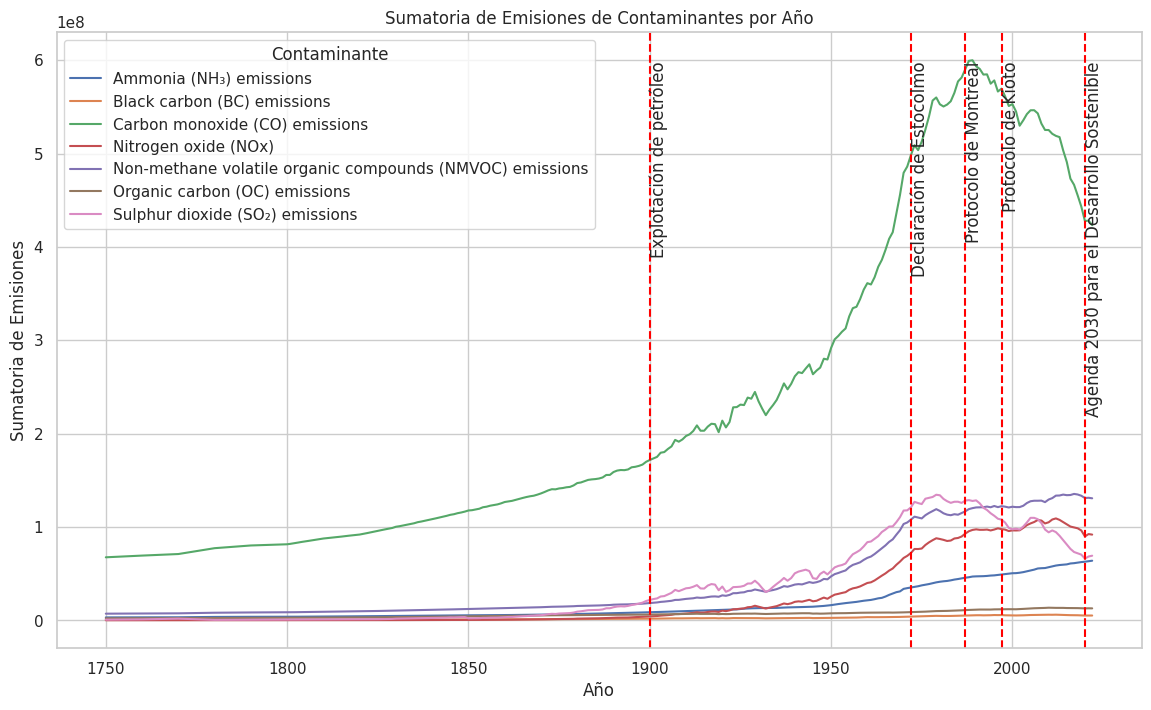

In [93]:
plt.figure(figsize=(14, 8))

for contaminante in contaminantes:
    sns.lineplot(data=suma_contaminantes_por_año, x='Year', y=contaminante, label=contaminante)

eventos = {
    1900: 'Explotación de petróleo',
    1972: 'Declaración de Estocolmo',
    1987: 'Protocolo de Montreal',
    1997: 'Protocolo de Kioto',
    2020: 'Agenda 2030 para el Desarrollo Sostenible'
}

for year, evento in eventos.items():
    plt.axvline(x=year, color='red', linestyle='--')
    plt.text(year, plt.ylim()[1]*0.95, evento, rotation=90, verticalalignment='top')

plt.title('Sumatoria de Emisiones de Contaminantes por Año')
plt.xlabel('Año')
plt.ylabel('Sumatoria de Emisiones')
plt.legend(title='Contaminante')
plt.grid(True)
plt.show()

#### Graficos de paises mas contaminantes.

Calcularmos el promedio de emisiones por país

In [94]:
promedio_emisiones_por_pais = air.groupby('Entity')[contaminantes].mean().reset_index()

Calculamos la sumatoria total de contaminantes por país para seleccionar los más contaminantes

In [95]:
promedio_emisiones_por_pais['Total_Emisiones'] = promedio_emisiones_por_pais[contaminantes].sum(axis=1)
promedio_emisiones_por_pais.head()

Entity  Ammonia (NH₃) emissions  Black carbon (BC) emissions  \
0     Afghanistan             42210.317159                  4373.515639   
1         Albania             12226.588412                   638.257069   
2         Algeria             28787.469704                 15754.664167   
3  American Samoa               107.332095                     8.182787   
4          Angola             35865.704388                  7367.140871   

   Carbon monoxide (CO) emissions  Nitrogen oxide (NOx)  \
0                   374360.477325          69383.597261   
1                   102376.174654           6935.859796   
2                   420441.751732          69204.423895   
3                      772.259020            274.830731   
4                   482576.712500          17140.537234   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                       78180.721439          
1                                       16781.553511          
2                                      230860.730368          
3                                         140.464600          
4                                      143026.963303          

   Organic carbon (OC) emissions  Sulphur dioxide (SO₂) emissions  \
0                   14474.336135                      3462.164504   
1                    4806.402801                     12061.844536   
2                   27000.652014                     17394.828374   
3                      21.313674                       710.660730   
4                   23398.946127                      7181.416573   

   Total_Emisiones  
0    586445.129460  
1    155826.680779  
2    809444.520255  
3      2035.043638  
4    716557.420996

Seleccionamos los 10 países más contaminantes a nivel global

In [96]:
top_10_paises_global = promedio_emisiones_por_pais.nlargest(10, 'Total_Emisiones')
top_10_paises_global.head()

Entity  Ammonia (NH₃) emissions  Black carbon (BC) emissions  \
207   United States             1.491332e+06                307016.551004   
39            China             4.122953e+06                540223.603333   
91            India             2.343952e+06                286716.972741   
161          Russia             9.430094e+05                115647.567759   
206  United Kingdom             1.768899e+05                110947.333579   

     Carbon monoxide (CO) emissions  Nitrogen oxide (NOx)  \
207                    5.522749e+07          7.511777e+06   
39                     6.203323e+07          3.662060e+06   
91                     1.884261e+07          1.303766e+06   
161                    1.057667e+07          1.692097e+06   
206                    6.827882e+06          9.083067e+05   

     Non-methane volatile organic compounds (NMVOC) emissions  \
207                                       9.224261e+06          
39                                        7.431029e+06          
91                                        3.114111e+06          
161                                       2.170754e+06          
206                                       8.872636e+05          

     Organic carbon (OC) emissions  Sulphur dioxide (SO₂) emissions  \
207                   9.524365e+05                     9.626677e+06   
39                    1.042381e+06                     4.803836e+06   
91                    8.839487e+05                     1.310759e+06   
161                   4.824786e+05                     2.798973e+06   
206                   1.572250e+05                     3.025578e+06   

     Total_Emisiones  
207     8.434099e+07  
39      8.363571e+07  
91      2.808587e+07  
161     1.877963e+07  
206     1.209409e+07

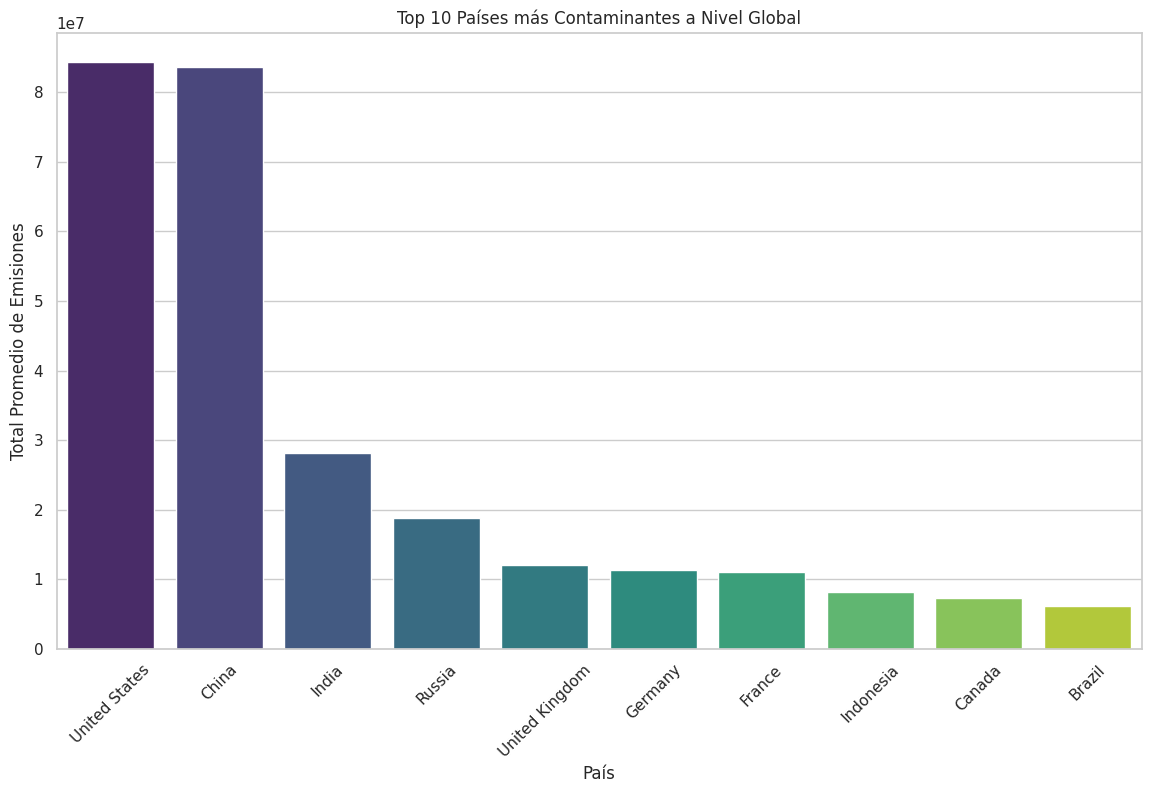

In [97]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_paises_global, x='Entity', y='Total_Emisiones', palette='viridis')
plt.title('Top 10 Países más Contaminantes a Nivel Global')
plt.xlabel('País')
plt.ylabel('Total Promedio de Emisiones')
plt.xticks(rotation=45)
plt.show()

Calcular el promedio de emisiones por país y continente

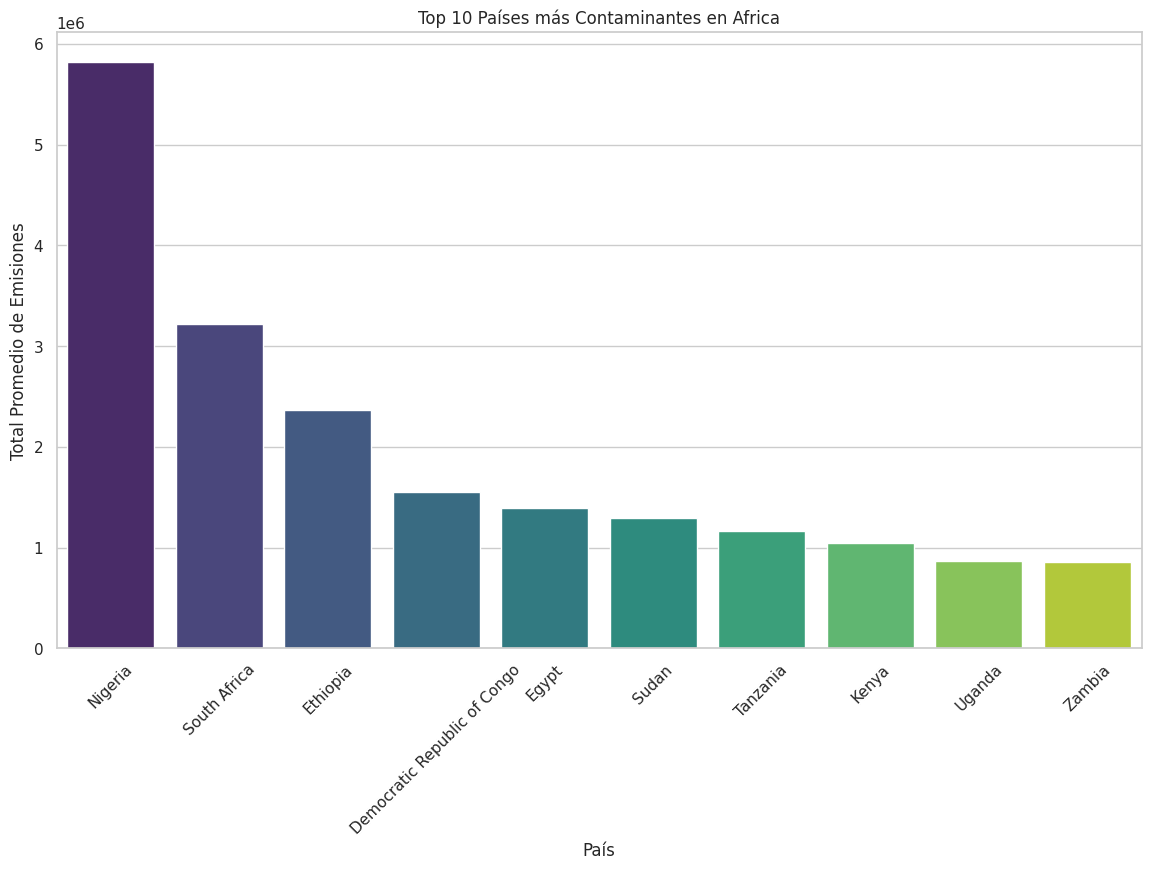

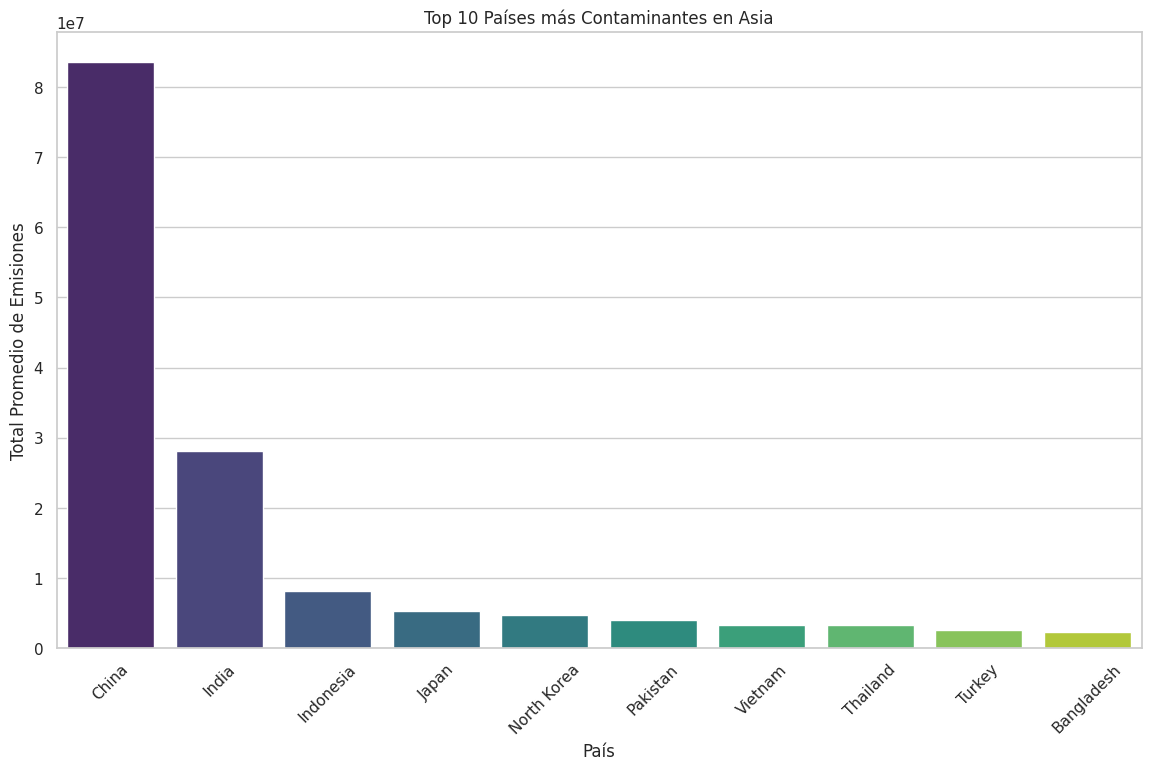

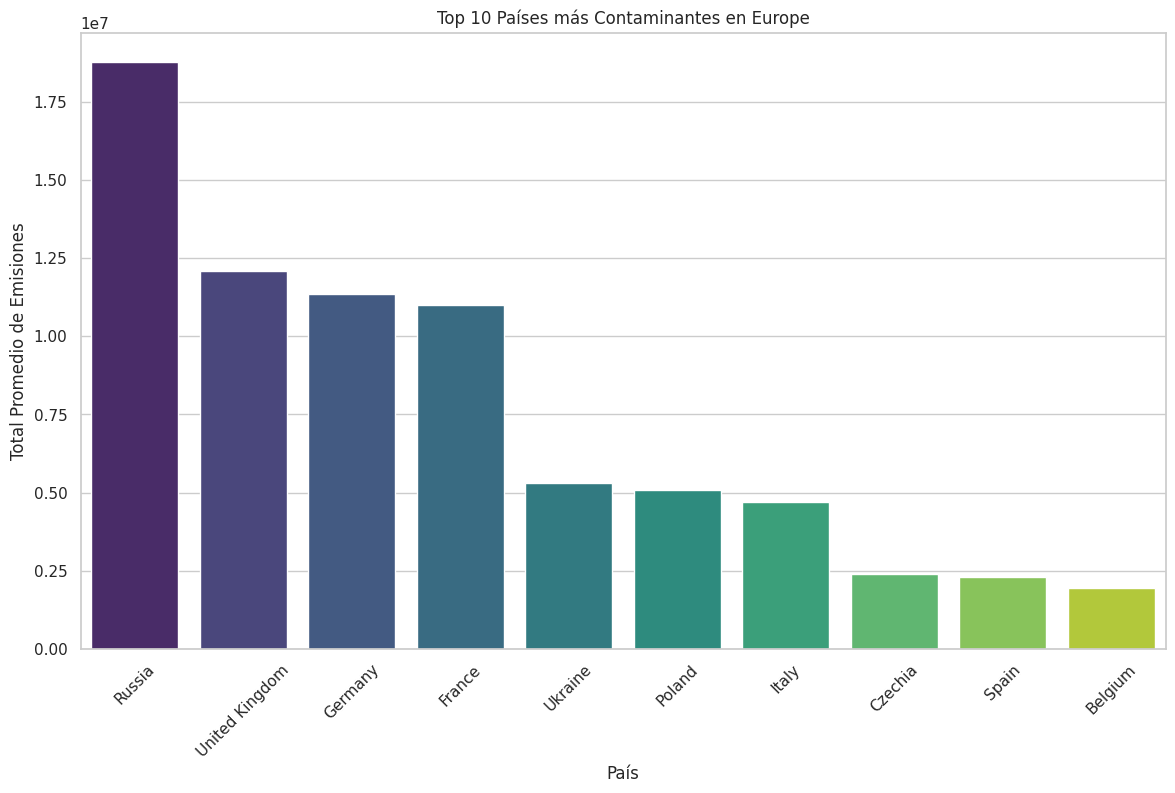

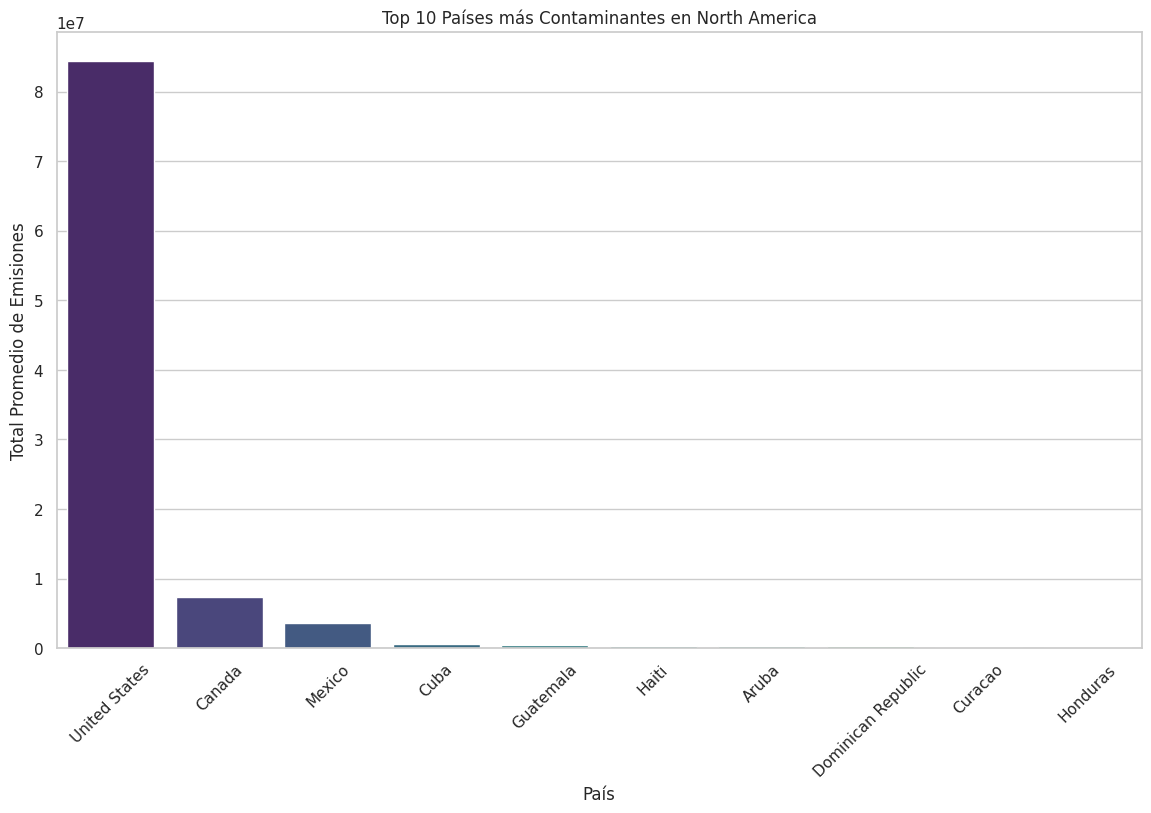

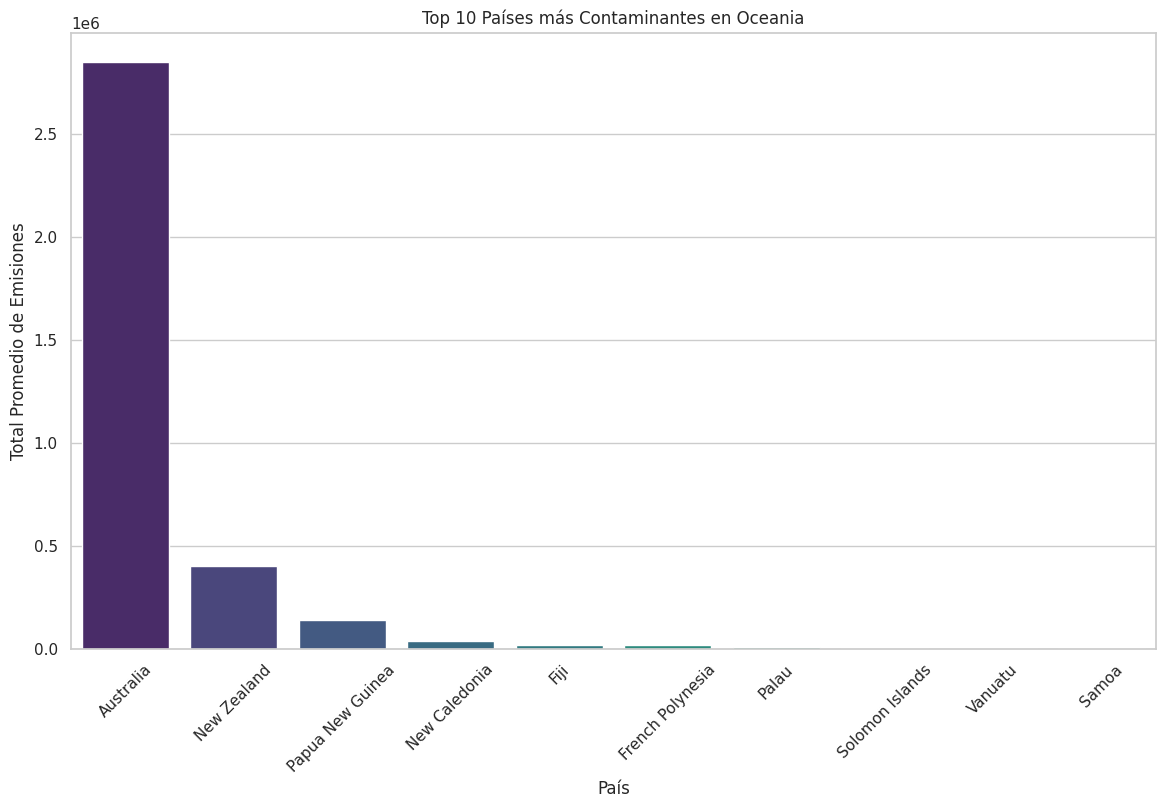

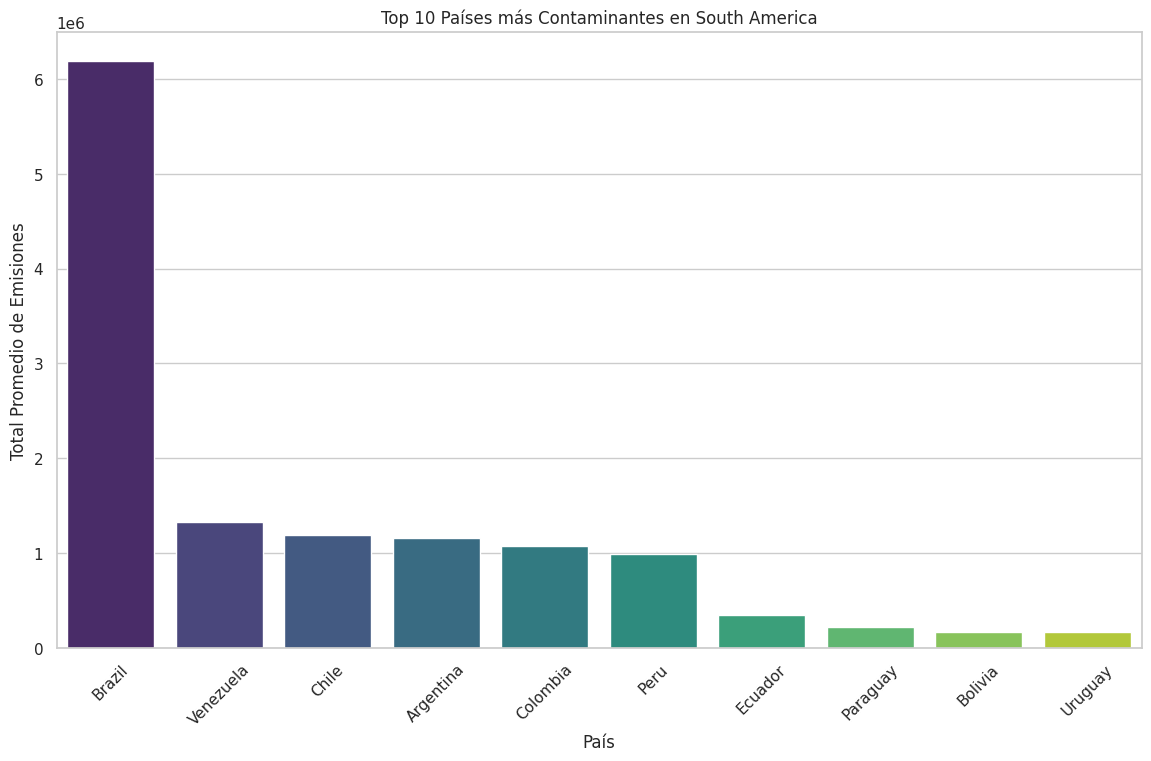

In [98]:
promedio_emisiones_por_region = air.groupby(['Continent', 'Entity'])[contaminantes].mean().reset_index()
promedio_emisiones_por_region['Total_Emisiones'] = promedio_emisiones_por_region[contaminantes].sum(axis=1)
continentes = promedio_emisiones_por_region['Continent'].unique()
for continente in continentes:
    top_10_paises_region = promedio_emisiones_por_region[promedio_emisiones_por_region['Continent'] == continente].nlargest(10, 'Total_Emisiones')
    plt.figure(figsize=(14, 8))
    sns.barplot(data=top_10_paises_region, x='Entity', y='Total_Emisiones', palette='viridis')
    plt.title(f'Top 10 Países más Contaminantes en {continente}')
    plt.xlabel('País')
    plt.ylabel('Total Promedio de Emisiones')
    plt.xticks(rotation=45)
    plt.show()

#### Gráficas del comportamiento de las emisiones de contaminantes en las diferentes regiones.

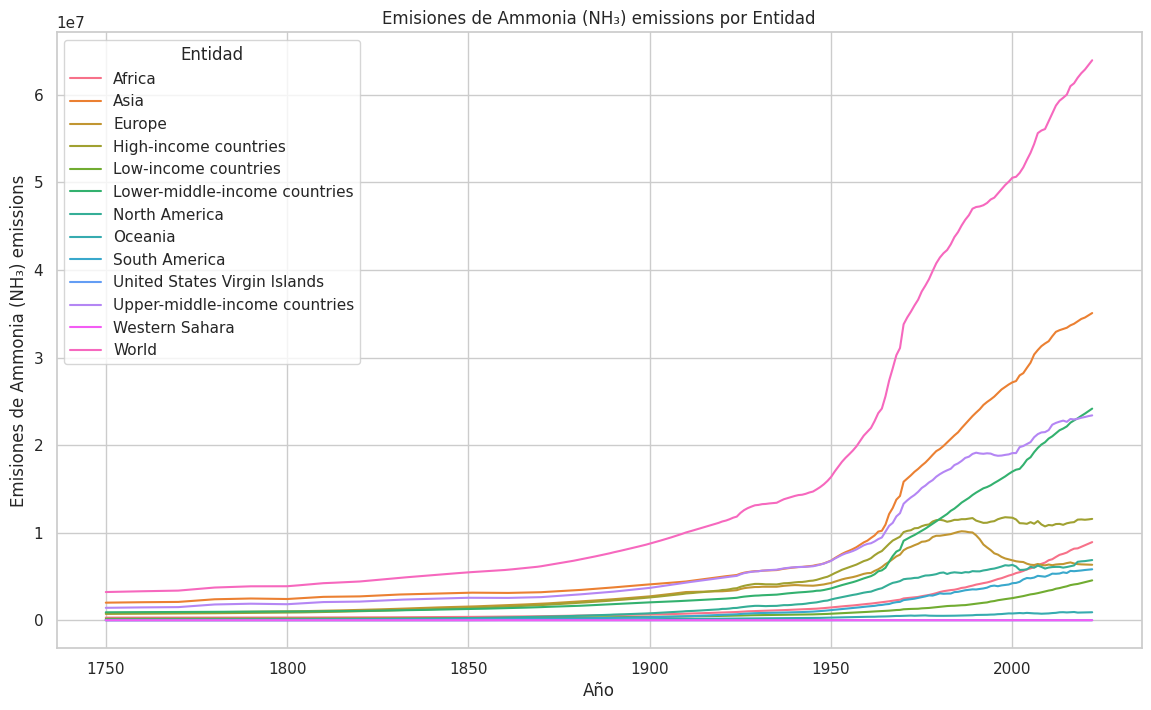

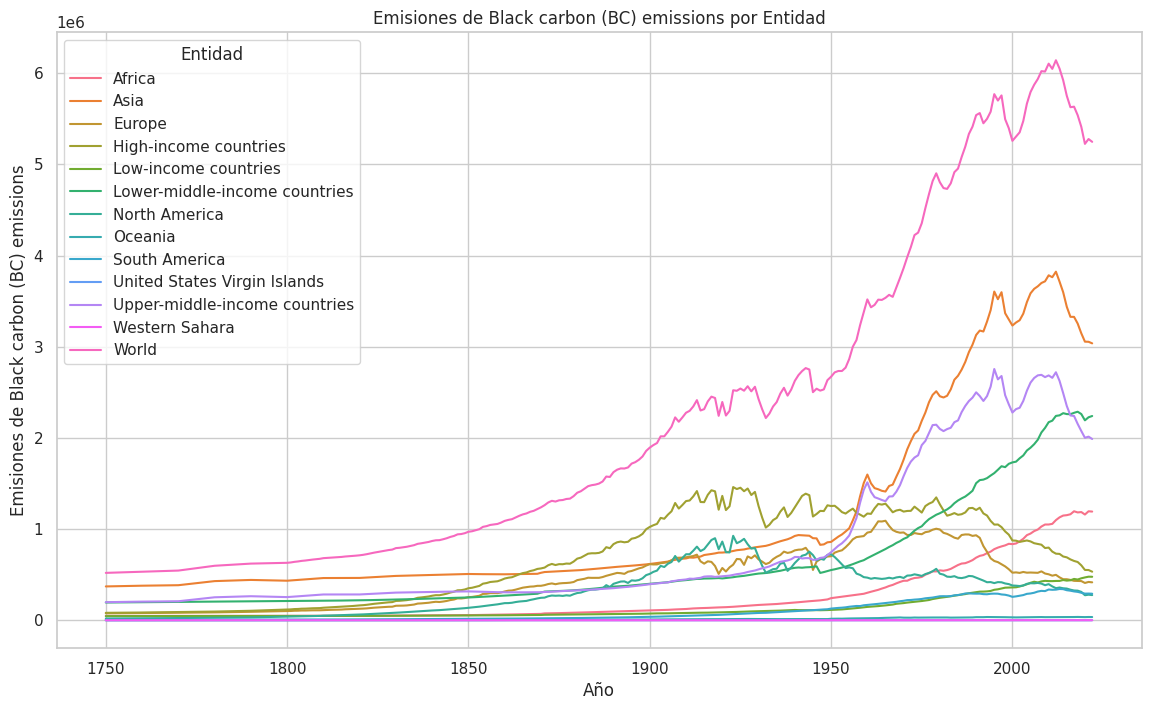

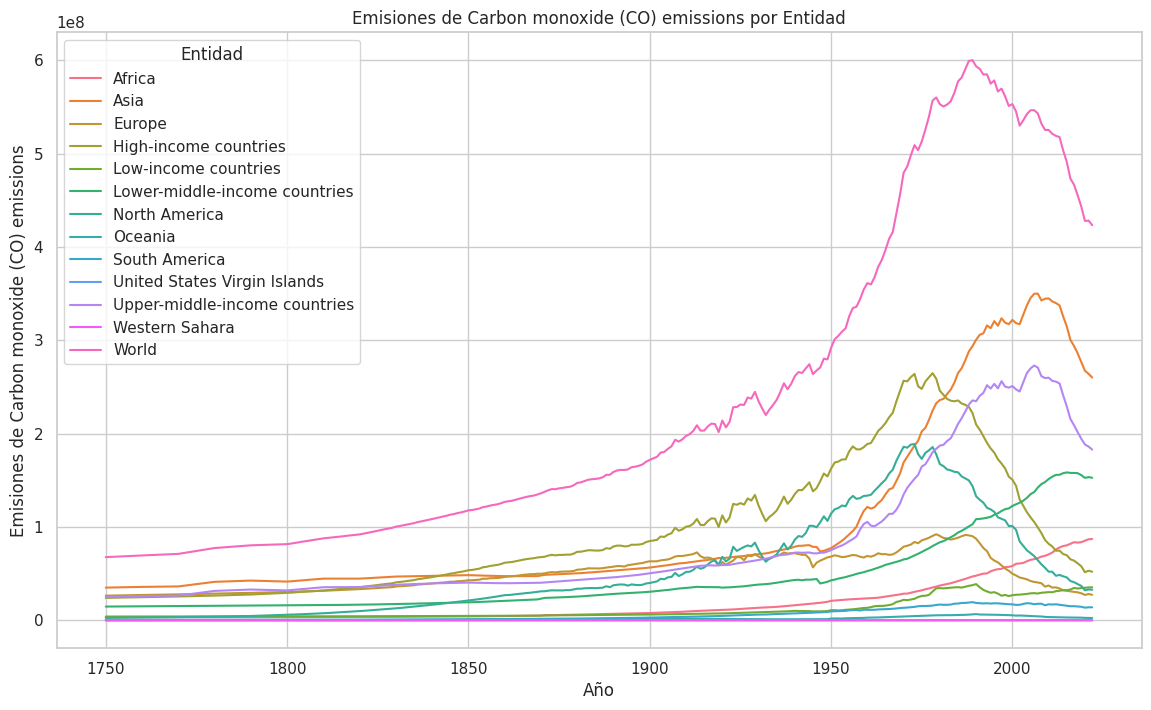

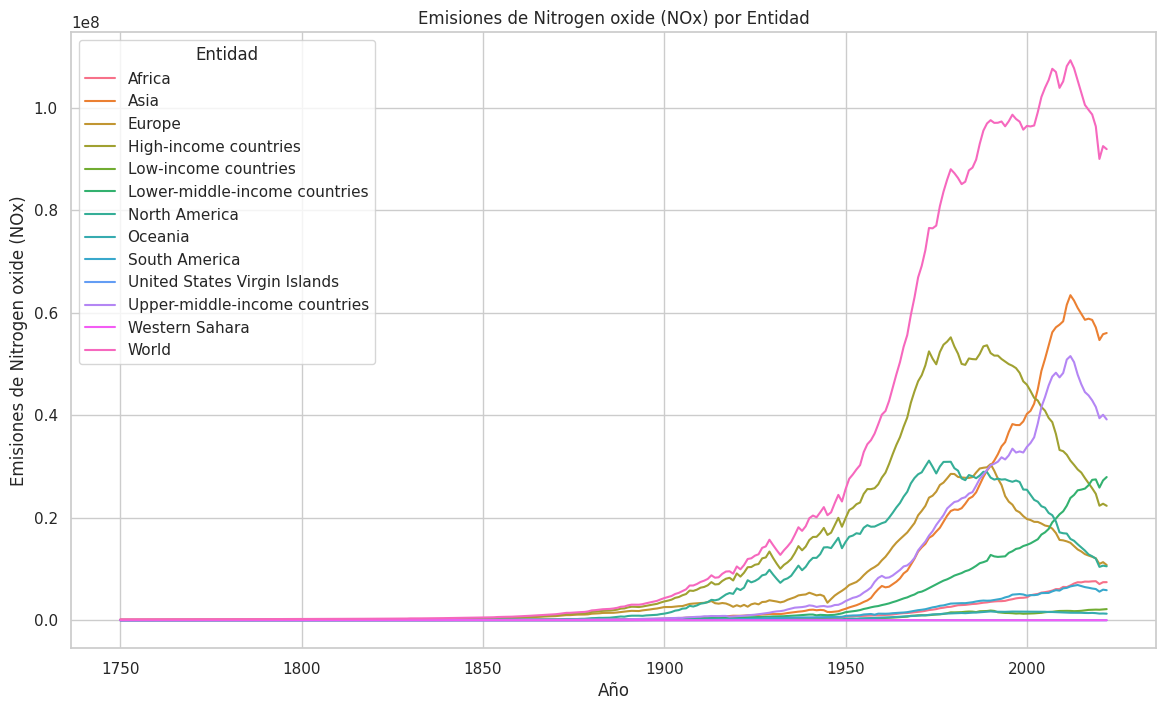

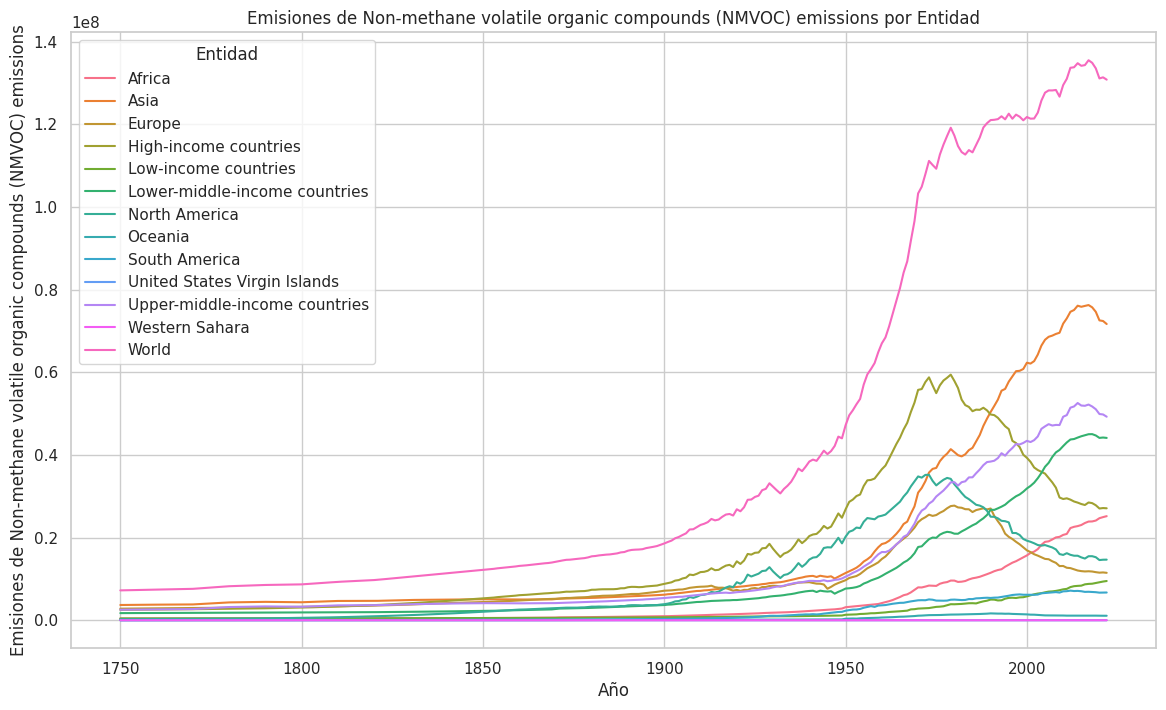

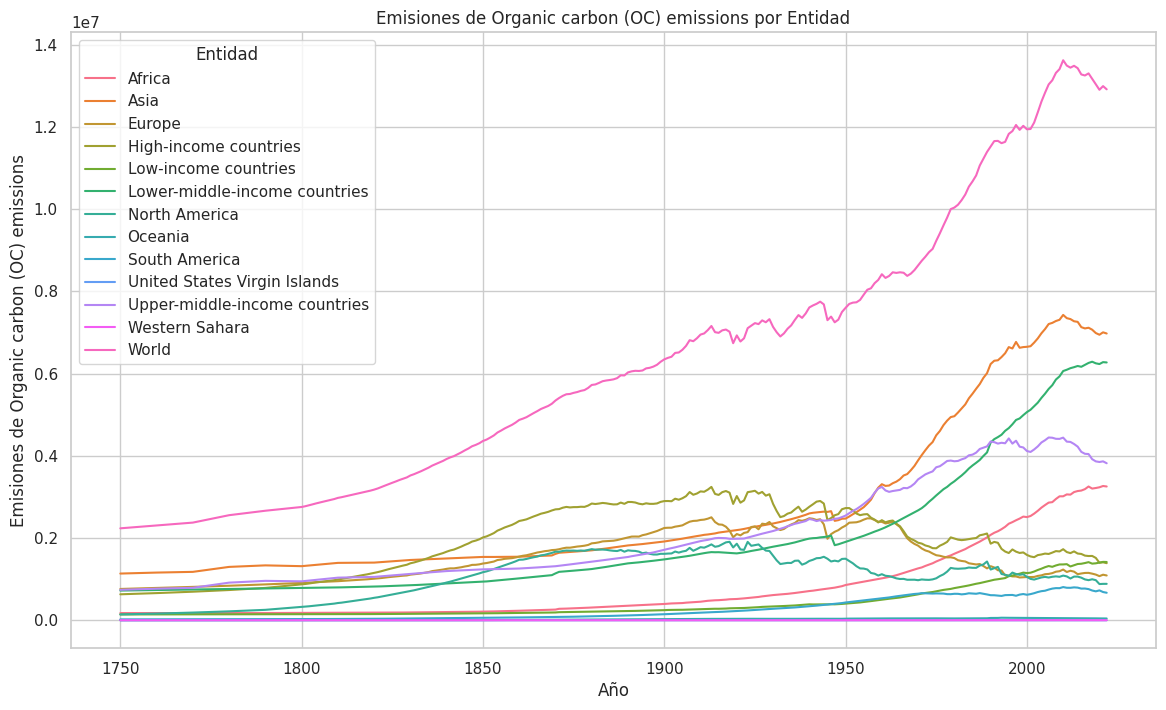

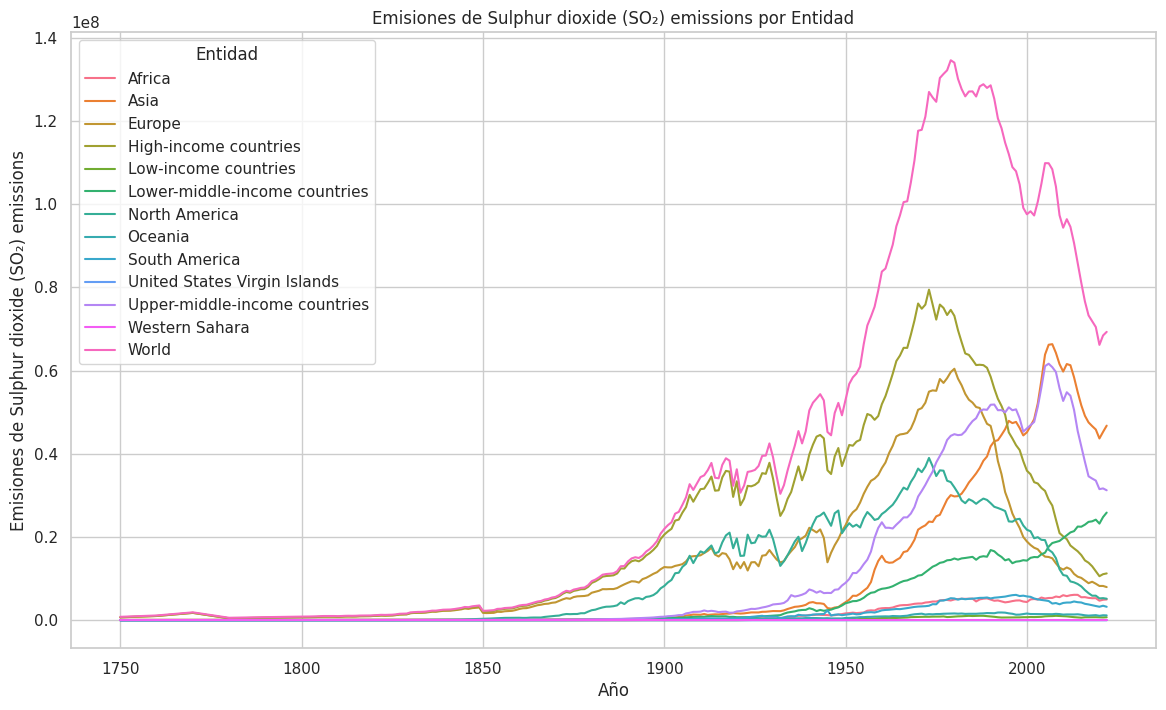

In [99]:
suma_contaminantes_por_entidad_año = df_entidades.groupby(['Entity', 'Year'])[contaminantes].sum().reset_index()
for contaminante in contaminantes:
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=suma_contaminantes_por_entidad_año, x='Year', y=contaminante, hue='Entity')
    plt.title(f'Emisiones de {contaminante} por Entidad')
    plt.xlabel('Año')
    plt.ylabel(f'Emisiones de {contaminante}')
    plt.legend(title='Entidad')
    plt.grid(True)
    plt.show()

#### Gráfica region del mundo mas contaminante

In [100]:
df_entidades = df_entidades[df_entidades['Entity'] != 'World']

contaminantes = df_entidades.columns[2:]

promedio_contaminantes_por_entidad_año = df_entidades.groupby(['Entity', 'Year'])[contaminantes].mean().reset_index()

promedio_contaminantes_por_entidad_año['Promedio_Contaminantes'] = promedio_contaminantes_por_entidad_año[contaminantes].mean(axis=1)

In [101]:
promedio_contaminantes_por_entidad_año.head()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
0  Africa  1750             17671.812                        7693.8726   
1  Africa  1760             17750.662                        7700.5747   
2  Africa  1770             17836.184                        7709.6570   
3  Africa  1780             17928.623                        7721.0396   
4  Africa  1790             18028.533                        7734.8390   

   Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
0                       3283140.0                      174831.50   
1                       3288960.8                      175004.75   
2                       3295845.2                      175232.31   
3                       3303775.8                      175512.27   
4                       3312819.8                      175845.30   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                          420443.03          
1                                          420842.38          
2                                          421382.25          
3                                          422058.16          
4                                          422879.56          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions  \
0                    47376.312                294775.34   
1                    47419.586                295370.38   
2                    47477.630                296091.75   
3                    47549.906                296939.34   
4                    47636.790                297921.56   

   Promedio_Contaminantes  
0           606561.695229  
1           607578.447529  
2           608796.425857  
3           610212.162657  
4           611838.054571

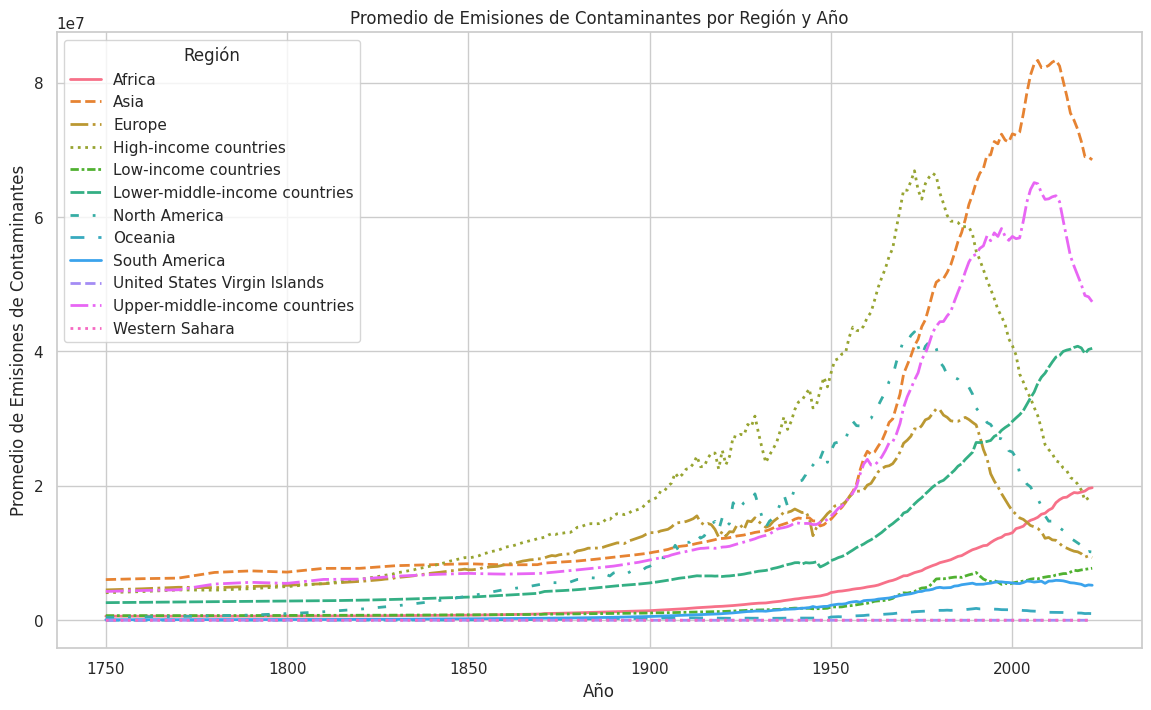

In [102]:
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(promedio_contaminantes_por_entidad_año['Entity'].unique()))
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 1)), (0, (3, 5, 1, 5)), (0, (5, 5))]

plt.figure(figsize=(14, 8))

for i, (region, data) in enumerate(promedio_contaminantes_por_entidad_año.groupby('Entity')):
    sns.lineplot(data=data, x='Year', y='Promedio_Contaminantes', label=region,
                 color=palette[i % len(palette)], linestyle=linestyles[i % len(linestyles)], linewidth=2)

plt.title('Promedio de Emisiones de Contaminantes por Región y Año')
plt.xlabel('Año')
plt.ylabel('Promedio de Emisiones de Contaminantes')
plt.legend(title='Región')
plt.grid(True)
plt.show()

#### Gráfico de la distribución de emisiones promedio de contaminantes por región

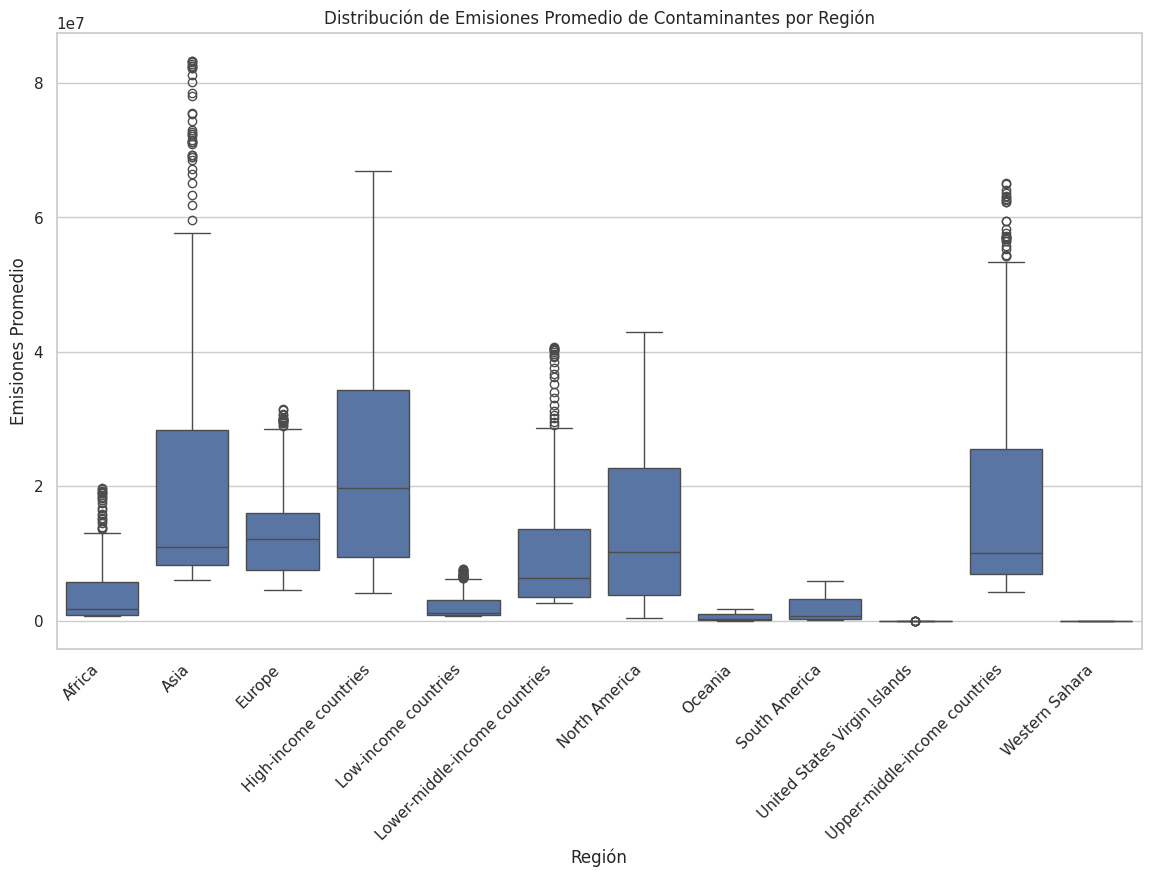

In [103]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=promedio_contaminantes_por_entidad_año, x='Entity', y='Promedio_Contaminantes')
plt.title('Distribución de Emisiones Promedio de Contaminantes por Región')
plt.xlabel('Región')
plt.ylabel('Emisiones Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

Los datos graficados evidencian una desigualdad en la distribución de las emisiones contaminantes a nivel regional, siendo las regiones más desarrolladas las que contribuyen en mayor medida a la degradación de la calidad del aire a escala global.

#### Gráfico de una matriz de correlacion entre los contaminantes

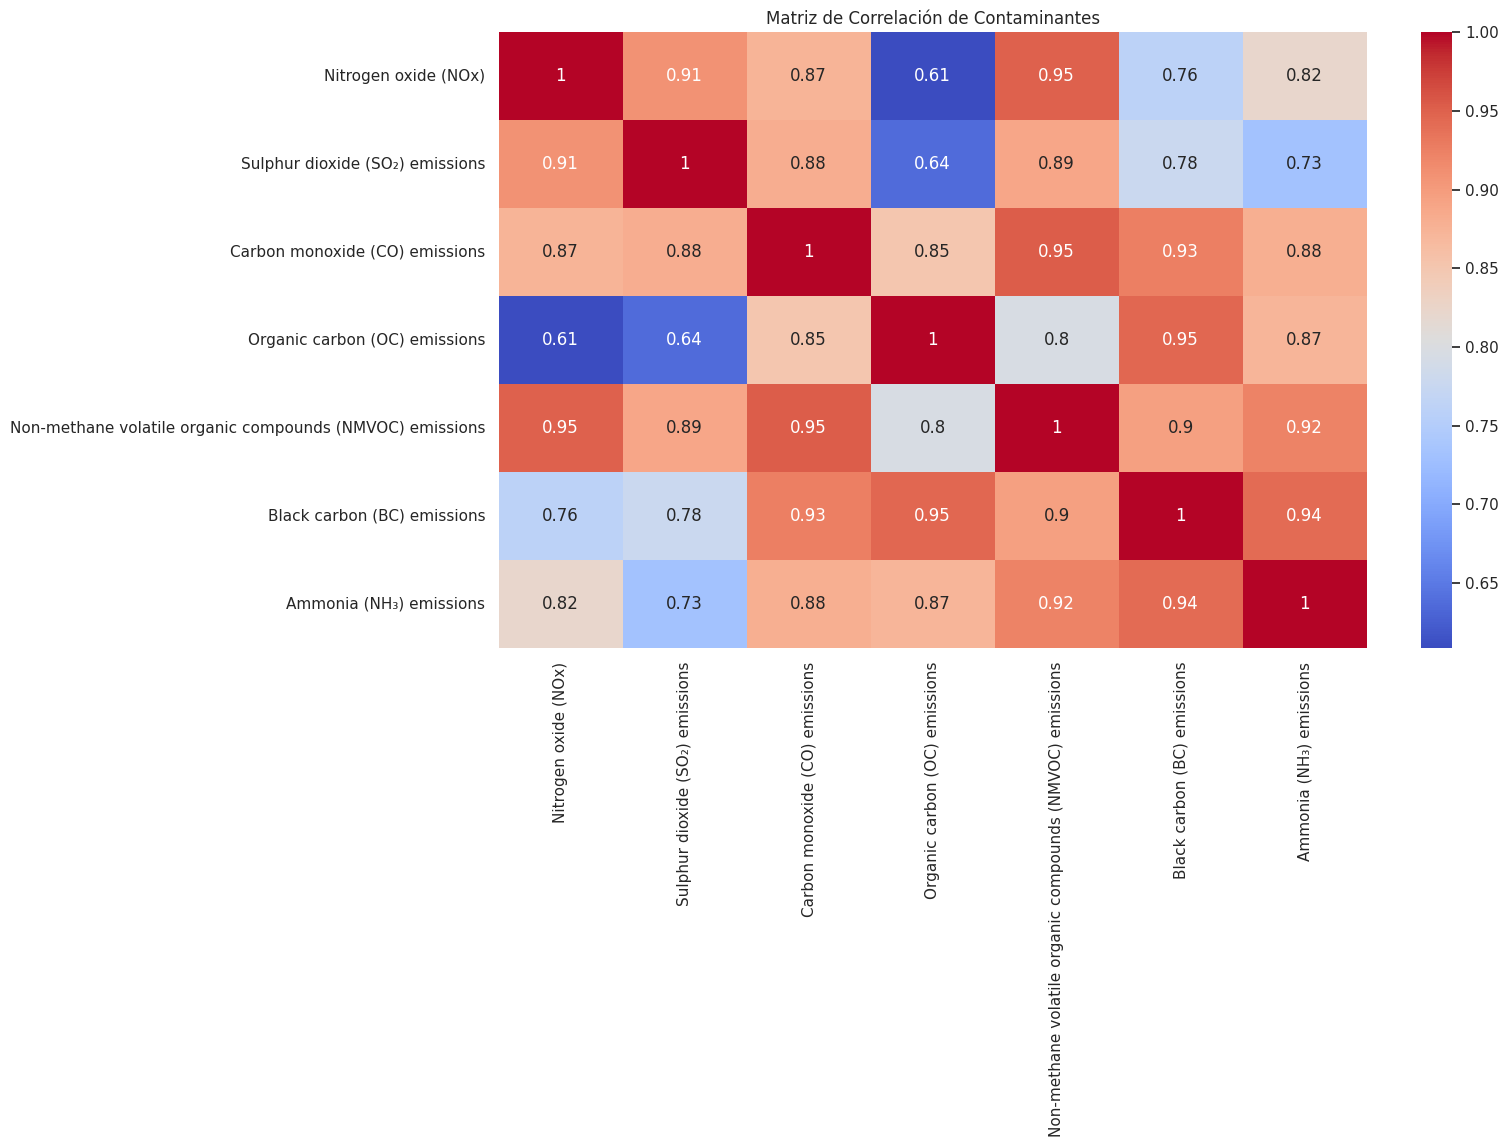

In [104]:
correlaciones = df_entidades[contaminantes].corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Contaminantes')
plt.show()

La gráfica revela una clara asociación entre las emisiones de compuestos carbonosos, como el carbono negro, el monóxido de carbono y el carbono orgánico, que son típicamente generados en procesos de combustión incompleta. En contraste, la correlación con el dióxido de azufre y el óxido nitroso es menos marcada. Esta diferencia puede atribuirse a diversos factores, incluyendo las condiciones de combustión, la composición del combustible y la presencia de catalizadores. Por ejemplo, las emisiones de compuestos carbonosos suelen predominar a temperaturas más bajas, mientras que la formación de óxidos de azufre y nitrógeno requiere temperaturas más elevadas.

#### Gráfica de analisis de tendencias

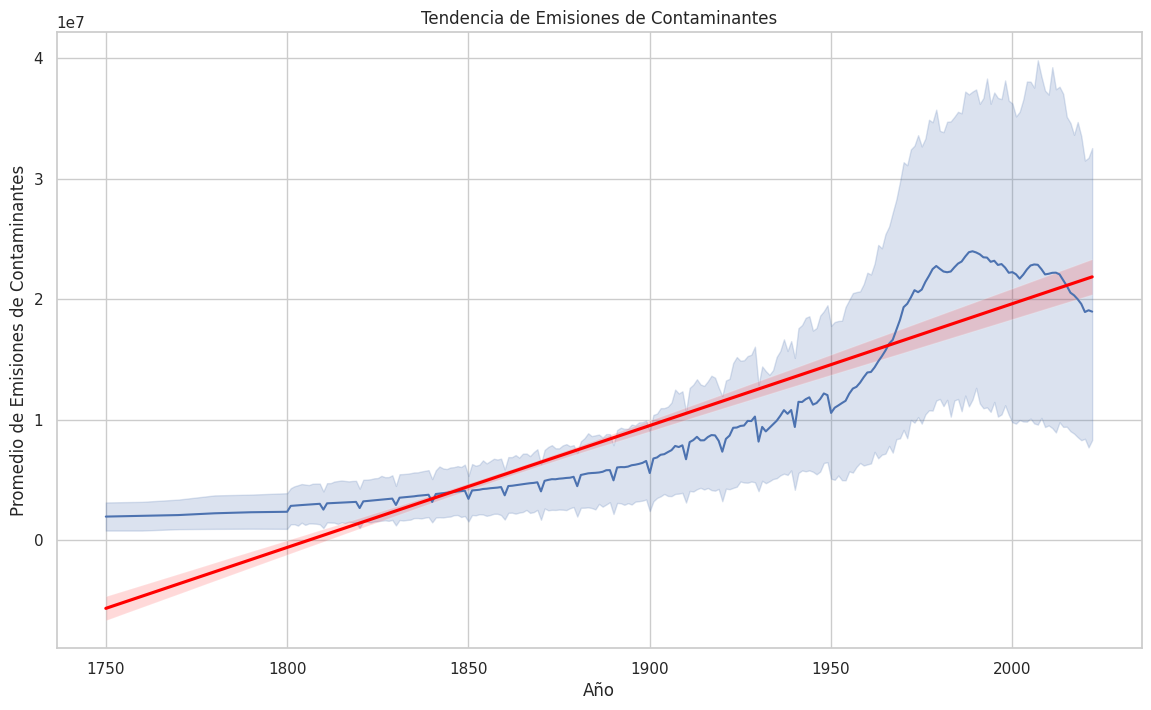

In [105]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=promedio_contaminantes_por_entidad_año, x='Year', y='Promedio_Contaminantes')

# Añadir línea de tendencia
sns.regplot(data=promedio_contaminantes_por_entidad_año, x='Year', y='Promedio_Contaminantes', scatter=False, color='red')

plt.title('Tendencia de Emisiones de Contaminantes')
plt.xlabel('Año')
plt.ylabel('Promedio de Emisiones de Contaminantes')
plt.show()

La gráfica de tendencia, especificamente la linea roja nos indica que las emisiones de contaminantes al aire siguen en franco aumento.

### Conlusiones sobre analisis del dataset de emisiones historicas de contamiantes al ambiente.

Tendencia histórica y relación con la industrialización:

*El análisis de los datos revela una clara tendencia al alza en
las emisiones de contaminantes atmosféricos a lo largo de la historia, especialmente a partir del siglo XX. Esta tendencia coincide con la intensificación de la actividad industrial y la creciente dependencia de los combustibles fósiles.

*El monóxido de carbono se destaca como el contaminante más emitido a lo largo del período estudiado, lo que subraya la importancia de los procesos de combustión incompleta en la generación de contaminación atmosférica.

*La explotación masiva del petróleo a partir del siglo XX ha sido un factor determinante en el aumento de las emisiones de diversos contaminantes, incluyendo compuestos carbonosos y óxidos de nitrógeno y azufre.

Patrones regionales y factores influyentes:

*Estados Unidos y China se perfilan como los principales emisores de contaminantes a nivel mundial, lo que refleja su alto grado de industrialización y su gran población.
Sin embargo, a nivel continental, se observa una tendencia común: los países más industrializados y poblados son también los mayores contaminantes.

*La composición de los contaminantes emitidos varía en función de factores como la temperatura de combustión, la composición del combustible y la presencia de catalizadores. Los compuestos carbonosos, como el carbono negro y el monóxido de carbono, muestran una mayor correlación entre sí, lo que sugiere un origen común en procesos de combustión incompleta.
Efectos de la regulación ambiental:

*Si bien el Protocolo de Montreal ha logrado reducir significativamente las emisiones de sustancias que dañan la capa de ozono, su impacto en las emisiones totales de contaminantes atmosféricos ha sido menos evidente.

*A pesar de los esfuerzos regulatorios, la tendencia general de las emisiones sigue siendo al alza, lo que indica la necesidad de implementar políticas más ambiciosas y eficaces para reducir la contaminación del aire.

Conclusiones generales y recomendaciones:

*La contaminación atmosférica es un problema global con profundas raíces históricas y económicas.

*La transición hacia una economía baja en carbono y la adopción de tecnologías limpias son fundamentales para reducir las emisiones de contaminantes y mejorar la calidad del aire.

*Es necesario fortalecer la cooperación internacional para abordar este desafío global y establecer objetivos ambiciosos de reducción de emisiones.

*La investigación continua es esencial para comprender mejor los mecanismos de formación y transporte de los contaminantes atmosféricos, así como para evaluar la eficacia de las medidas de mitigación.

## Dataset de energias renovables globales

### Abrimos el dataset con pandas

In [106]:
!ls /content/drive/My\ Drive/energia

 air-pollution.csv  'global-data-on-sustainable-energy (1).csv'


In [107]:
path_ene='/content/drive/My Drive/energia/global-data-on-sustainable-energy (1).csv'
energy=pd.read_csv(path_ene)
energy.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density\n(P/Km2) Land Area(Km2)  Latitude  Longitude  
0                60       652230.0  33.93911  67.709953  
1          

### Descrpción de las columnas.

**Entity**: País o región al que corresponden los datos.

**Year**: Año al que pertenecen los datos, comprendido entre 2000 y 2020.

**Access to electricity (% of population)**: Porcentaje de la población con acceso a electricidad.

**Access to clean fuels for cooking (% of population)**: Porcentaje de la población que utiliza principalmente combustibles limpios para cocinar..

**Renewable-electricity-generating-capacity-per-capita**: Capacidad instalada de energía renovable por persona.

**Financial flows to developing countries (US $)**: Ayuda y asistencia de países desarrollados para proyectos de energía limpia.

**Renewable energy share in total final energy consumption (%)**: Porcentaje de energía renovable en el consumo final de energía total.

**Electricity from fossil fuels (TWh)**: Electricidad generada a partir de combustibles fósiles (carbón, petróleo, gas) en teravatios-hora.

**Electricity from nuclear (TWh)**: Electricidad generada a partir de energía nuclear en teravatios-hora.

**Electricity from renewables (TWh)**: Electricidad generada a partir de fuentes renovables (hidroeléctrica, solar, eólica, etc.) en teravatios-hora.

**Low-carbon electricity (% electricity)**: Porcentaje de electricidad proveniente de fuentes bajas en carbono (nuclear y renovables).

**Primary energy consumption per capita (kWh/person)**: Consumo de energía primaria por persona en kilovatios-hora.

**Energy intensity level of primary energy (MJ/$2011 PPP GDP)**: Consumo de energía por unidad de PIB a paridad de poder adquisitivo de 2011.

**Value_co2_emissions (metric tons per capita)**: Emisiones de dióxido de carbono per cápita en toneladas métricas.

**Renewables (% equivalent primary energy)**: Energía primaria equivalente derivada de fuentes renovables.

**GDP growth (annual %)**: Tasa de crecimiento anual del PIB en moneda local constante.GDP per capita: Producto interno bruto per cápita.

**Density (P/Km2)**: Densidad de población en personas por kilómetro cuadrado.

**Land Area (Km2)**: Área total de tierra en kilómetros cuadrados.

**Latitude**: Latitud del centroide del país en grados decimales.

**Longitude**: Longitud del centroide del país en grados decimales.

### Vemos algunas estadisticas descriptivas.

In [108]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

Al analizar el conjunto de datos inicial, se identificó la presencia de valores nulos en múltiples columnas. Esta situación es común en conjuntos de datos reales y puede afectar la calidad y la fiabilidad de los resultados del análisis. Asimismo, se detectó una inconsistencia en el tipo de dato de la columna 'Density', la cual, a pesar de contener valores numéricos, está clasificada como 'object'. Esta discrepancia requiere una corrección para asegurar que los cálculos y análisis posteriores se realicen correctamente.

Convertimos los valores de la columna 'Density' a numerico.

In [109]:
print(energy.columns)

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


Como en el nombre de la columna 'Density' hay un salto de linea, primero vamos a modificar el nombre.

In [110]:
# Identificar la columna utilizando una expresión regular
density_col = [col for col in energy.columns if re.search(r'Density.*P/Km2', col)][0]

# Renombrar la columna utilizando el nombre identificado
energy.rename(columns={density_col: 'Density (P/Km2)'}, inplace=True)

# Verificar los primeros 5 valores de la columna corregida
print(energy['Density (P/Km2)'].head())

0    60
1    60
2    60
3    60
4    60
Name: Density (P/Km2), dtype: object


In [111]:
energy['Density (P/Km2)'] = pd.to_numeric(energy['Density (P/Km2)'], errors='coerce')

In [112]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

### Tratamiento de valores nulos

Para abordar el problema de los valores nulos, se ha decidido imputar la media a la mayoría de las columnas numéricas. Sin embargo, dado el elevado número de valores faltantes en la columna 'Financial flows to developing countries (US $)', se ha optado por eliminarla del análisis, ya que su inclusión podría introducir sesgos en los resultados.

In [113]:
energy['Access to electricity (% of population)'].fillna(energy['Access to electricity (% of population)'].mean(), inplace=True)
energy['Access to clean fuels for cooking'].fillna(energy['Access to clean fuels for cooking'].mean(), inplace=True)
energy['Renewable-electricity-generating-capacity-per-capita'].fillna(energy['Renewable-electricity-generating-capacity-per-capita'].mean(), inplace=True)
energy['Renewable energy share in the total final energy consumption (%)'].fillna(energy['Renewable energy share in the total final energy consumption (%)'].mean(), inplace=True)
energy['Electricity from fossil fuels (TWh)'].fillna(energy['Electricity from fossil fuels (TWh)'].mean(), inplace=True)
energy['Electricity from nuclear (TWh)'].fillna(energy['Electricity from nuclear (TWh)'].mean(), inplace=True)
energy['Electricity from renewables (TWh)'].fillna(energy['Electricity from renewables (TWh)'].mean(), inplace=True)
energy['Low-carbon electricity (% electricity)'].fillna(energy['Low-carbon electricity (% electricity)'].mean(), inplace=True)
energy['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(energy['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean(), inplace=True)
energy['Value_co2_emissions_kt_by_country'].fillna(energy['Value_co2_emissions_kt_by_country'].mean(), inplace=True)
energy['gdp_growth'].fillna(energy['gdp_growth'].mean(), inplace=True)
energy['gdp_per_capita'].fillna(energy['gdp_per_capita'].mean(), inplace=True)
energy['Density (P/Km2)'].fillna(energy['Density (P/Km2)'].mean(), inplace=True)
energy['Land Area(Km2)'].fillna(energy['Land Area(Km2)'].mean(), inplace=True)
energy['Latitude'].fillna(energy['Latitude'].mean(), inplace=True)
energy['Longitude'].fillna(energy['Longitude'].mean(), inplace=True)

# Eliminar columnas con muchos valores nulos
energy.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)'], inplace=True)

# Verificar nuevamente los valores nulos
print(energy.isnull().sum())



Entity                                                              0
Year                                                                0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fossil fuels (TWh)                                 0
Electricity from nuclear (TWh)                                      0
Electricity from renewables (TWh)                                   0
Low-carbon electricity (% electricity)                              0
Primary energy consumption per capita (kWh/person)                  0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0
Value_co2_emissions_kt_by_country                                   0
gdp_growth                                                          0
gdp_per_capita      

### Estadisticas descriptivas.

In [114]:
energy.describe()

Year  Access to electricity (% of population)  \
count  3649.000000                              3649.000000   
mean   2010.038367                                78.933702   
std       6.054228                                30.234017   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.952995   
50%    2010.000000                                98.264870   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3649.000000   
mean                           63.255287   
std                            38.128550   
min                             0.000000   
25%                            25.900000   
50%                            78.850000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                        3649.000000      
mean                                          113.137498      
std                                           210.719548      
min                                             0.000000      
25%                                             8.390000      
50%                                            70.240000      
75%                                           113.137498      
max                                          3060.190000      

       Renewable energy share in the total final energy consumption (%)  \
count                                        3649.000000                  
mean                                           32.638165                  
std                                            29.089140                  
min                                             0.000000                  
25%                                             7.100000                  
50%                                            26.690000                  
75%                                            52.610000                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          3649.000000                     3649.000000   
mean                             70.365003                       13.450190   
std                             347.048626                       71.734739   
min                               0.000000                        0.000000   
25%                               0.300000                        0.000000   
50%                               2.990000                        0.000000   
75%                              27.540000                        0.000000   
max                            5184.130000                      809.410000   

       Electricity from renewables (TWh)  \
count                        3649.000000   
mean                           23.968010   
std                           104.130068   
min                             0.000000   
25%                             0.050000   
50%                             1.490000   
75%                            10.020000   
max                          2184.940000   

       Low-carbon electricity (% electricity)  \
count                             3649.000000   
mean                                36.801182   
std                                 34.116776   
min                                  0.000000   
25%                                  3.030303   
50%                                 28.571428   
75%                                 64.022670   
max                                100.000010   

       Primary energy consumption per capita (kWh/person)  \
count                                        3649.000000    
mean                                        25743.981745    
std                                         34773.221366    
min                

En este análisis estadístico, observamos que las desviaciones estándar son relativamente altas para muchas variables, lo cual indica una gran variabilidad en los datos. Esto sugiere que existen diferencias significativas entre los países o regiones incluidos en el estudio.

La media de "Acceso a electricidad (% de la población)" y "Acceso a combustibles limpios para cocinar (% de la población)" muestra una tendencia al alza, lo que sugiere un aumento en el acceso a la energía y a combustibles más limpios a lo largo del tiempo. Asimismo, la media de "Participación de las energías renovables en el consumo final total de energía (%)" también muestra una tendencia ascendente, indicando un crecimiento en la importancia de las energías renovables en la matriz energética.

In [115]:
energy['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Icelan

### Visualización

Con el fin de obtener una representación visual de los datos agrupados por continente, elaboramos un diccionario que asigna a cada país su respectivo continente.

In [116]:
continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Angola': 'Africa',
    'Antigua and Barbuda': 'North America', 'Argentina': 'South America', 'Armenia': 'Asia', 'Aruba': 'North America',
    'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Belize': 'North America', 'Benin': 'Africa',
    'Bermuda': 'North America', 'Bhutan': 'Asia', 'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa',
    'Brazil': 'South America', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cambodia': 'Asia',
    'Cameroon': 'Africa', 'Canada': 'North America', 'Cayman Islands': 'North America', 'Central African Republic': 'Africa',
    'Chad': 'Africa', 'Chile': 'South America', 'China': 'Asia', 'Colombia': 'South America', 'Comoros': 'Africa', 'Congo': 'Africa',
    'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cuba': 'North America', 'Cyprus': 'Asia', 'Czechia': 'Europe', 'Denmark': 'Europe',
    'Djibouti': 'Africa', 'Dominica': 'North America', 'Dominican Republic': 'North America', 'Ecuador': 'South America', 'Egypt': 'Africa',
    'El Salvador': 'North America', 'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Estonia': 'Europe', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Fiji': 'Oceania', 'Finland': 'Europe', 'France': 'Europe', 'French Guiana': 'South America', 'Gabon': 'Africa',
    'Gambia': 'Africa', 'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe', 'Grenada': 'North America',
    'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa', 'Guyana': 'South America', 'Haiti': 'North America',
    'Honduras': 'North America', 'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia', 'Indonesia': 'Asia', 'Iraq': 'Asia',
    'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe', 'Jamaica': 'North America', 'Japan': 'Asia', 'Jordan': 'Asia',
    'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kiribati': 'Oceania', 'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', 'Latvia': 'Europe',
    'Lebanon': 'Asia', 'Lesotho': 'Africa', 'Liberia': 'Africa', 'Libya': 'Africa', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mali': 'Africa', 'Malta': 'Europe',
    'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Mexico': 'North America', 'Mongolia': 'Asia', 'Montenegro': 'Europe',
    'Morocco': 'Africa', 'Mozambique': 'Africa', 'Myanmar': 'Asia', 'Namibia': 'Africa', 'Nauru': 'Oceania', 'Nepal': 'Asia',
    'Netherlands': 'Europe', 'New Caledonia': 'Oceania', 'New Zealand': 'Oceania', 'Nicaragua': 'North America', 'Niger': 'Africa',
    'Nigeria': 'Africa', 'North Macedonia': 'Europe', 'Norway': 'Europe', 'Oman': 'Asia', 'Pakistan': 'Asia', 'Panama': 'North America',
    'Papua New Guinea': 'Oceania', 'Paraguay': 'South America', 'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe',
    'Portugal': 'Europe', 'Puerto Rico': 'North America', 'Qatar': 'Asia', 'Romania': 'Europe', 'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America', 'Saint Lucia': 'North America', 'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania', 'Sao Tome and Principe': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa', 'Serbia': 'Europe',
    'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Singapore': 'Asia', 'Slovakia': 'Europe', 'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania', 'Somalia': 'Africa', 'South Africa': 'Africa', 'South Sudan': 'Africa', 'Spain': 'Europe',
    'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Togo': 'Africa', 'Tonga': 'Oceania', 'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa', 'Turkey': 'Asia', 'Turkmenistan': 'Asia', 'Tuvalu': 'Oceania', 'Uganda': 'Africa', 'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe', 'United States': 'North America', 'Uruguay': 'South America',
    'Uzbekistan': 'Asia', 'Vanuatu': 'Oceania', 'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

In [117]:
energy['Continent'] = energy['Entity'].map(continent)

In [118]:
energy.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
0                         760.000000    3.441610    13283.774348   
1                         730.000000    3.441610    13283.774348   
2                        1029.999971    3.441610      179.426579   
3                        1220.000029    8.832278      190.683814   
4                        1029.999971    1.414118      211.382074   

   Density (P/Km2)  Land Area(Km2)  Latitude  Longitude Continent  
0             60.0        652230.0  33.93911  67.709953      Asia  
1             60.0        652230.0  33.93911  67.709953      Asia  
2             60.0        652230.0  33.93911  67.709953      Asia  
3             60.0        652230.0  33.93911  67.709953      Asia  
4             60.0        652230.0  33.93911  67.709953      Asia

Graficaremos los datos de los primeros 20 paises de cada continente.

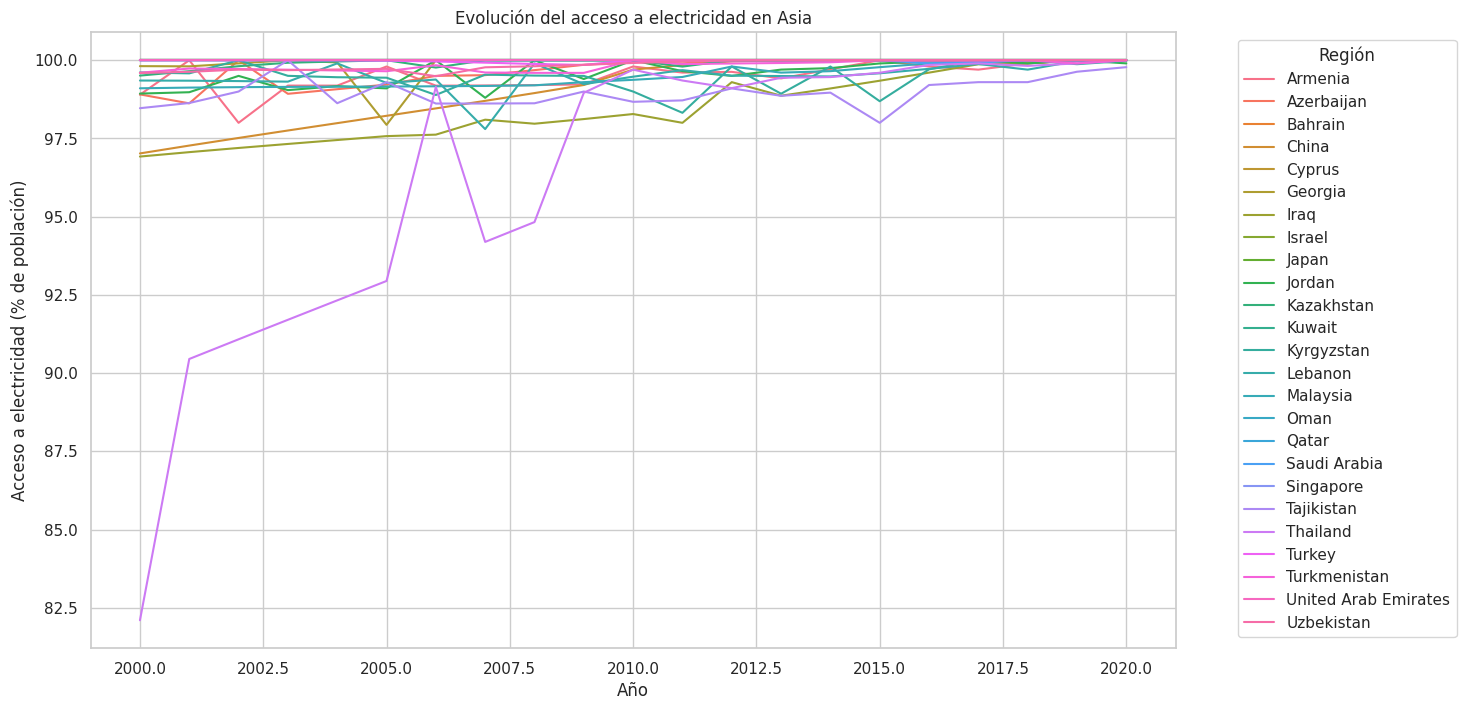

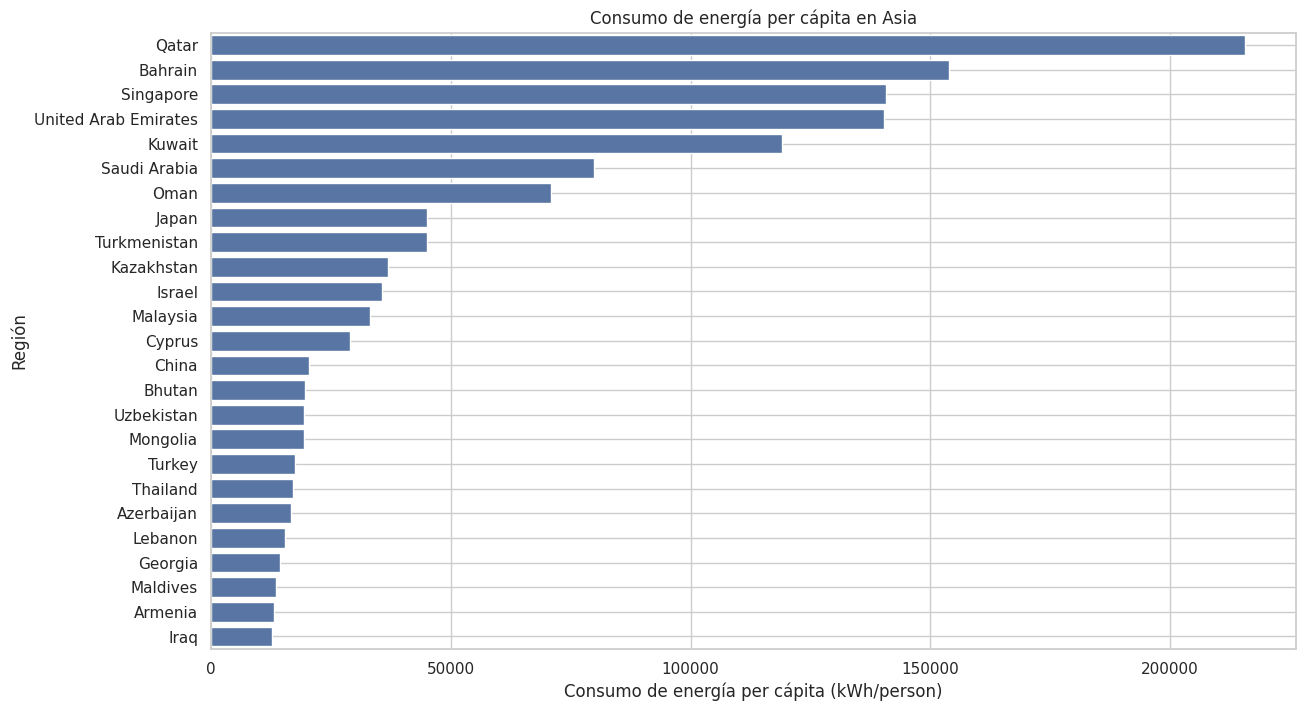

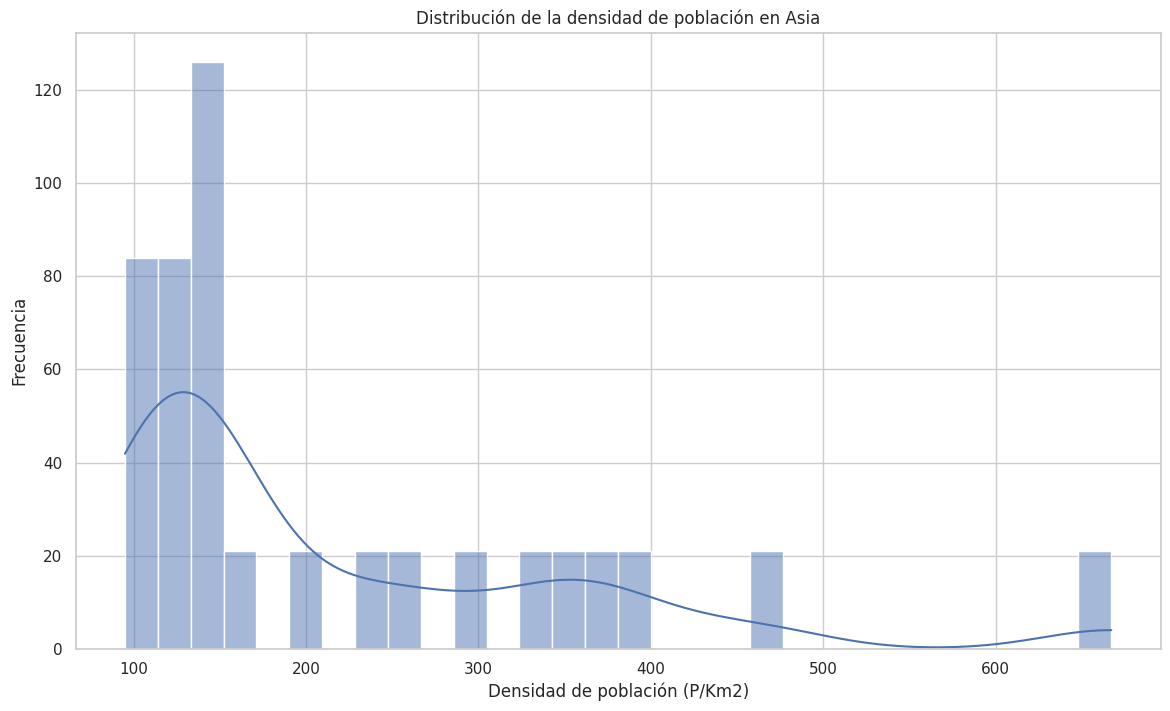

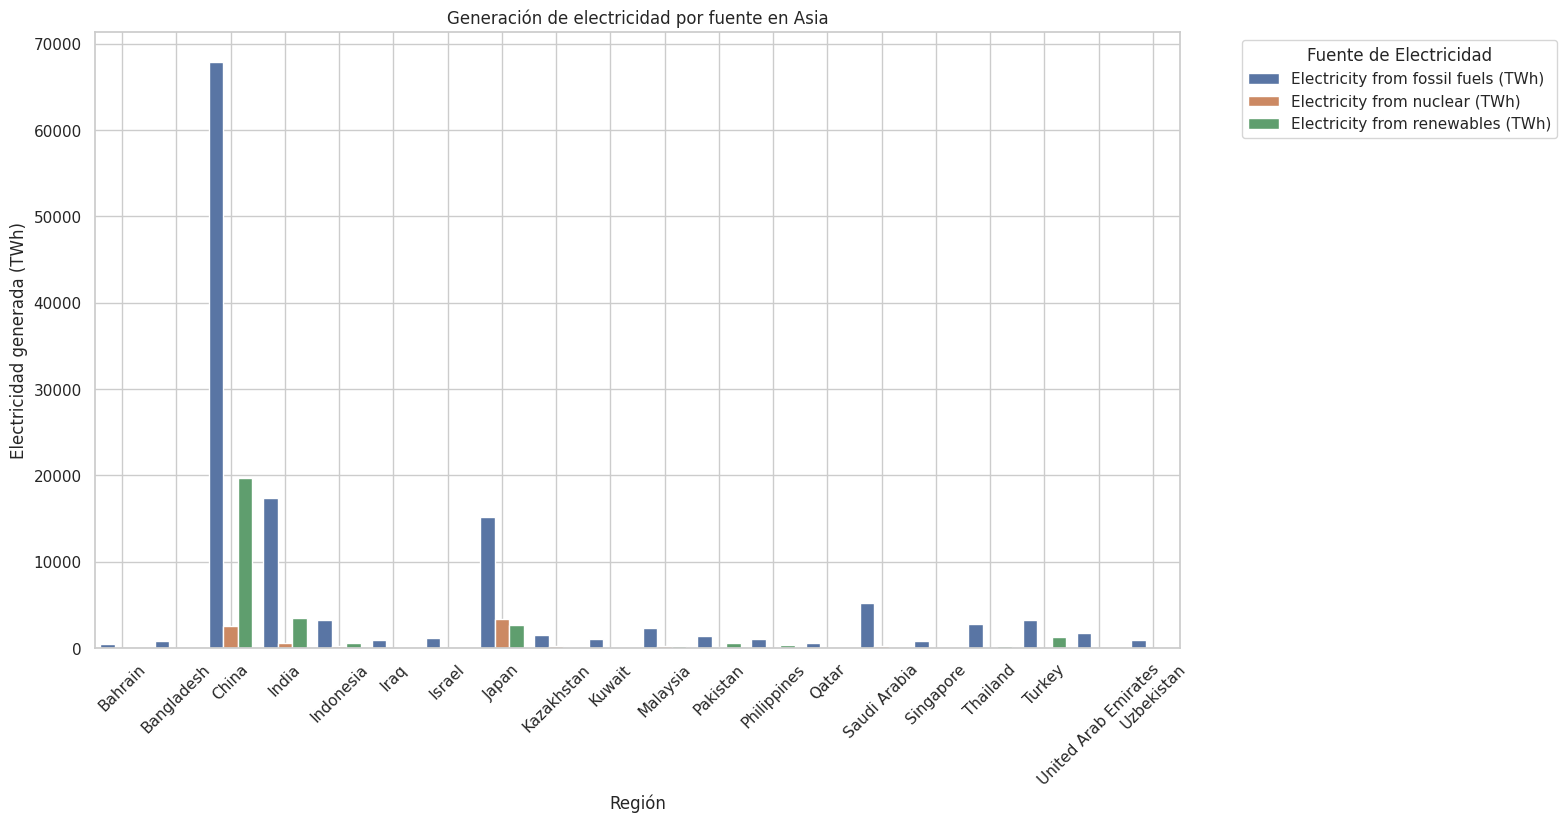

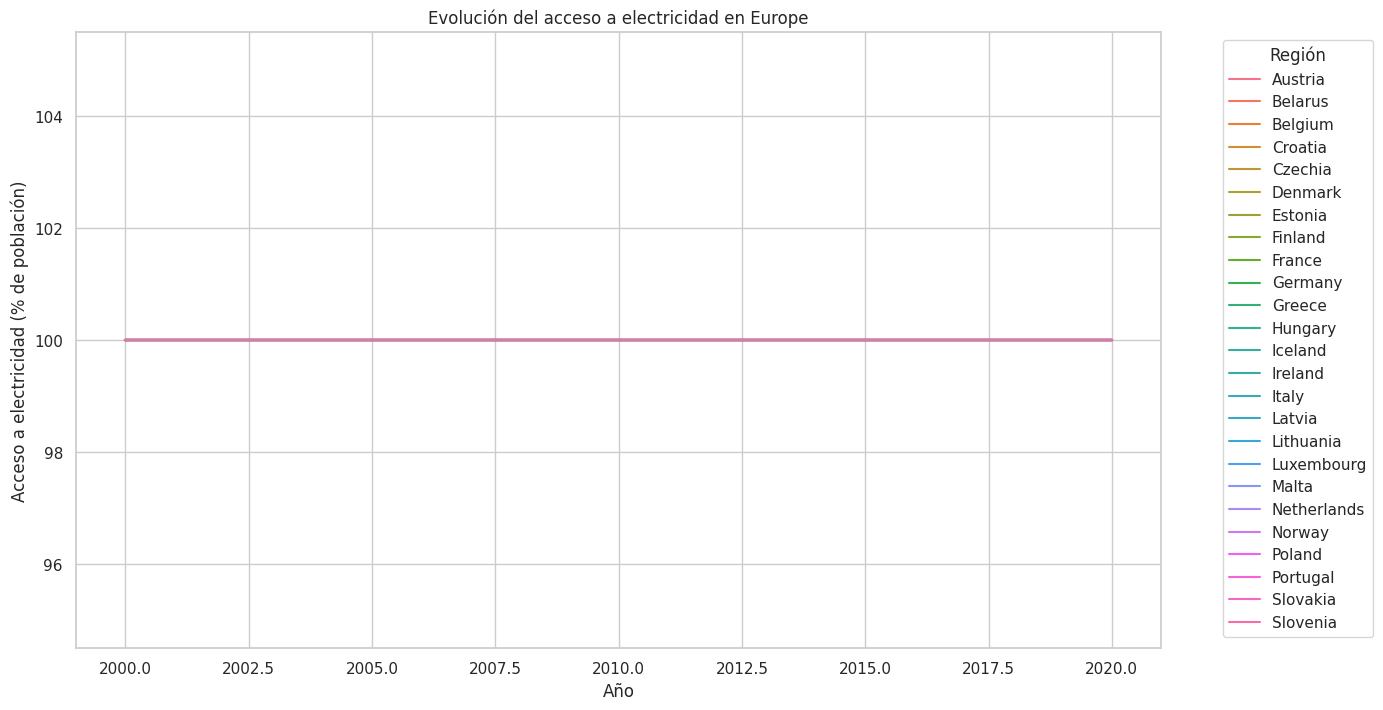

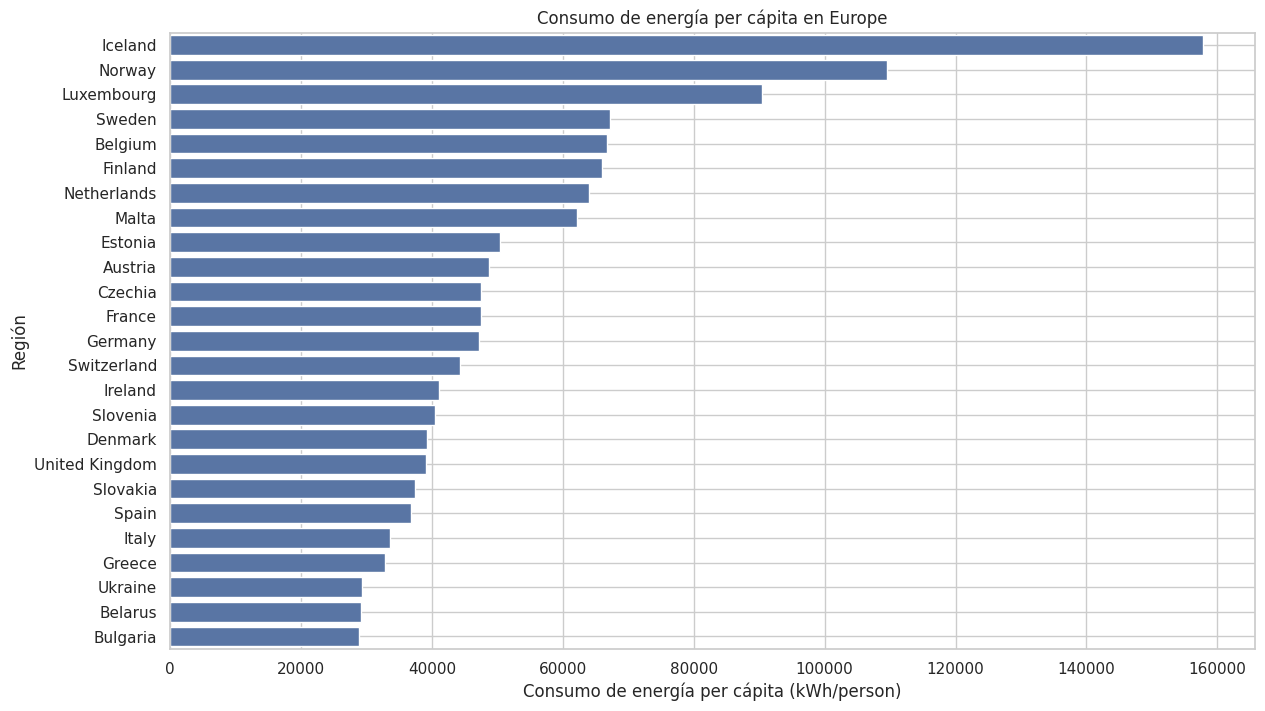

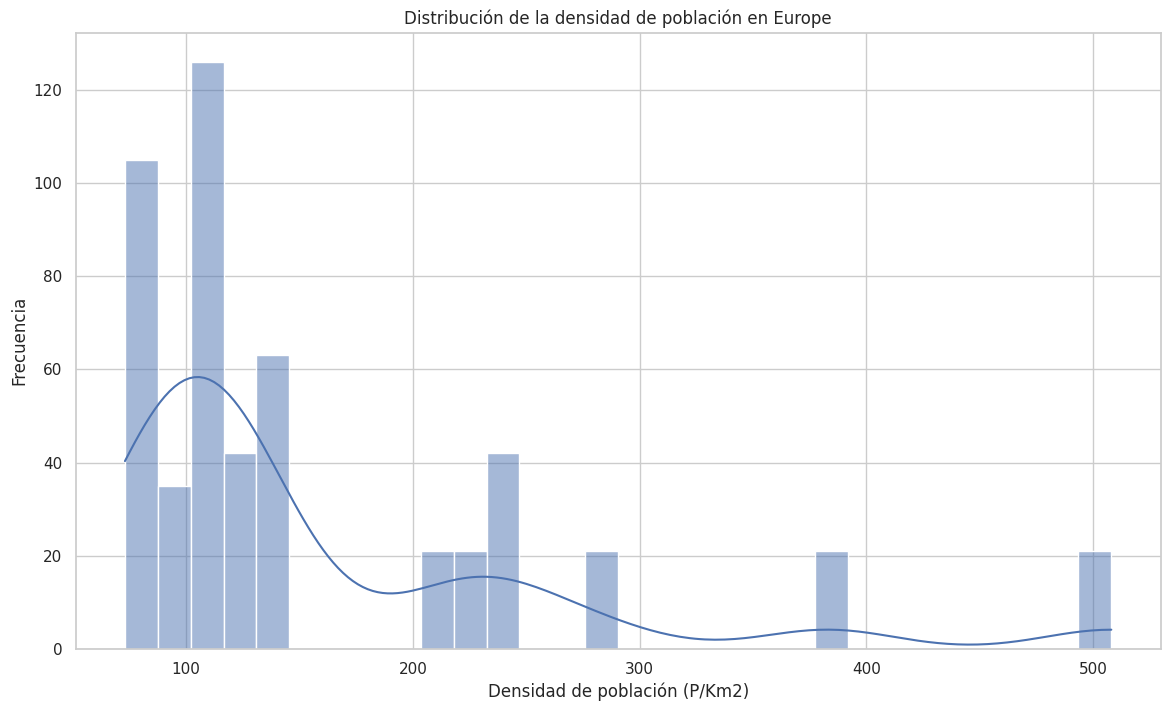

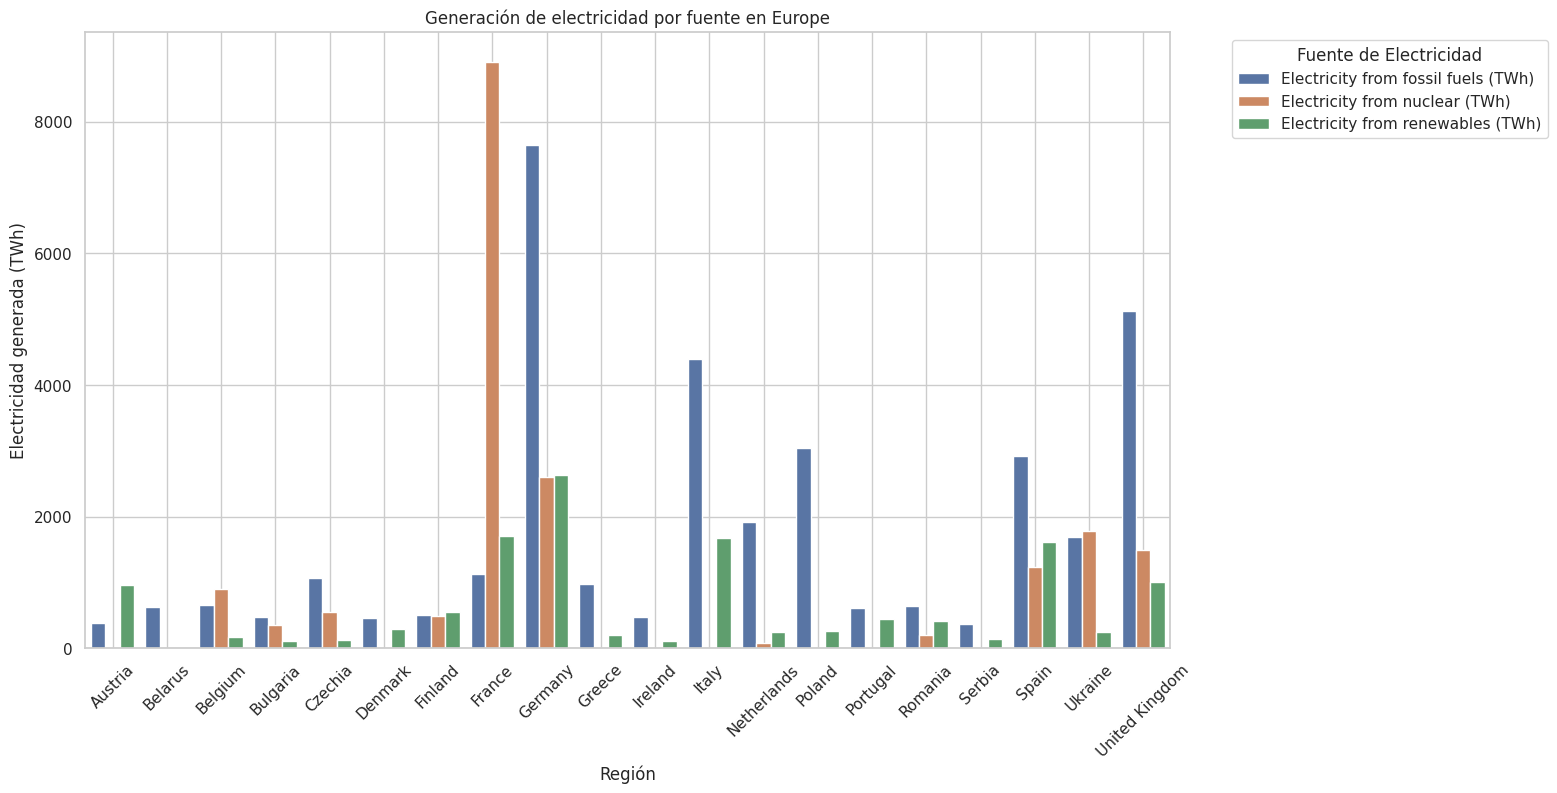

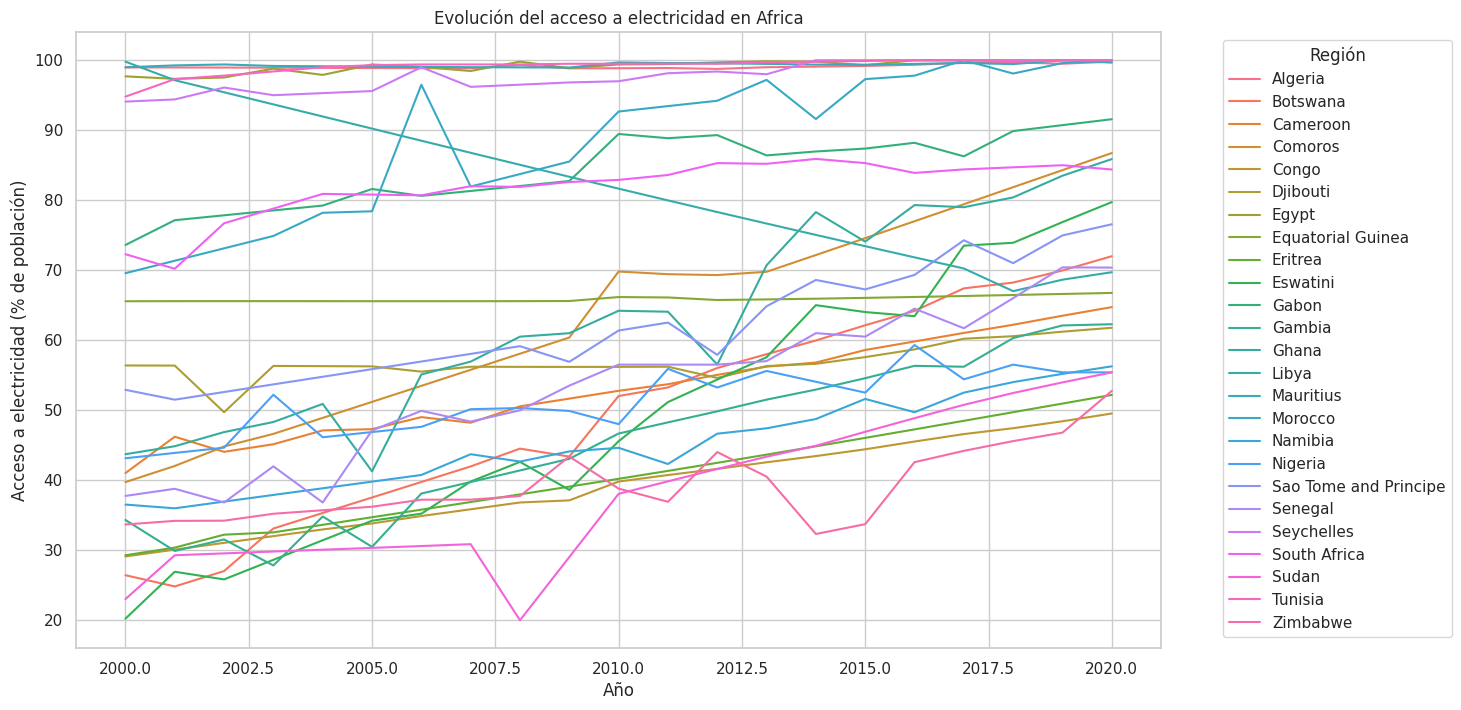

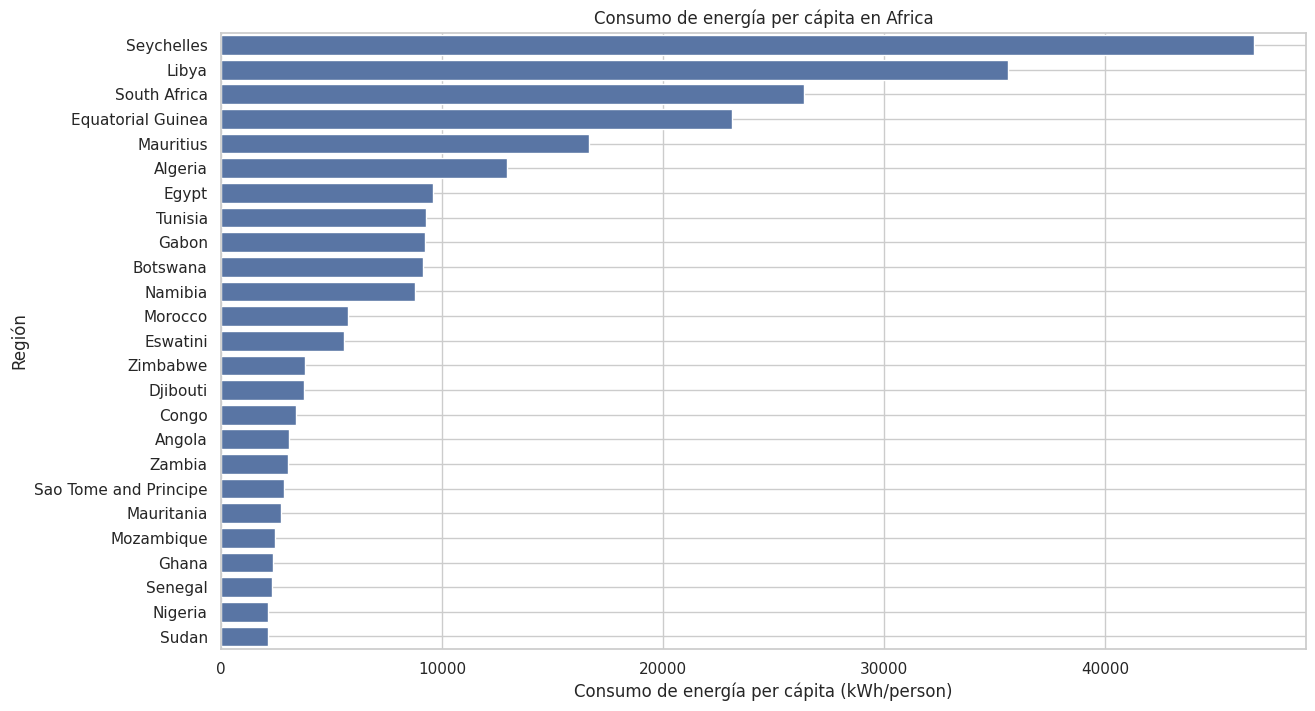

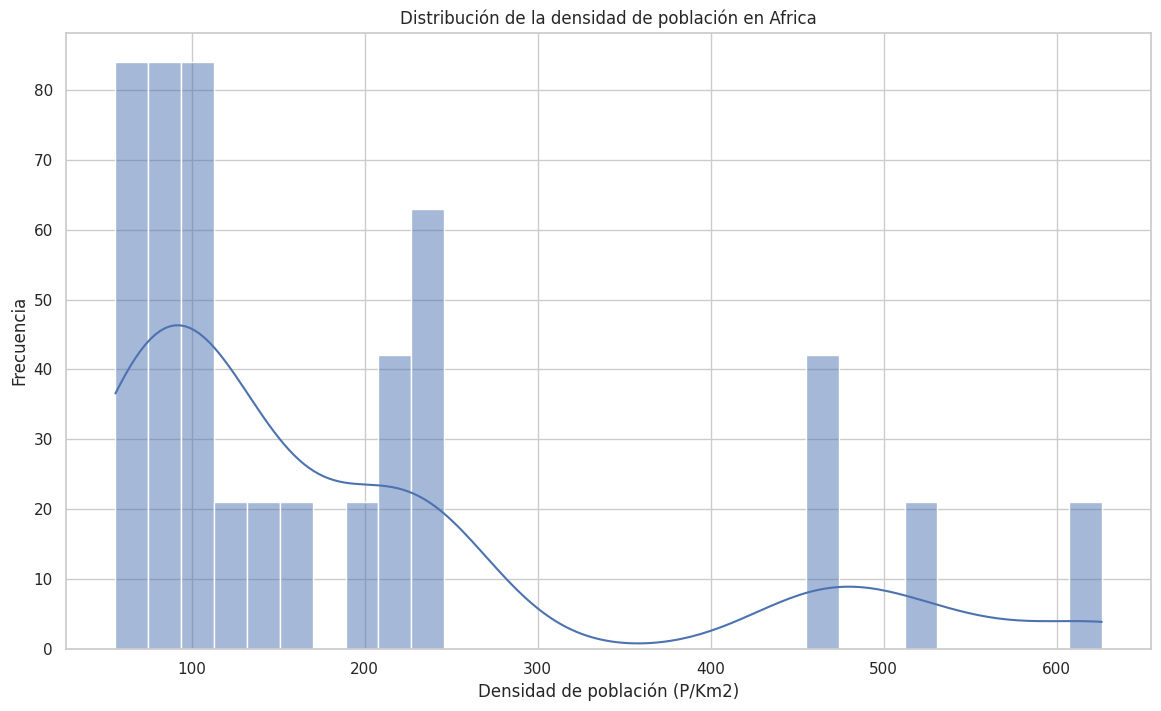

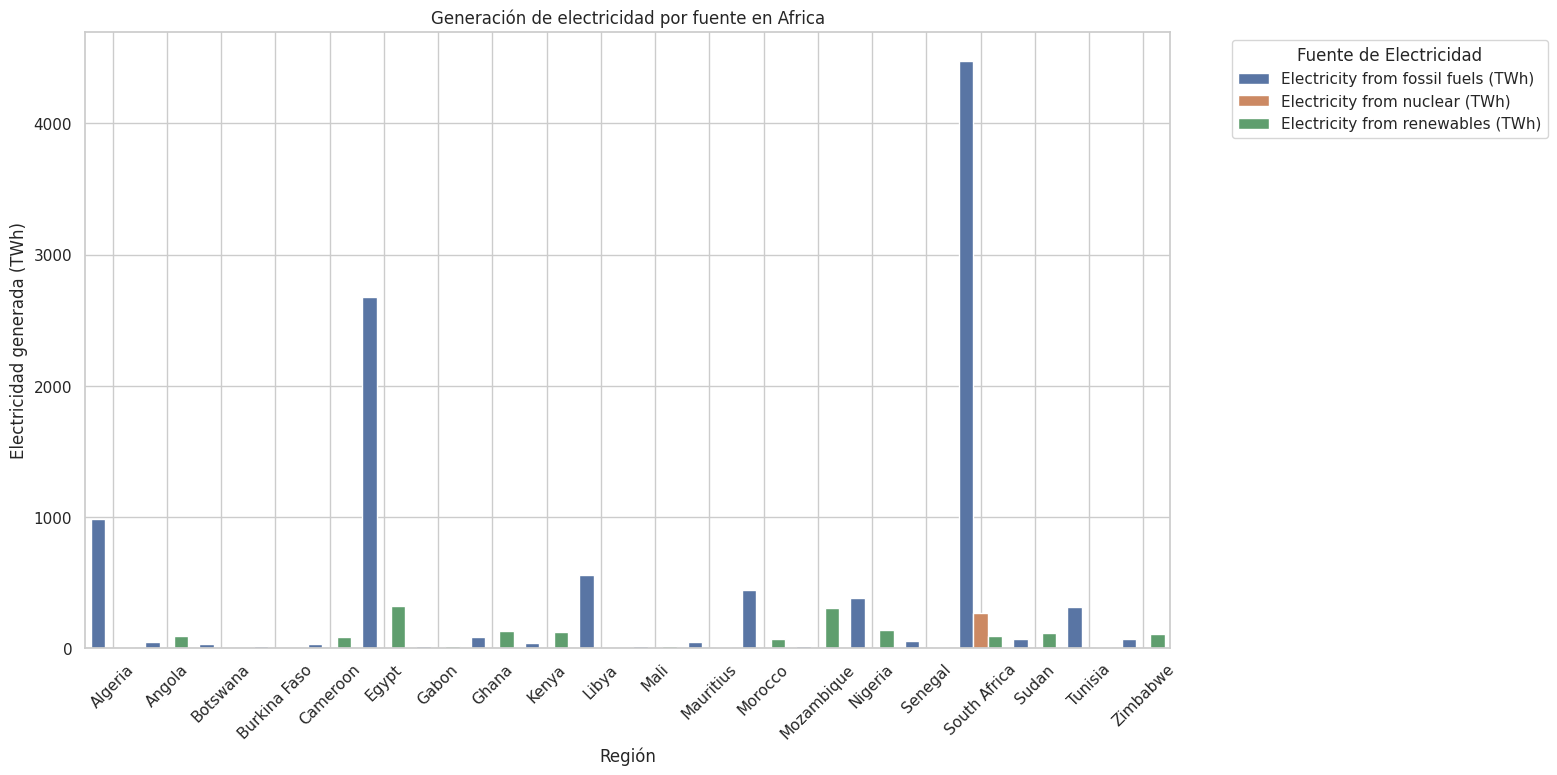

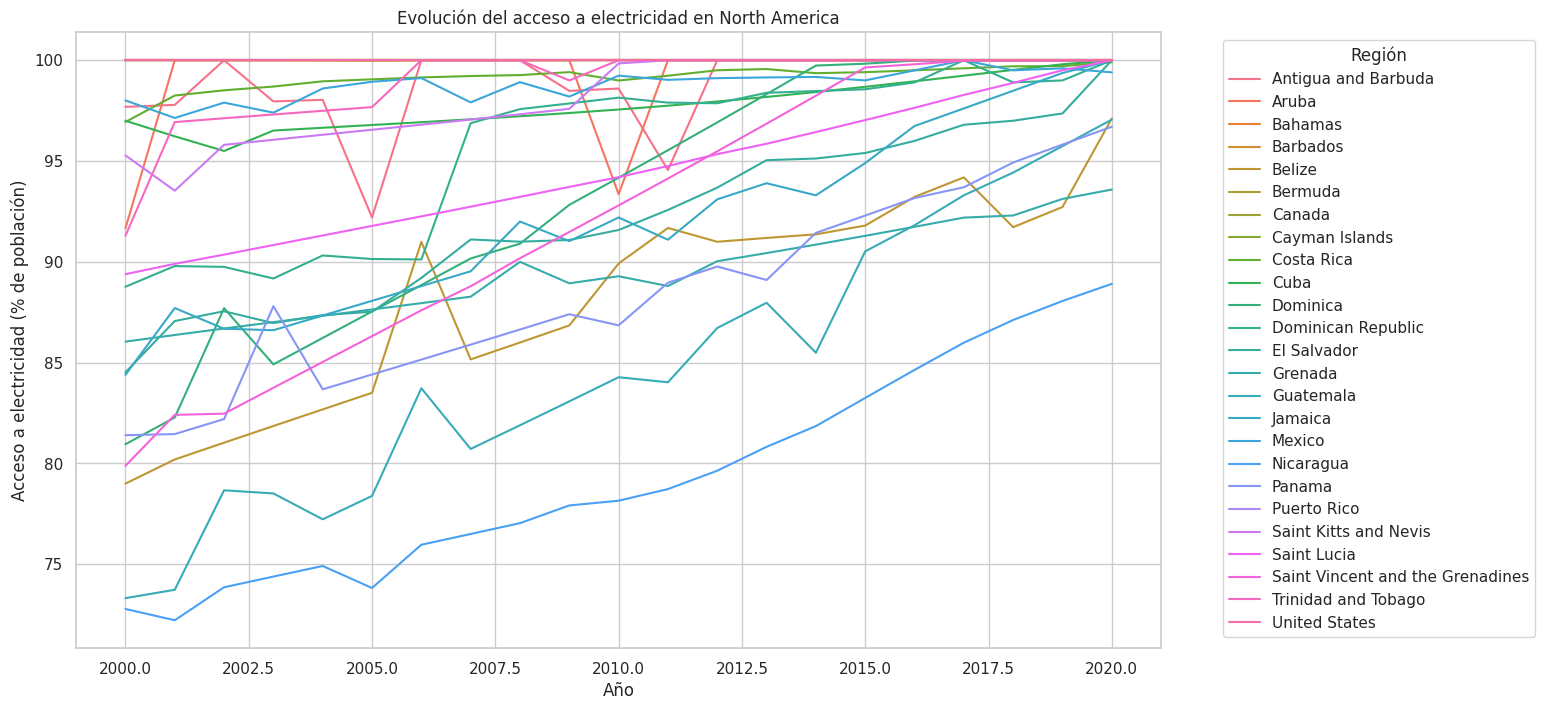

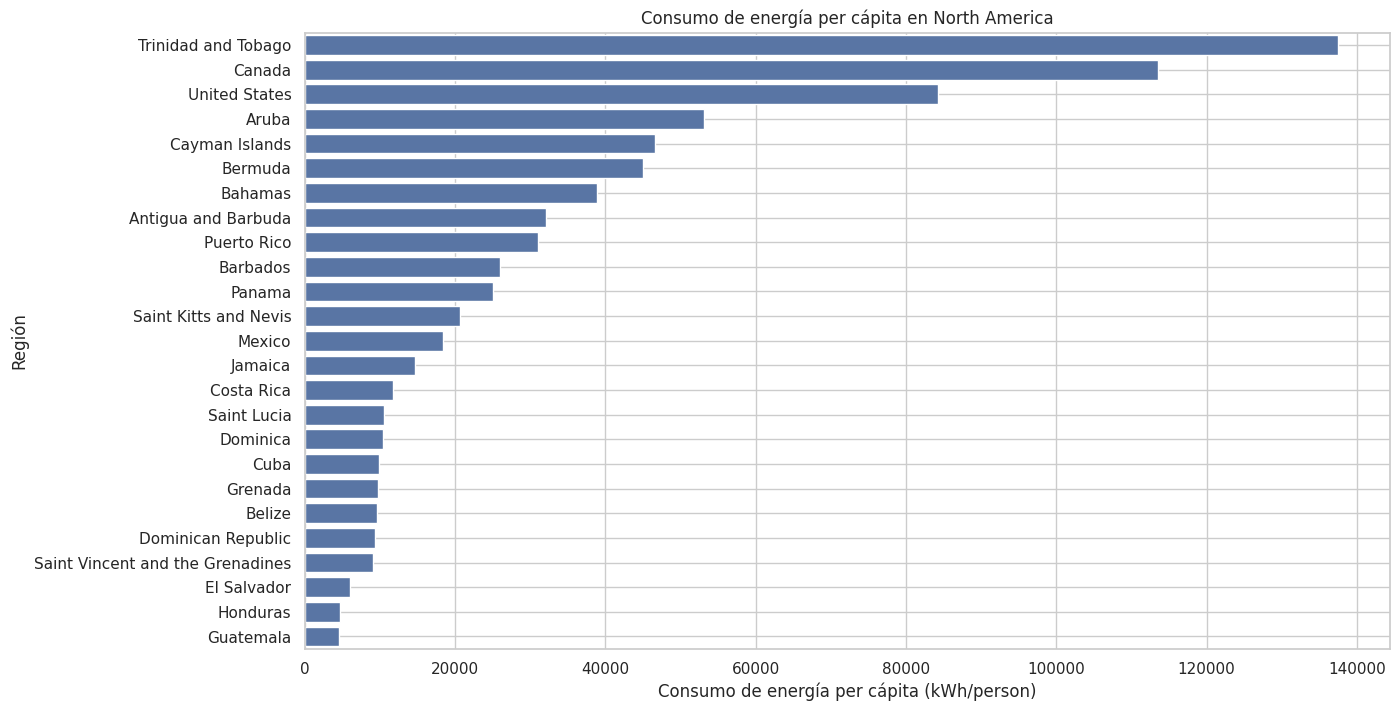

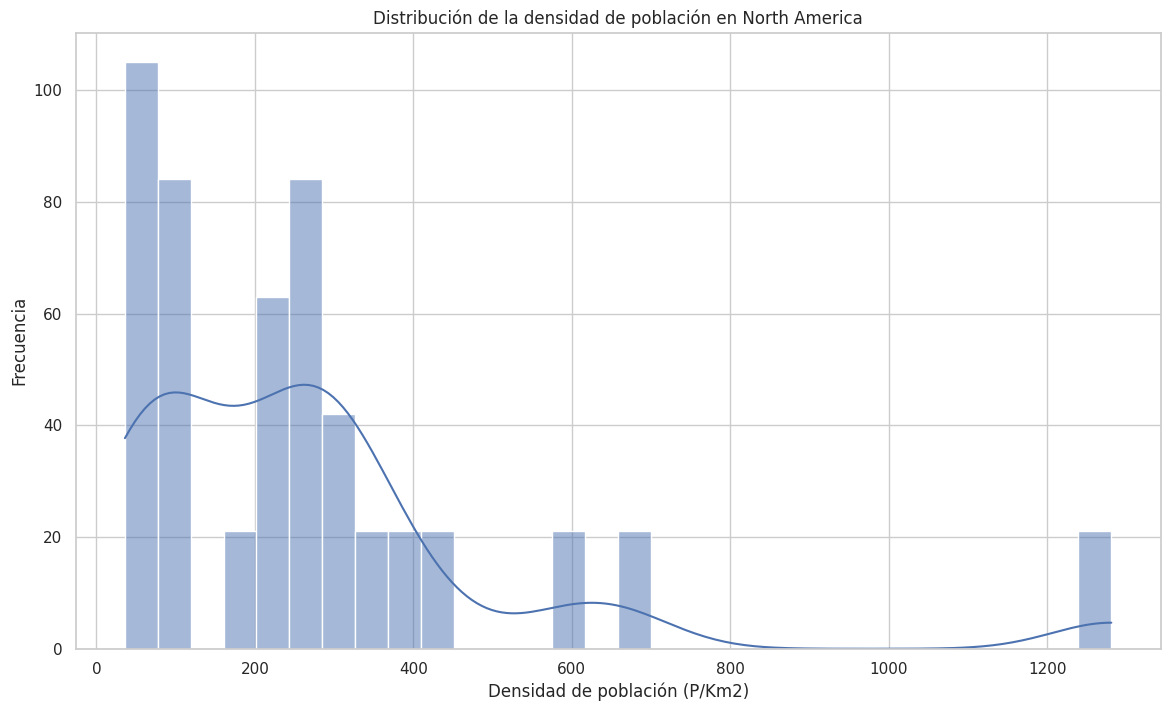

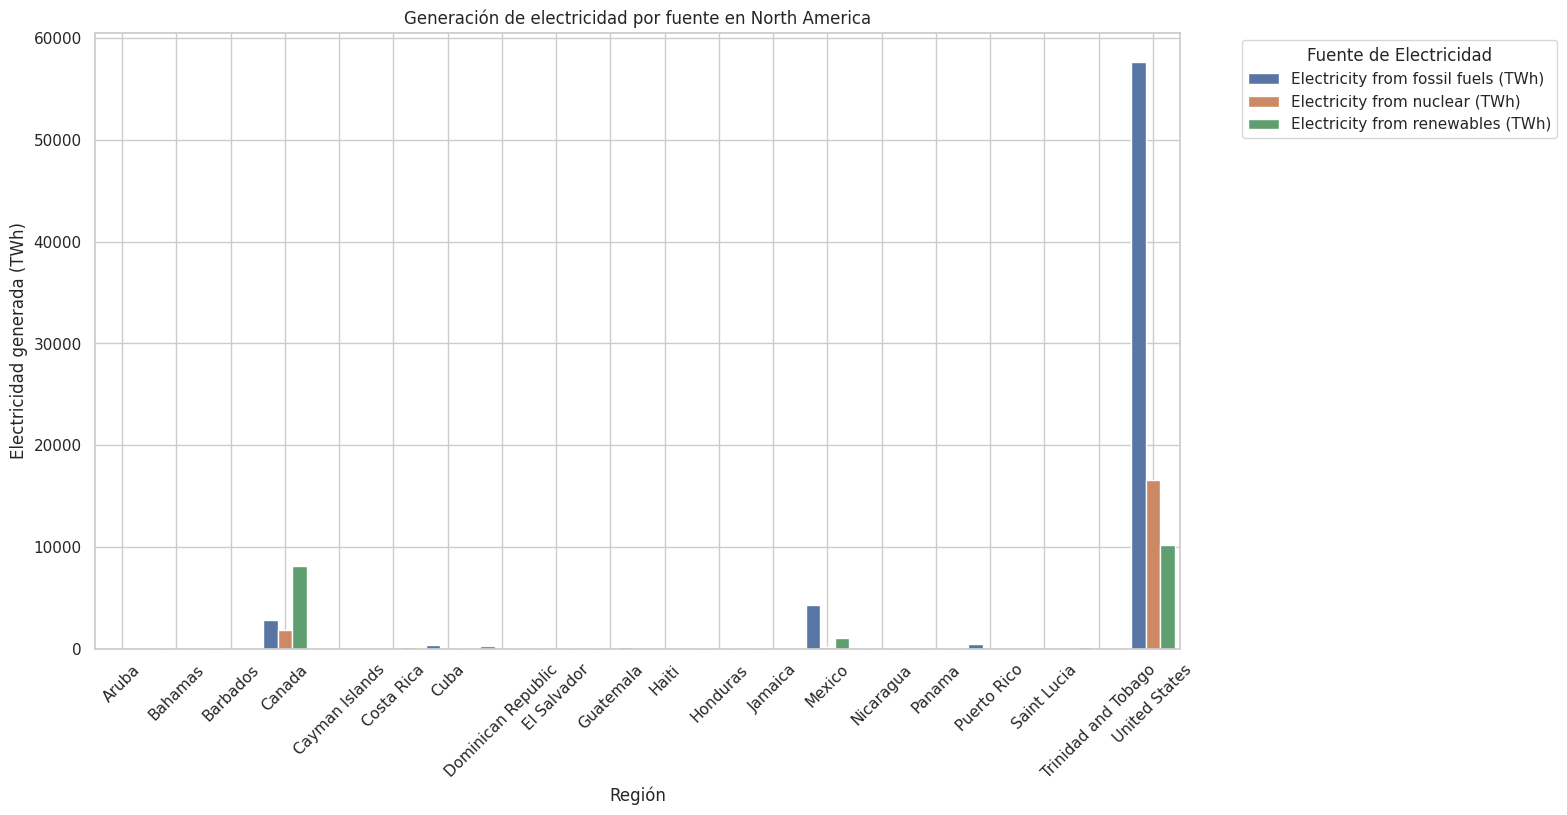

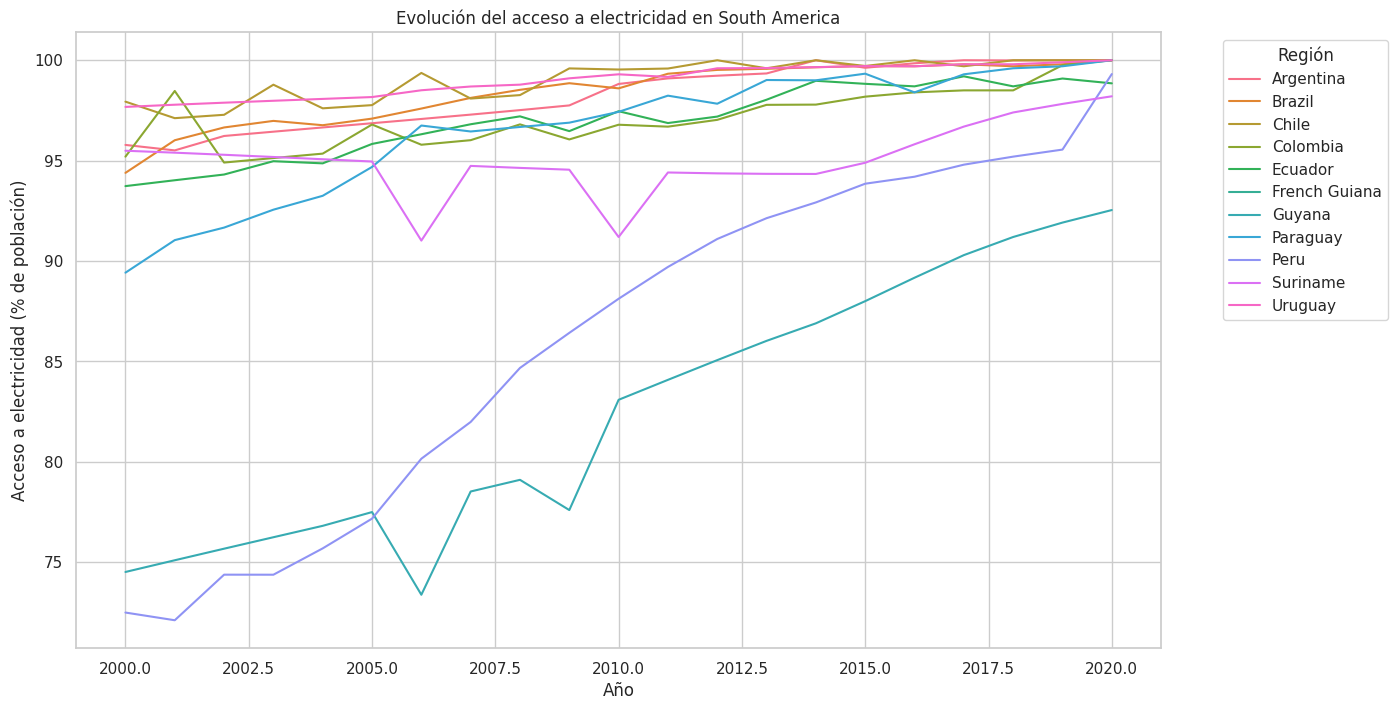

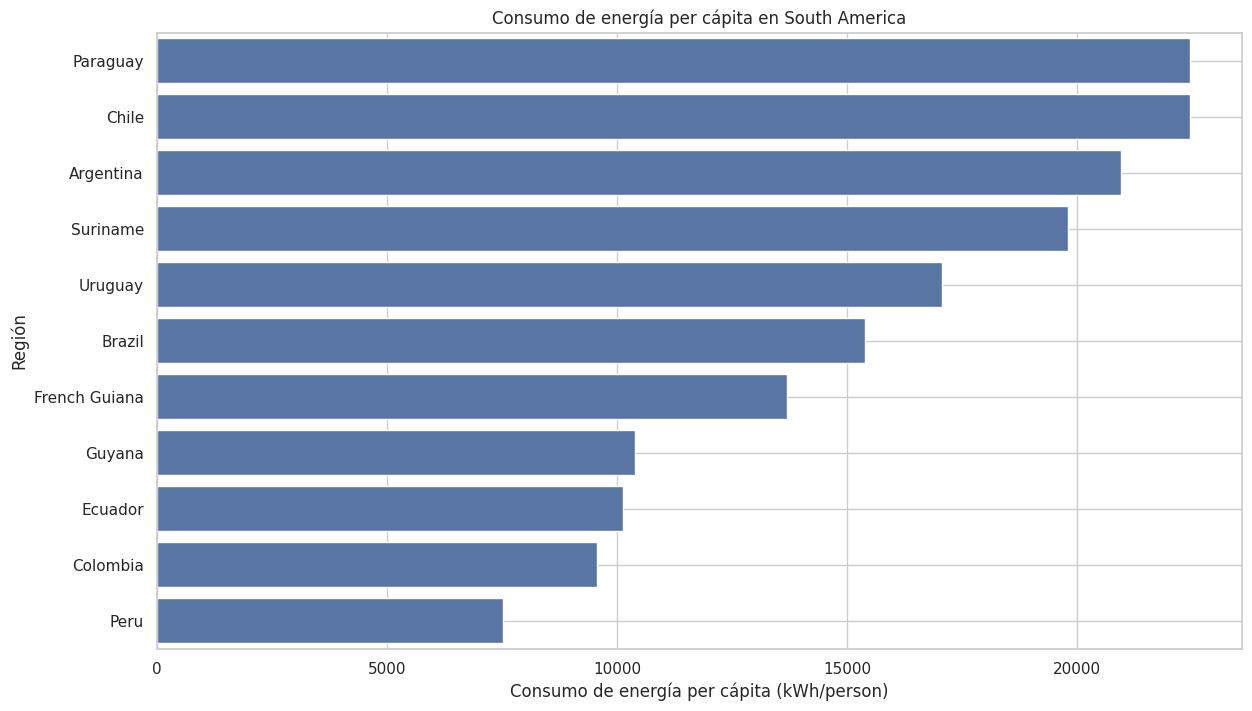

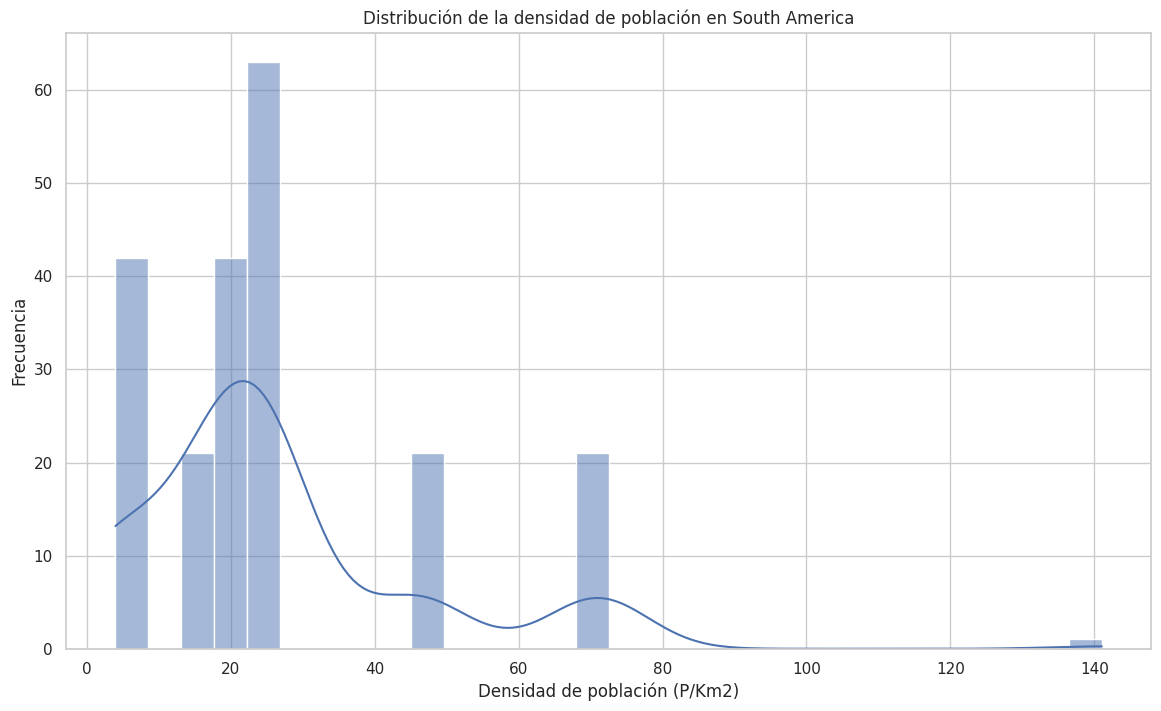

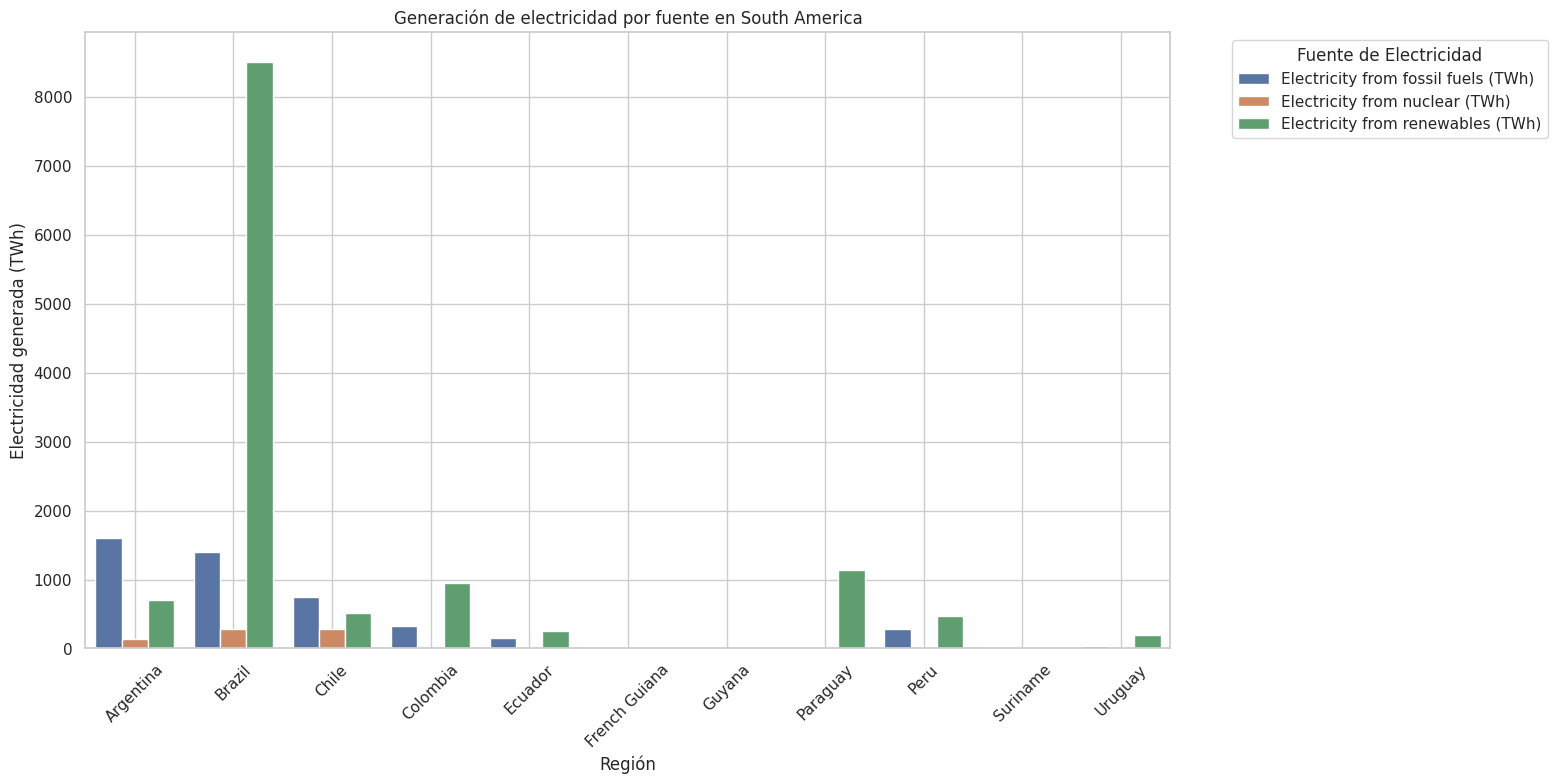

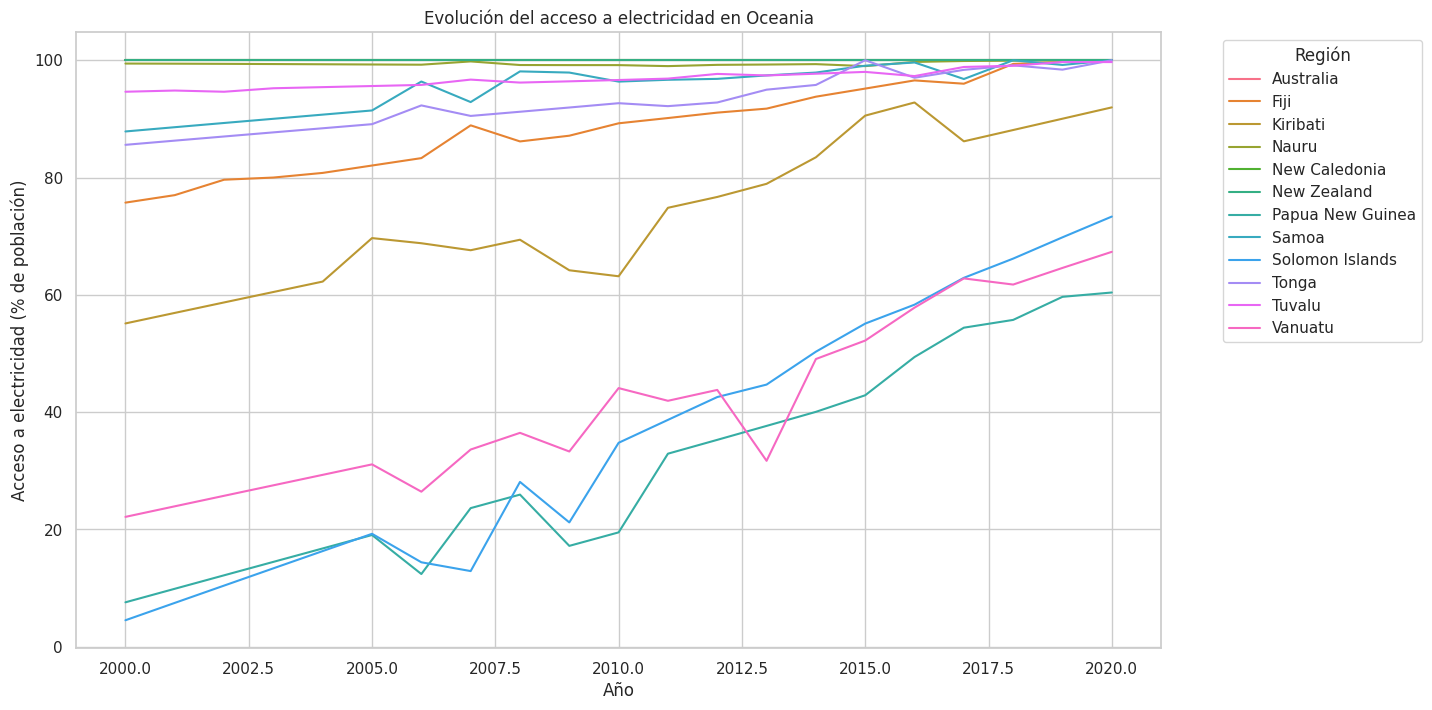

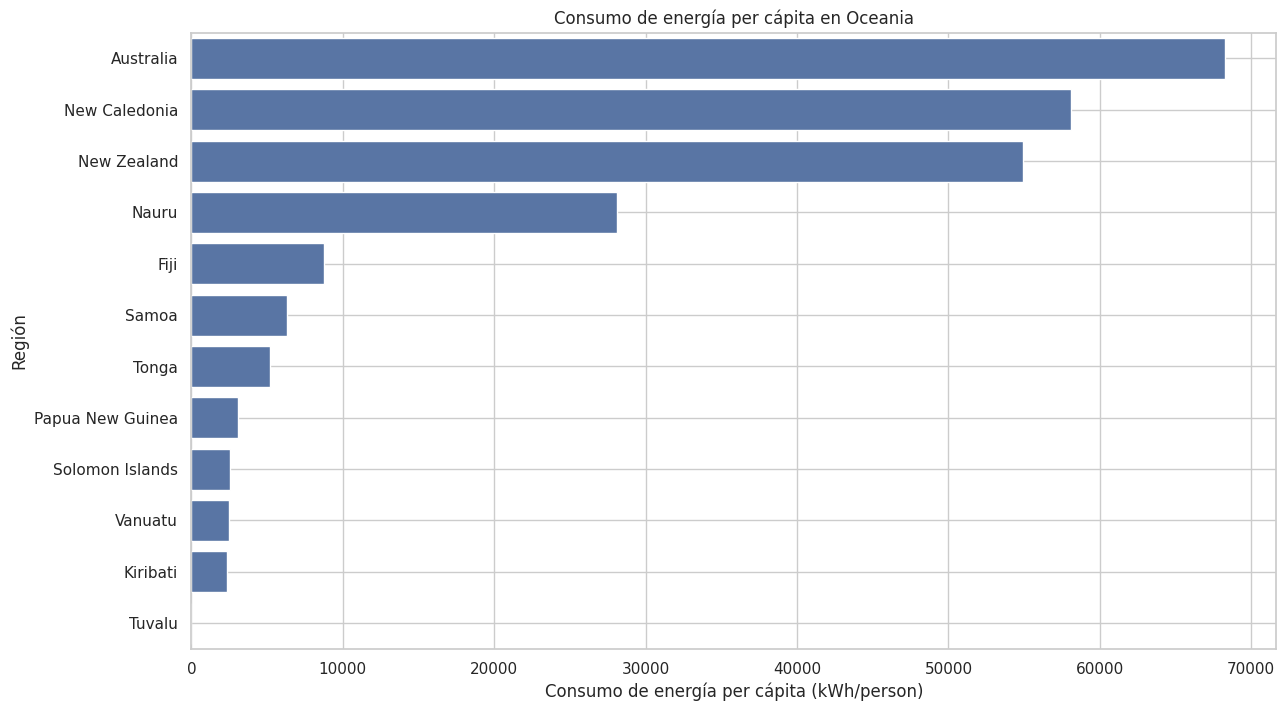

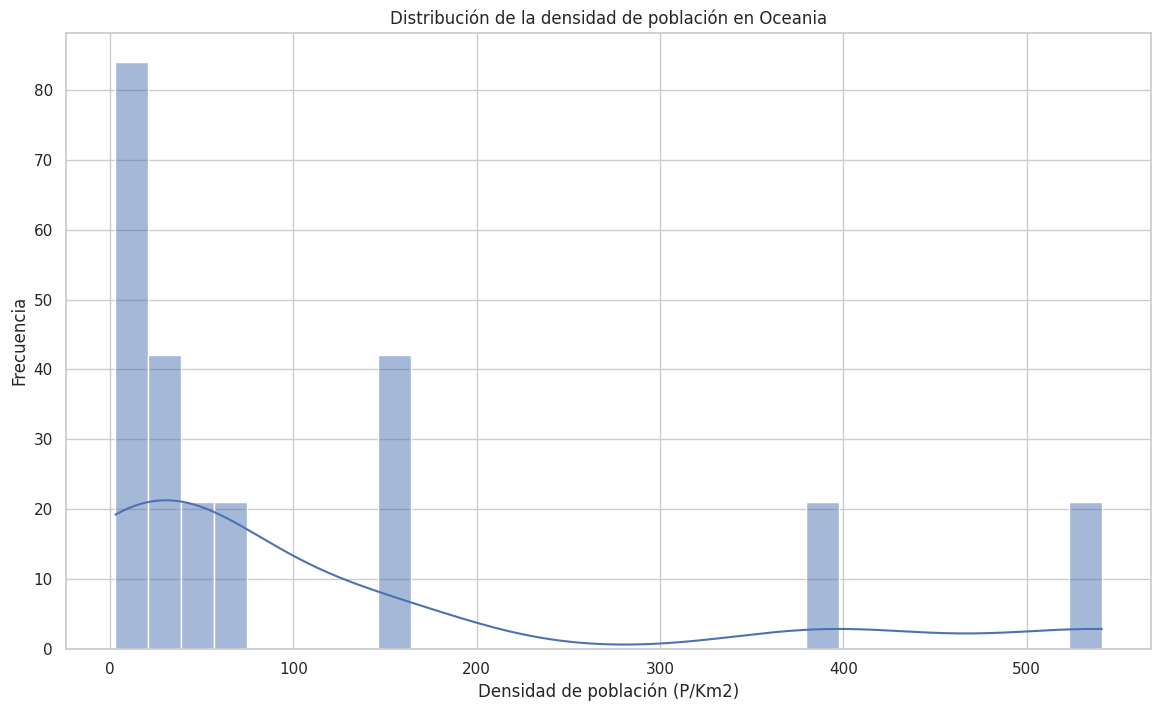

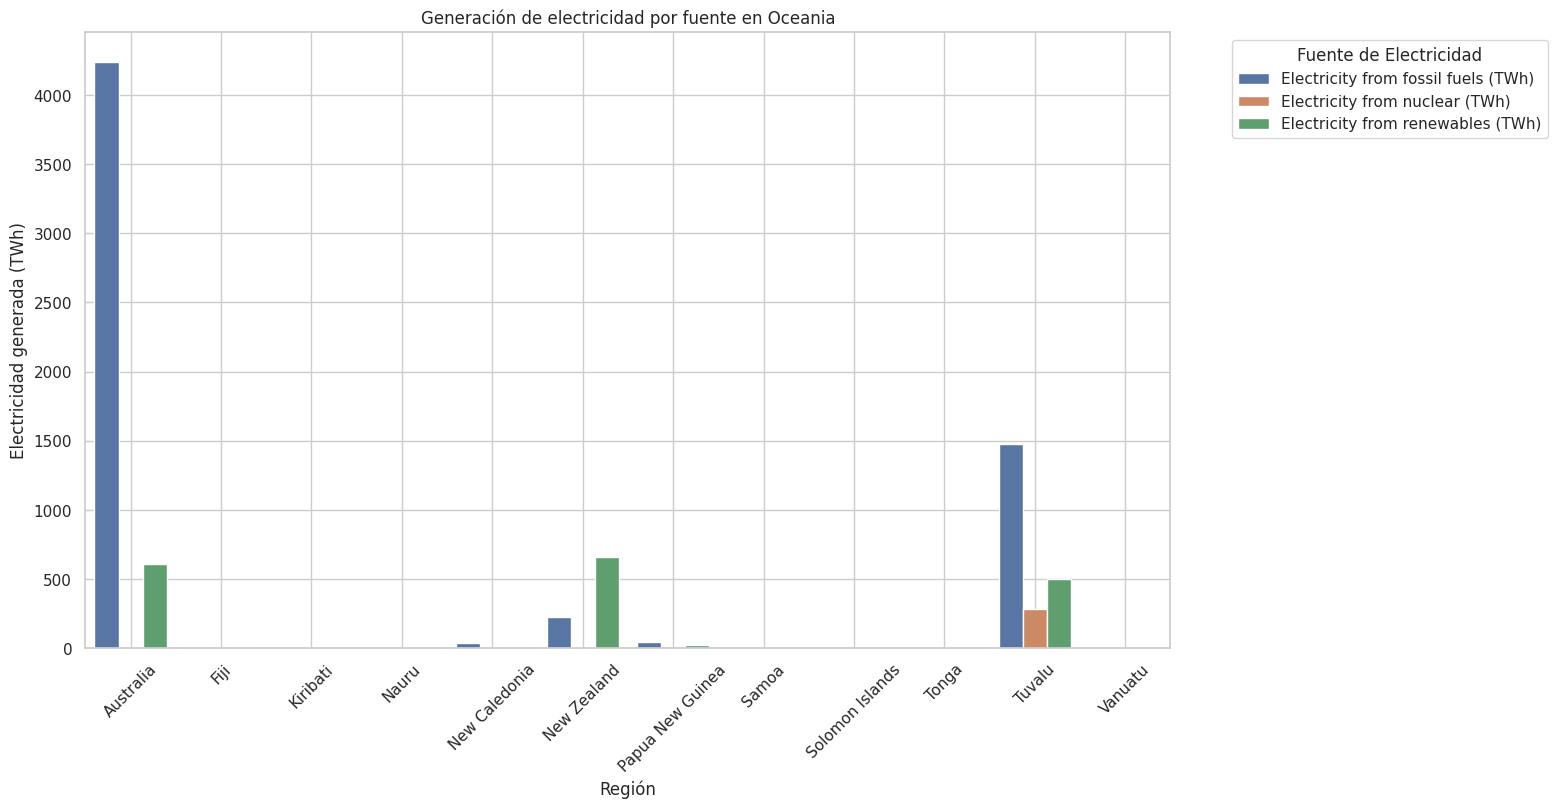

In [119]:
def plot_by_continent(df, continent):
    df_continent = energy[energy['Continent'] == continent]

    # Filtrar los primeros 20 países por diferentes métricas según sea apropiado
    top20_electricity_access = df_continent.groupby('Entity')['Access to electricity (% of population)'].mean().nlargest(25).index
    top20_energy_consumption = df_continent.groupby('Entity')['Primary energy consumption per capita (kWh/person)'].mean().nlargest(25).index
    top20_gdp_per_capita = df_continent.groupby('Entity')['gdp_per_capita'].mean().nlargest(25).index
    top20_density = df_continent.groupby('Entity')['Density (P/Km2)'].mean().nlargest(25).index
    top20_electricity_generation = df_continent.groupby('Entity')[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].sum().nlargest(20, 'Electricity from fossil fuels (TWh)').index

    # 1. Evolución del acceso a electricidad por región
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_continent[df_continent['Entity'].isin(top20_electricity_access)], x='Year', y='Access to electricity (% of population)', hue='Entity')
    plt.title(f'Evolución del acceso a electricidad en {continent}')
    plt.xlabel('Año')
    plt.ylabel('Acceso a electricidad (% de población)')
    plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

    # 2. Comparación del consumo de energía per cápita entre países
    df_energy_per_capita = df_continent[df_continent['Entity'].isin(top20_energy_consumption)].groupby('Entity')['Primary energy consumption per capita (kWh/person)'].mean().reset_index()
    df_energy_per_capita = df_energy_per_capita.sort_values(by='Primary energy consumption per capita (kWh/person)', ascending=False)
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df_energy_per_capita, x='Primary energy consumption per capita (kWh/person)', y='Entity')
    plt.title(f'Consumo de energía per cápita en {continent}')
    plt.xlabel('Consumo de energía per cápita (kWh/person)')
    plt.ylabel('Región')
    plt.grid(True)
    plt.show()

    # 3. Distribución de la densidad de población
    plt.figure(figsize=(14, 8))
    sns.histplot(df_continent[df_continent['Entity'].isin(top20_density)]['Density (P/Km2)'], bins=30, kde=True)
    plt.title(f'Distribución de la densidad de población en {continent}')
    plt.xlabel('Densidad de población (P/Km2)')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    # 4. Comparación de la generación de electricidad por fuente
    df_electricity_sources = df_continent[df_continent['Entity'].isin(top20_electricity_generation)].groupby('Entity')[['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']].sum().reset_index()
    df_electricity_sources_melted = df_electricity_sources.melt(id_vars='Entity', var_name='Fuente', value_name='Electricidad (TWh)')
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df_electricity_sources_melted, x='Entity', y='Electricidad (TWh)', hue='Fuente')
    plt.title(f'Generación de electricidad por fuente en {continent}')
    plt.xlabel('Región')
    plt.ylabel('Electricidad generada (TWh)')
    plt.xticks(rotation=45)
    plt.legend(title='Fuente de Electricidad', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Lista de continentes
continents = energy['Continent'].unique()

# Generar gráficos para cada continente
for continent in continents:
    plot_by_continent(energy, continent)

#### Promedio de consumo de energia por contiente.

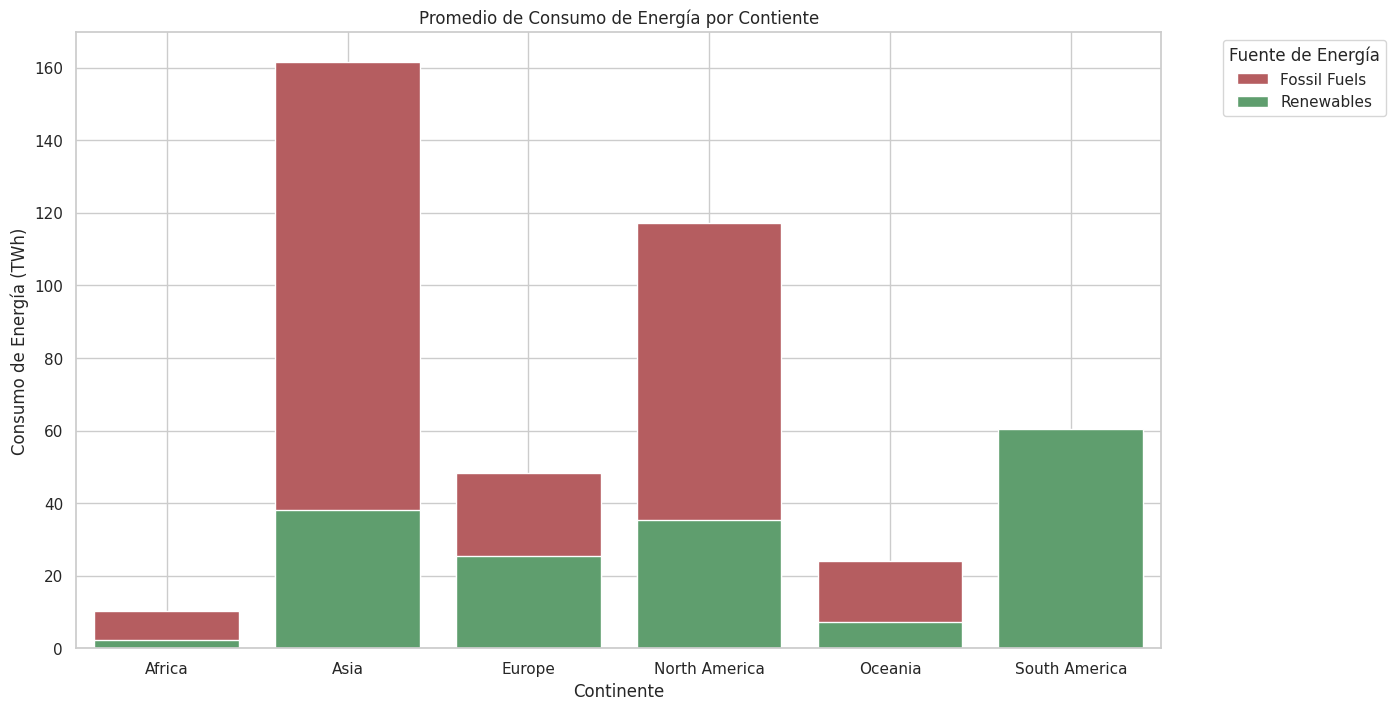

In [120]:
energy_by_continent = energy.groupby('Continent')[['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)']].mean().reset_index()

# Crear gráficos de barras para los promedios
plt.figure(figsize=(14, 8))
sns.barplot(data=energy_by_continent, x='Continent', y='Electricity from fossil fuels (TWh)', color='r', label='Fossil Fuels')
sns.barplot(data=energy_by_continent, x='Continent', y='Electricity from renewables (TWh)', color='g', label='Renewables')
plt.title('Promedio de Consumo de Energía por Contiente')
plt.xlabel('Continente')
plt.ylabel('Consumo de Energía (TWh)')
plt.legend(title='Fuente de Energía', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Evolución del consumos de energía proveniente de combustibles fósiles, en comparación con fuentes renovables

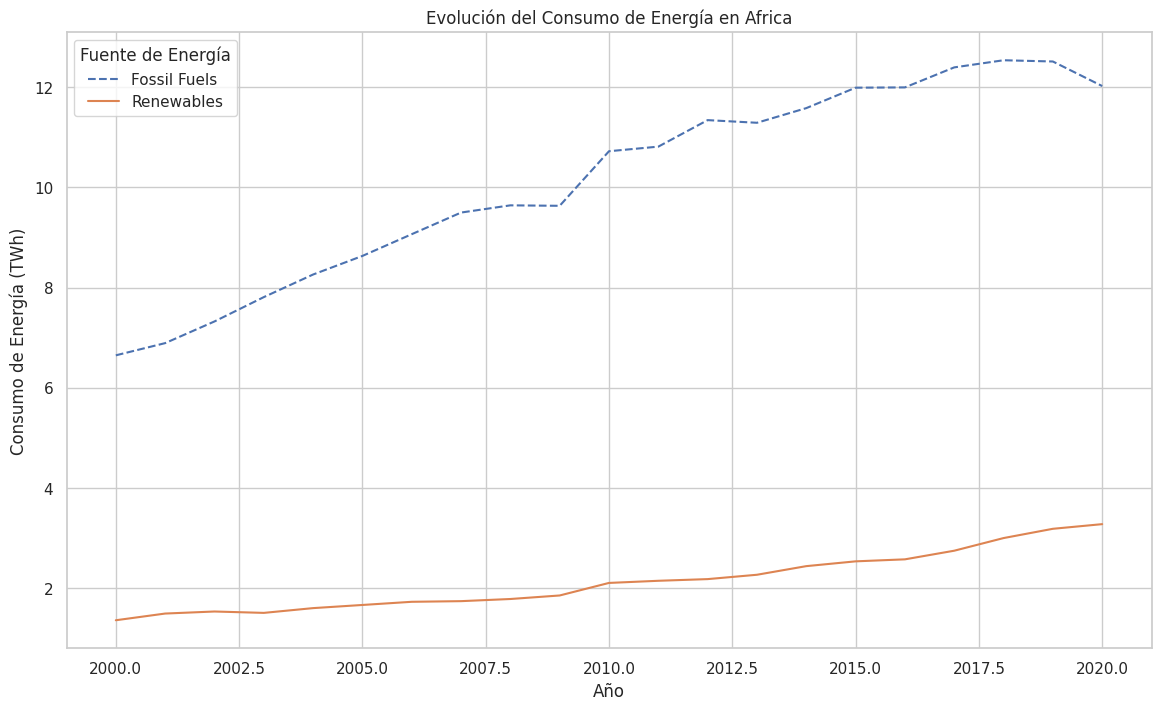

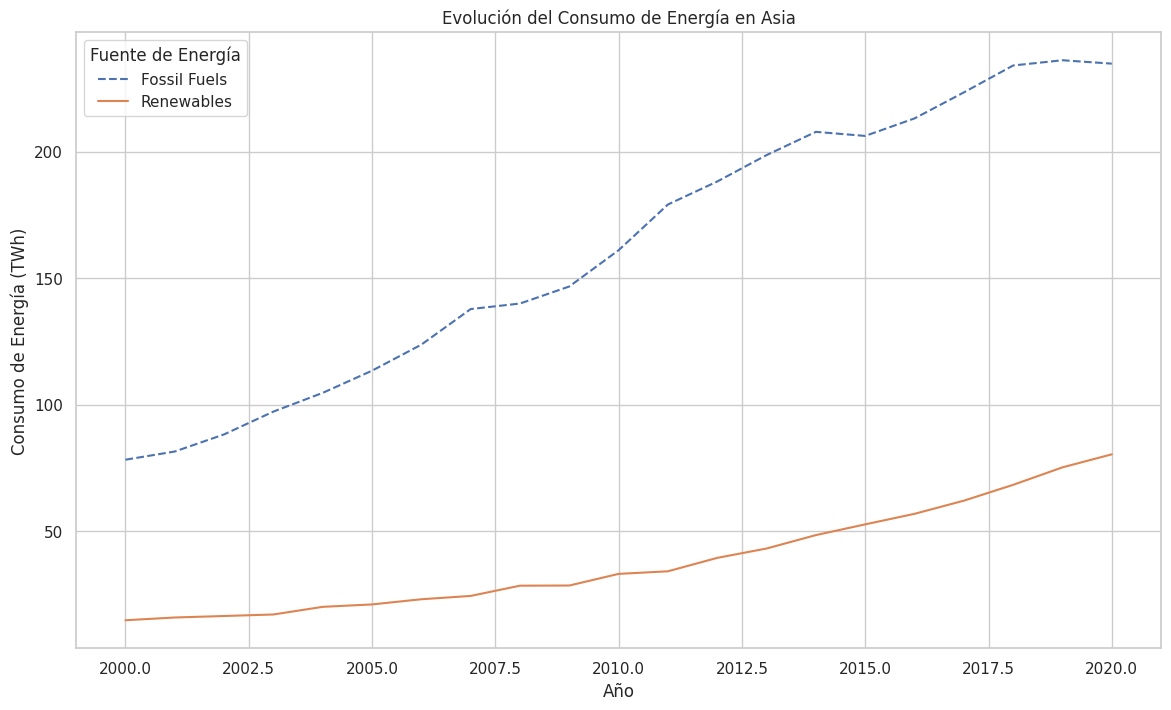

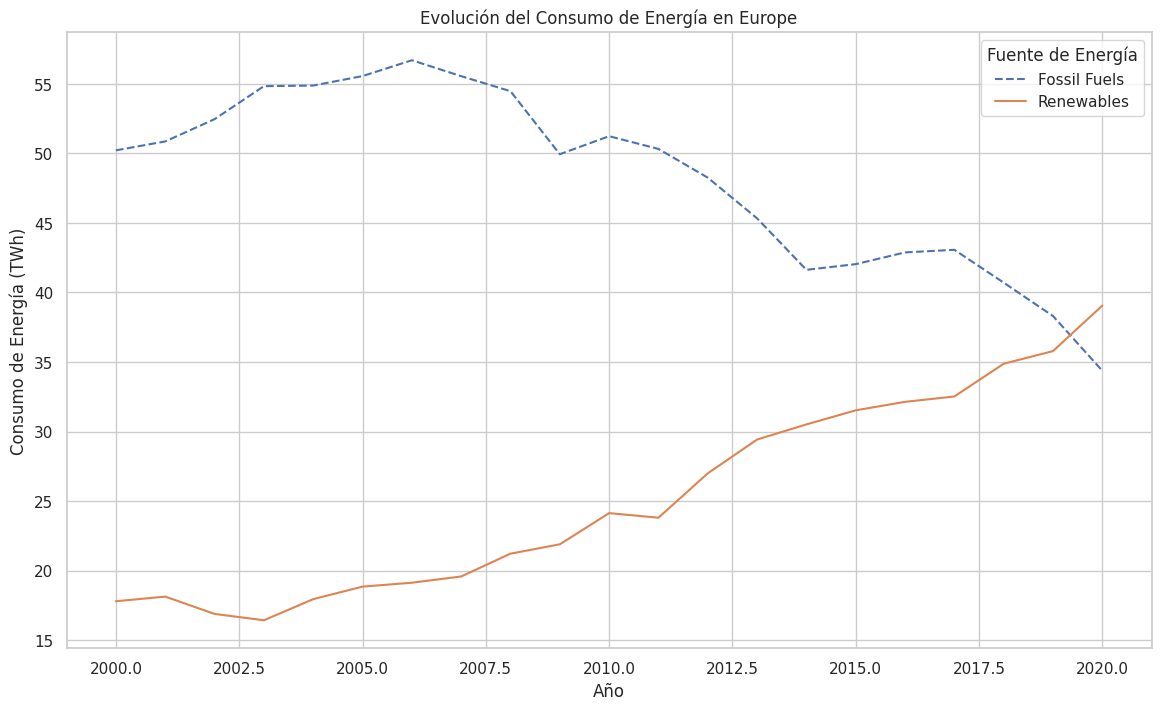

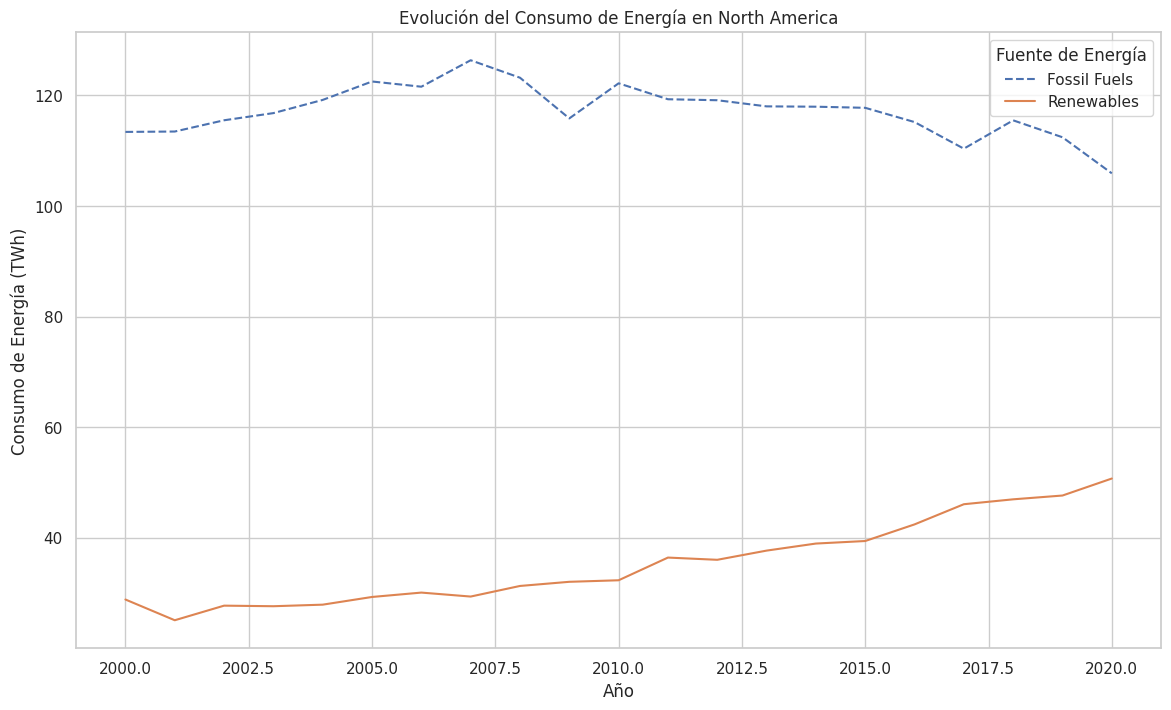

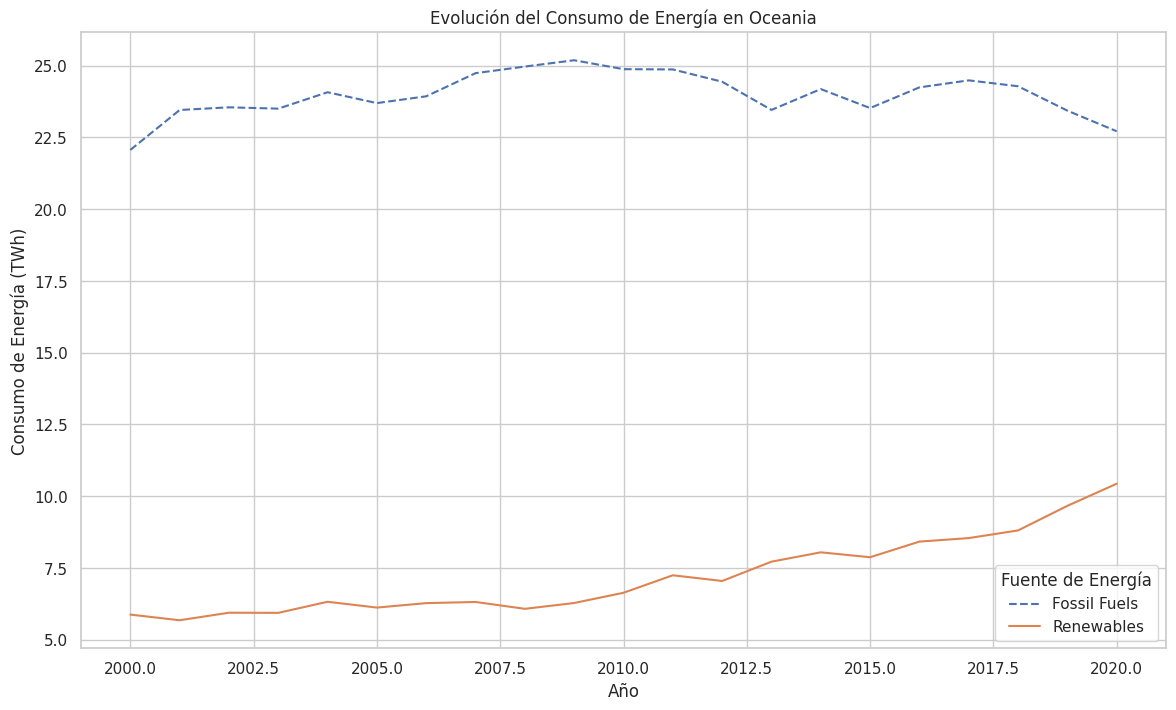

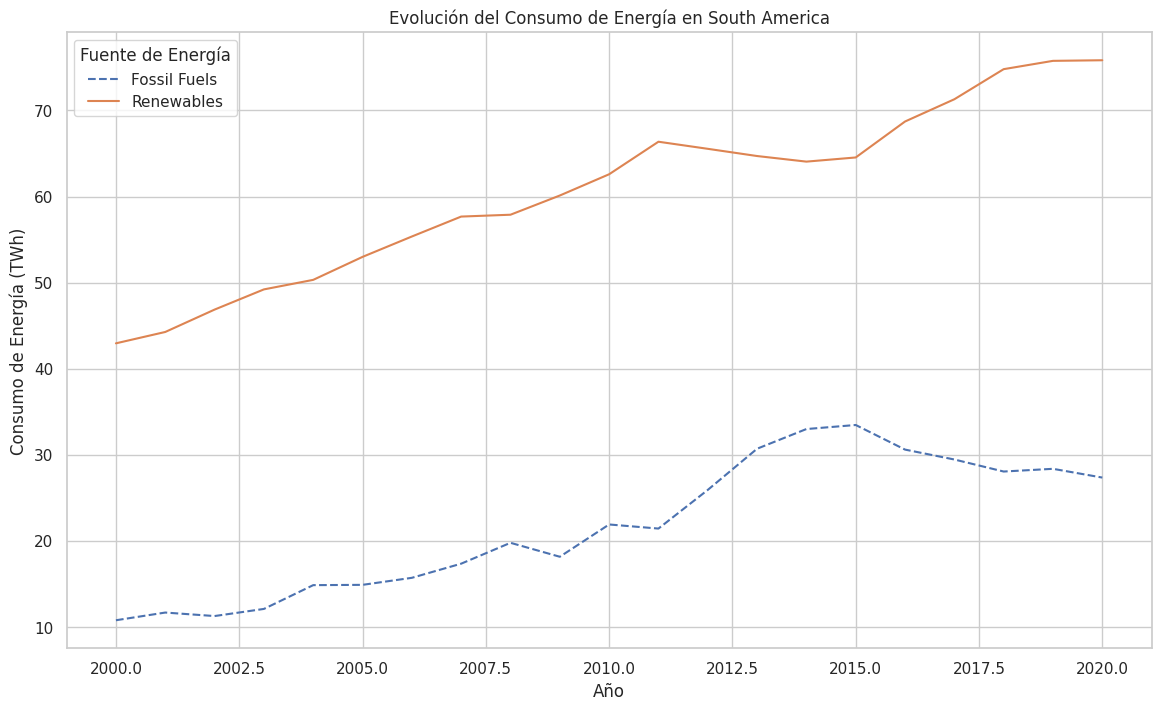

In [121]:
energy_by_continent_year = energy.groupby(['Continent', 'Year'])[['Electricity from fossil fuels (TWh)', 'Electricity from renewables (TWh)']].mean().reset_index()

# Crear gráficos de líneas para cada continente
continents = energy_by_continent_year['Continent'].unique()

for continent in continents:
    plt.figure(figsize=(14, 8))
    continent_data = energy_by_continent_year[energy_by_continent_year['Continent'] == continent]

    plt.plot(continent_data['Year'], continent_data['Electricity from fossil fuels (TWh)'], label='Fossil Fuels', linestyle='--')
    plt.plot(continent_data['Year'], continent_data['Electricity from renewables (TWh)'], label='Renewables', linestyle='-')

    plt.title(f'Evolución del Consumo de Energía en {continent}')
    plt.xlabel('Año')
    plt.ylabel('Consumo de Energía (TWh)')
    plt.legend(title='Fuente de Energía')
    plt.grid(True)
    plt.show()

#### Top ten de paises mas consumidores per capita.

Top 10 países con mayor consumo de energía total:
['Qatar', 'Iceland', 'Bahrain', 'Singapore', 'United Arab Emirates', 'Trinidad and Tobago', 'Kuwait', 'Canada', 'Norway', 'Luxembourg']


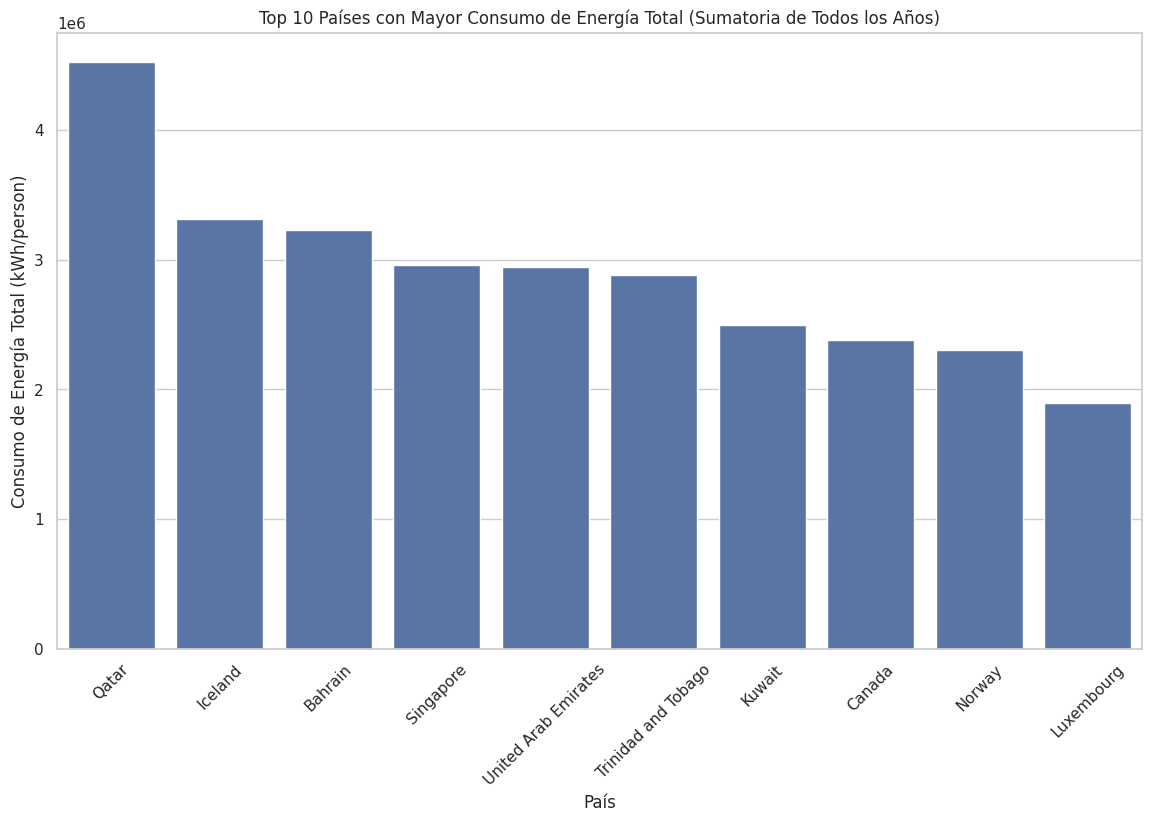

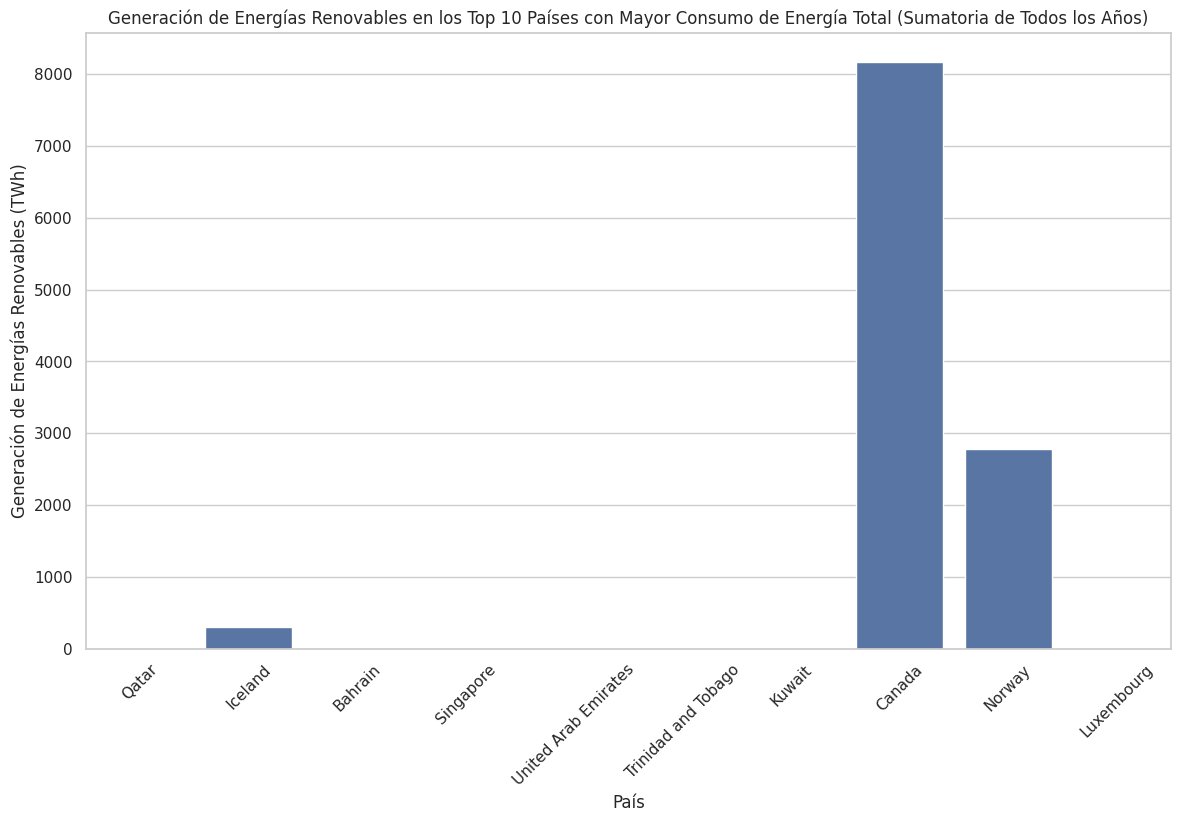

In [122]:
# Agrupar los datos por país y sumar el consumo de energía a lo largo de todos los años
total_energy_per_country = energy.groupby('Entity').agg({
    'Primary energy consumption per capita (kWh/person)': 'sum',
    'Electricity from renewables (TWh)': 'sum'
}).reset_index()

# Identificar los 10 países con mayor consumo de energía total
top_10_total_energy_countries = total_energy_per_country.nlargest(10, 'Primary energy consumption per capita (kWh/person)')

# Verificar los nombres de los países seleccionados
print("Top 10 países con mayor consumo de energía total:")
print(top_10_total_energy_countries['Entity'].tolist())

# Crear un gráfico de barras para mostrar el consumo de energía total de estos países
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_total_energy_countries, x='Entity', y='Primary energy consumption per capita (kWh/person)')
plt.title('Top 10 Países con Mayor Consumo de Energía Total (Sumatoria de Todos los Años)')
plt.xlabel('País')
plt.ylabel('Consumo de Energía Total (kWh/person)')
plt.xticks(rotation=45)
plt.show()

# Crear un gráfico de barras para mostrar la generación de energías renovables de estos países
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_total_energy_countries, x='Entity', y='Electricity from renewables (TWh)')
plt.title('Generación de Energías Renovables en los Top 10 Países con Mayor Consumo de Energía Total (Sumatoria de Todos los Años)')
plt.xlabel('País')
plt.ylabel('Generación de Energías Renovables (TWh)')
plt.xticks(rotation=45)
plt.show()


### Conclusiones

Los países con mayor consumo energético per cápita se concentran en regiones con climas extremos, como el Golfo Pérsico (Qatar, Baréin, Kuwait) y países nórdicos (Islandia, Noruega). Si bien Canadá y Noruega destacan en la generación de energías renovables, a nivel global aún prevalece una amplia brecha entre el consumo de combustibles fósiles y energías renovables.

No obstante, se evidencia una tendencia creciente hacia la disminución del consumo de combustibles fósiles y un aumento del uso de energías renovables, especialmente en Europa. Este continente destaca por una mayor proporción de energía proveniente de fuentes renovables en comparación con los combustibles fósiles. En Suramérica, por su parte, el consumo de energía renovable supera significativamente al de los combustibles fósiles.

En cuanto al acceso a la electricidad, se observa una mejora generalizada en casi todos los continentes. Sin embargo, África presenta el mayor déficit, con algunos países donde menos del 50% de la población cuenta con este servicio. En contraste, Europa destaca por un acceso universal a la electricidad durante el período analizado.

## Insights

Algunos insights que intentaremos generar de los datos en estos dos datasets son:


1.   Predecir las emisiones de monóxido de carbono (CO) en función de los datos de consumo energético, PIB, población, etc.

2.   Identificar grupos de paises con patrones similares de consumo energético y emisión de contaminantes.

3.   Clasificar paises como "Avanzados", "Intermedios" y "Rezagados" en terminos de adopción de energías renovables o reducción de emisiones.

4.   Predecr el consumo de energía de diferentes fuentes en el futuro.










## Machine Learning

### Preparando el dataset

Con el objetivo de obtener una visión más completa, fusionaremos ambos conjuntos de datos. Esta acción nos permitirá aprovechar la riqueza de información contenida en cada uno, generando un conjunto de datos unificado y más robusto para nuestros análisis.

Filtramos los paises y años que ambos datasets tienen en común.

In [123]:
# Extraer los países únicos de ambos datasets
paises_emisiones = set(air['Entity'].unique())
paises_energia = set(energy['Entity'].unique())

# Encontrar la intersección de los países para obtener los comunes
paises_comunes = paises_emisiones.intersection(paises_energia)

print(f'Número de países en el dataset de emisiones: {len(paises_emisiones)}')
print(f'Número de países en el dataset de energía: {len(paises_energia)}')
print(f'Número de países comunes: {len(paises_comunes)}')

Número de países en el dataset de emisiones: 217
Número de países en el dataset de energía: 176
Número de países comunes: 174


In [124]:
# Filtrar ambos datasets para mantener solo los países comunes
emisiones_filtradas = air[air['Entity'].isin(paises_comunes)]
energia_filtrada = energy[energy['Entity'].isin(paises_comunes)]

# Mostrar algunas filas de los datasets filtrados para verificar los datos
emisiones_filtradas.head()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
0  Afghanistan  1750             555.47860                        174.87167   
1  Afghanistan  1760             578.50757                        181.99332   
2  Afghanistan  1770             602.47980                        189.38850   
3  Afghanistan  1780             627.43220                        197.06535   
4  Afghanistan  1790             653.40310                        205.03189   

   Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
0                       142073.31                      5456.8850   
1                       147859.23                      5679.1167   
2                       153867.40                      5909.8840   
3                       160104.42                      6149.4410   
4                       166576.77                      6398.0370   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                          13596.633          
1                                          14150.870          
2                                          14726.470          
3                                          15324.077          
4                                          15944.332          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions Continent  
0                    1633.0308                7681.0464      Asia  
1                    1699.5359                8000.8574      Asia  
2                    1768.5956                8333.9610      Asia  
3                    1840.2854                8680.9060      Asia  
4                    1914.6805                9042.2660      Asia

In [125]:
energia_filtrada.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
0                         760.000000    3.441610    13283.774348   
1                         730.000000    3.441610    13283.774348   
2                        1029.999971    3.441610      179.426579   
3                        1220.000029    8.832278      190.683814   
4                        1029.999971    1.414118      211.382074   

   Density (P/Km2)  Land Area(Km2)  Latitude  Longitude Continent  
0             60.0        652230.0  33.93911  67.709953      Asia  
1             60.0        652230.0  33.93911  67.709953      Asia  
2             60.0        652230.0  33.93911  67.709953      Asia  
3             60.0        652230.0  33.93911  67.709953      Asia  
4             60.0        652230.0  33.93911  67.709953      Asia

In [126]:
# Combinar datasets basados en las columnas 'Entity' y 'Year' para el período común 2000-2020
emisiones_filtradas = emisiones_filtradas[(emisiones_filtradas['Year'] >= 2000) & (emisiones_filtradas['Year'] <= 2020)]
energia_filtrada = energia_filtrada[(energia_filtrada['Year'] >= 2000) & (energia_filtrada['Year'] <= 2020)]
combined = pd.merge(emisiones_filtradas, energia_filtrada, on=['Entity', 'Year'])

# Mostrar algunas filas del DataFrame combinado
combined.head()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
0  Afghanistan  2000            119674.180                        4437.0854   
1  Afghanistan  2001             89847.120                        3425.6230   
2  Afghanistan  2002             86248.336                        2991.4312   
3  Afghanistan  2003             89143.440                        4470.4985   
4  Afghanistan  2004             95600.055                        5046.1567   

   Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
0                       316562.66                      27291.070   
1                       325036.03                      27541.535   
2                       281542.25                      28554.984   
3                       305276.60                      29039.686   
4                       315215.72                      29581.210   

   Non-methane volatile organic compounds (NMVOC) emissions  \
0                                         111165.164          
1                                         103809.270          
2                                          97832.300          
3                                         111274.300          
4                                         111553.664          

   Black carbon (BC) emissions  Ammonia (NH₃) emissions Continent_x  ...  \
0                    7464.3850               118502.664        Asia  ...   
1                    7492.7220               110894.170        Asia  ...   
2                    7725.5790               122057.336        Asia  ...   
3                    7897.6910               124121.630        Asia  ...   
4                    8061.5874               126759.770        Asia  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
0                         760.000000    3.441610    13283.774348   
1                         730.000000    3.441610    13283.774348   
2                        1029.999971    3.441610      179.426579   
3                        1220.000029    8.832278      190.683814   
4                        1029.999971    1.414118      211.382074   

   Density (P/Km2)  Land Area(Km2)  Latitude  Longitude  Continent_y  
0             60.0        652230.0  33.93911  67.709953         Asia  
1             60.0        652230.0  33.93911  67.709953         Asia  
2             60.0        652230.0  33.93911  67.709953         Asia  
3             60.0        652230.0  33.93911  67.709953         Asia  
4             60.0        652230.0  33.93911  67.709953         Asia  

[5 rows x 28 columns]

In [127]:
combined.tail()

Entity  Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
3602  Zimbabwe  2016             74604.400                        60951.793   
3603  Zimbabwe  2017             74787.190                        53447.188   
3604  Zimbabwe  2018             82210.490                        56748.184   
3605  Zimbabwe  2019             79547.030                        53065.875   
3606  Zimbabwe  2020             68338.914                        43894.060   

      Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
3602                       1483953.1                     106769.530   
3603                       1516500.1                     109210.914   
3604                       1557296.5                     111642.510   
3605                       1574731.9                     113660.860   
3606                       1593834.0                     115329.234   

      Non-methane volatile organic compounds (NMVOC) emissions  \
3602                                          276791.56          
3603                                          283945.00          
3604                                          291050.40          
3605                                          294380.62          
3606                                          298699.94          

      Black carbon (BC) emissions  Ammonia (NH₃) emissions Continent_x  ...  \
3602                    30161.822               121476.000      Africa  ...   
3603                    30984.312               121789.484      Africa  ...   
3604                    32050.902               124543.016      Africa  ...   
3605                    32552.875               127205.270      Africa  ...   
3606                    32467.295               129910.930      Africa  ...   

      Primary energy consumption per capita (kWh/person)  \
3602                                          3227.6802    
3603                                          3068.0115    
3604                                          3441.9858    
3605                                          3003.6553    
3606                                          2680.1318    

      Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
3602                                              10.00             
3603                                               9.51             
3604                                               9.83             
3605                                              10.47             
3606                                              10.00             

      Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
3602                       11020.000460    0.755869     1464.588957   
3603                       10340.000150    4.709492     1235.189032   
3604                       12380.000110    4.824211     1254.642265   
3605                       11760.000230   -6.144236     1316.740657   
3606                      159866.462686   -6.248748     1214.509820   

      Density (P/Km2)  Land Area(Km2)   Latitude  Longitude  Continent_y  
3602             38.0        390757.0 -19.015438  29.154857       Africa  
3603             38.0        390757.0 -19.015438  29.154857       Africa  
3604             38.0        390757.0 -19.015438  29.154857       Africa  
3605             38.0        390757.0 -19.015438  29.154857       Africa  
3606             38.0        390757.0 -19.015438  29.154857       Africa  

[5 rows x 28 columns]

In [128]:
# Veamos como queda compuesto el nuevo dataset
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3607 entries, 0 to 3606
Data columns (total 28 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3607 non-null   object 
 1   Year                                                              3607 non-null   int64  
 2   Nitrogen oxide (NOx)                                              3607 non-null   float64
 3   Sulphur dioxide (SO₂) emissions                                   3607 non-null   float64
 4   Carbon monoxide (CO) emissions                                    3607 non-null   float64
 5   Organic carbon (OC) emissions                                     3607 non-null   float64
 6   Non-methane volatile organic compounds (NMVOC) emissions          3607 non-null   float64
 7   Black carbon (BC) emissions      

In [129]:
# Veamos algunas estadísticas descriptivas
combined.describe()

Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
count  3607.000000          3.607000e+03                     3.607000e+03   
mean   2010.038813          5.338005e+05                     4.714343e+05   
std       6.054214          2.237578e+06                     2.258854e+06   
min    2000.000000          4.270109e+02                     1.445615e+02   
25%    2005.000000          2.145920e+04                     6.933708e+03   
50%    2010.000000          7.111049e+04                     3.640936e+04   
75%    2015.000000          2.443780e+05                     1.746553e+05   
max    2020.000000          3.071117e+07                     3.778001e+07   

       Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
count                    3.607000e+03                   3.607000e+03   
mean                     2.776893e+06                   6.869269e+04   
std                      1.522680e+07                   2.484454e+05   
min                      9.089703e+02                   2.479705e+01   
25%                      1.175659e+05                   3.095250e+03   
50%                      3.815429e+05                   1.446481e+04   
75%                      1.104031e+06                   4.797270e+04   
max                      2.152620e+08                   2.463175e+06   

       Non-methane volatile organic compounds (NMVOC) emissions  \
count                                       3.607000e+03          
mean                                        6.776484e+05          
std                                         2.504234e+06          
min                                         4.574778e+02          
25%                                         3.690791e+04          
50%                                         1.305961e+05          
75%                                         4.220121e+05          
max                                         3.094647e+07          

       Black carbon (BC) emissions  Ammonia (NH₃) emissions  \
count                 3.607000e+03             3.607000e+03   
mean                  2.977287e+04             3.063360e+05   
std                   1.302058e+05             1.196183e+06   
min                   9.472544e+00             1.063921e+02   
25%                   1.700877e+03             1.262904e+04   
50%                   5.654958e+03             5.099685e+04   
75%                   1.928576e+04             1.499381e+05   
max                   1.724381e+06             1.256013e+07   

       Access to electricity (% of population)  \
count                              3607.000000   
mean                                 78.709911   
std                                  30.337377   
min                                   1.252269   
25%                                  58.713520   
50%                                  98.224430   
75%                                 100.000000   
max                                 100.000000   

       Access to clean fuels for cooking  ...  \
count                        3607.000000  ...   
mean                           63.141043  ...   
std                            38.197535  ...   
min                             0.000000  ...   
25%                            25.400000  ...   
50%                            78.850000  ...   
75%                           100.000000  ...   
max                           100.000000  ...   

       Low-carbon electricity (% electricity)  \
count                             3607.000000   
mean                                37.015439   
std                                 34.199097   
min                                  0.000000   
25%                                  3.333333   
50%                                 28.571428   
75%                                 64.403792   
max                                100.000010   

       Primary energy consumption per capita (kWh/person)  \
count                                        3607.000000    
mean                                      

In [130]:
# Verificar la existencia de valores faltantes
print(combined.isnull().sum())


Entity                                                              0
Year                                                                0
Nitrogen oxide (NOx)                                                0
Sulphur dioxide (SO₂) emissions                                     0
Carbon monoxide (CO) emissions                                      0
Organic carbon (OC) emissions                                       0
Non-methane volatile organic compounds (NMVOC) emissions            0
Black carbon (BC) emissions                                         0
Ammonia (NH₃) emissions                                             0
Continent_x                                                         0
Access to electricity (% of population)                             0
Access to clean fuels for cooking                                   0
Renewable-electricity-generating-capacity-per-capita                0
Renewable energy share in the total final energy consumption (%)    0
Electricity from fos

Preparamos los datos

In [131]:
combined.columns

Index(['Entity', 'Year', 'Nitrogen oxide (NOx)',
       'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
       'Organic carbon (OC) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions', 'Continent_x',
       'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density (P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude',
       

#### Tratamiento de outliers (método intercuartil)

In [132]:

numeric_columns = combined.select_dtypes(include=[np.number]).columns.tolist()

# Sustitución de valores atípicos usando el método IQR
for column in numeric_columns:
    Q1 = combined[column].quantile(0.25)
    Q3 = combined[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    combined[column] = np.where(combined[column] < lower_bound, lower_bound, combined[column])
    combined[column] = np.where(combined[column] > upper_bound, upper_bound, combined[column])


In [133]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3607 entries, 0 to 3606
Data columns (total 28 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3607 non-null   object 
 1   Year                                                              3607 non-null   float64
 2   Nitrogen oxide (NOx)                                              3607 non-null   float64
 3   Sulphur dioxide (SO₂) emissions                                   3607 non-null   float64
 4   Carbon monoxide (CO) emissions                                    3607 non-null   float64
 5   Organic carbon (OC) emissions                                     3607 non-null   float64
 6   Non-methane volatile organic compounds (NMVOC) emissions          3607 non-null   float64
 7   Black carbon (BC) emissions      

In [134]:
combined.describe()

Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
count  3607.000000           3607.000000                      3607.000000   
mean   2010.038813         173061.437007                    121828.311339   
std       6.054214         203933.489709                    158944.694631   
min    2000.000000            427.010900                       144.561520   
25%    2005.000000          21459.202000                      6933.708000   
50%    2010.000000          71110.490000                     36409.363000   
75%    2015.000000         244377.960000                    174655.265000   
max    2020.000000         578756.097000                    426237.600500   

       Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
count                    3.607000e+03                    3607.000000   
mean                     7.618833e+05                   30556.263684   
std                      8.824578e+05                   36412.303049   
min                      9.089703e+02                      24.797049   
25%                      1.175659e+05                    3095.250400   
50%                      3.815429e+05                   14464.809000   
75%                      1.104031e+06                   47972.701500   
max                      2.583728e+06                  115288.878150   

       Non-methane volatile organic compounds (NMVOC) emissions  \
count                                        3607.000000          
mean                                       288324.341447          
std                                        340494.534328          
min                                           457.477750          
25%                                         36907.910000          
50%                                        130596.086000          
75%                                        422012.080000          
max                                        999668.335000          

       Black carbon (BC) emissions  Ammonia (NH₃) emissions  \
count                  3607.000000              3607.000000   
mean                  12328.984960            107891.402649   
std                   14562.554571            125267.667838   
min                       9.472544               106.392070   
25%                    1700.876950             12629.042500   
50%                    5654.958500             50996.848000   
75%                   19285.763500            149938.125000   
max                   45663.093325            355901.748750   

       Access to electricity (% of population)  \
count                              3607.000000   
mean                                 78.709911   
std                                  30.337377   
min                                   1.252269   
25%                                  58.713520   
50%                                  98.224430   
75%                                 100.000000   
max                                 100.000000   

       Access to clean fuels for cooking  ...  \
count                        3607.000000  ...   
mean                           63.141043  ...   
std                            38.197535  ...   
min                             0.000000  ...   
25%                            25.400000  ...   
50%                            78.850000  ...   
75%                           100.000000  ...   
max                           100.000000  ...   

       Low-carbon electricity (% electricity)  \
count                             3607.000000   
mean                                37.015439   
std                                 34.199097   
min                                  0.000000   
25%                                  3.333333   
50%                                 28.571428   
75%                                 64.403792   
max                                100.000010   

       Primary energy consumption per capita (kWh/person)  \
count                                        3607.000000    
mean                                      

#### Gráficas de boxplot para identificar outliers

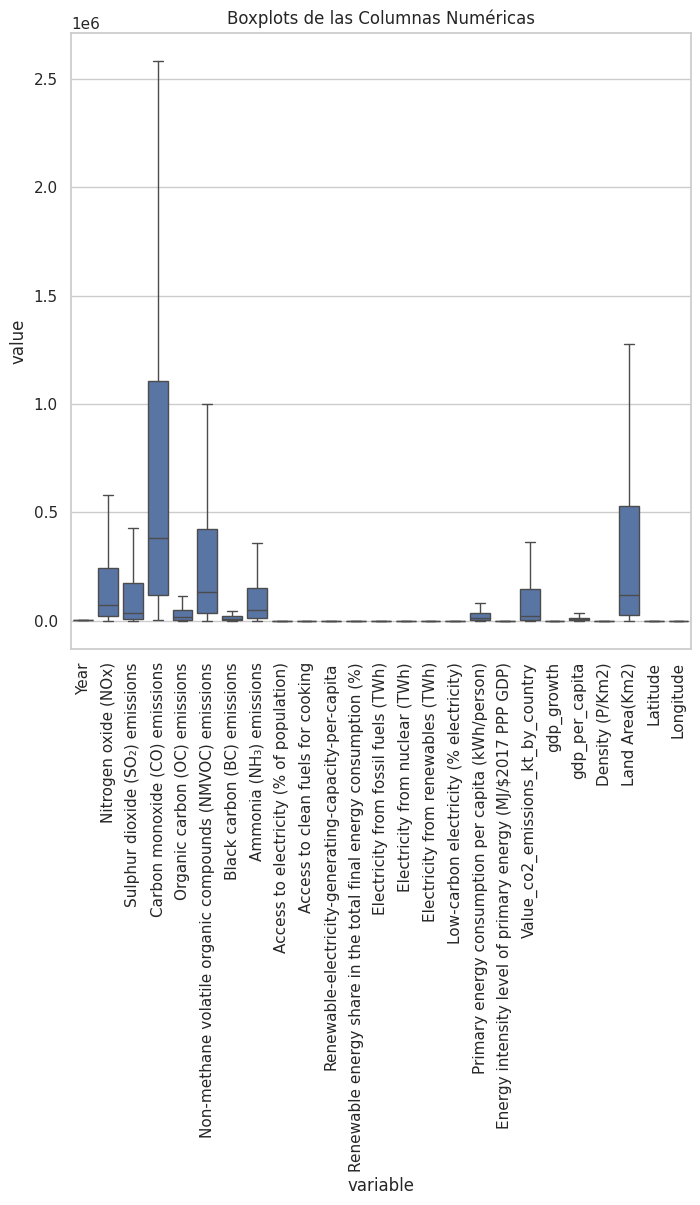

In [135]:
plt.figure(figsize=(8, 8))
df_melt = combined.melt(value_vars=numeric_columns)
sns.boxplot(x='variable', y='value', data=df_melt)
plt.xticks(rotation=90)
plt.title('Boxplots de las Columnas Numéricas')
plt.show()

### Modelo predictor de emisiones de CO

In [74]:
# Características
X = combined[['Access to electricity (% of population)',
              'Access to clean fuels for cooking',
              'Renewable-electricity-generating-capacity-per-capita',
              'Renewable energy share in the total final energy consumption (%)',
              'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
              'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)',
              'Primary energy consumption per capita (kWh/person)',
              'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
              'gdp_growth', 'gdp_per_capita', 'Density (P/Km2)', 'Land Area(Km2)',
              'Latitude', 'Longitude']]
# Variable objetivo
y = combined['Carbon monoxide (CO) emissions']

# Se dividen los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# Crear una lista de modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR()
}

# Diccionario para almacenar los resultados
results = {}

# Validación cruzada con 5 folds
cv_folds = 5

# Evaluar cada modelo usando validación cruzada
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv_folds, scoring='r2')
    results[name] = {'Mean R^2': cv_scores.mean(), 'Std R^2': cv_scores.std()}

# Mostrar los resultados
for name, metrics in results.items():
    print(f"{name}: Mean R^2 = {metrics['Mean R^2']}, Std R^2 = {metrics['Std R^2']}")

KeyboardInterrupt: 

Con base en los resultados del Error Cuadrático Medio (MSE) y el coeficiente de determinación (R²), podemos concluir que los modelos Árbol de Decisión, Bosque Aleatorio y Gradient Boosting generalizan mejor los datos. El modelo de Regresión Lineal resulta menos adecuado para este conjunto de datos, mientras que la Máquina de Vectores de Soporte (SVM) arroja resultados muy pobres.

Si tuviéramos que seleccionar un modelo, el Bosque Aleatorio sería una excelente opción. Sin embargo, tanto el Árbol de Decisión como el Gradient Boosting también podrían ser adecuados, dependiendo de factores como la interpretabilidad del modelo y los recursos computacionales disponibles.

In [ ]:
# Mejor modelo
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predicciones con el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Evaluación del rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best Model (Random Forest): MSE = {mse}, R^2 = {r2}")

#### Probando varios parametros para el random forest

In [ ]:
# Definir los modelos con max_depth ajustado
models = {
    'Random Forest (max_depth=5)': RandomForestRegressor(max_depth=5, random_state=42),
    'Random Forest (max_depth=10)': RandomForestRegressor(max_depth=10, random_state=42),
    'Random Forest (max_depth=15)': RandomForestRegressor(max_depth=15, random_state=42)
}

# Diccionario para almacenar los resultados
results = {}

# Validación cruzada con 5 folds
cv_folds = 5

# Evaluar cada modelo usando validación cruzada
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv_folds, scoring='r2')
    results[name] = {'Mean R^2': cv_scores.mean(), 'Std R^2': cv_scores.std()}

# Mostrar los resultados
for name, metrics in results.items():
    print(f"{name}: Mean R^2 = {metrics['Mean R^2']}, Std R^2 = {metrics['Std R^2']}")

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el grid de parámetros
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=cv_folds, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo y sus hiperparámetros
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best Random Forest Model (GridSearchCV): MSE = {mse}, RMSE = {rmse}, MAE = {mae}, R^2 = {r2}")

#### Comparación del modelo de random forest, con un modelos de gradient boosting

In [ ]:
param_grid_gb = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Inicializar GridSearchCV para Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=cv_folds, scoring='r2')
grid_search_gb.fit(X_train_scaled, y_train)

# Mejor modelo y sus hiperparámetros
best_model_gb = grid_search_gb.best_estimator_
print(f"Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}")

# Evaluar el mejor modelo de Gradient Boosting en el conjunto de prueba
y_pred_gb = best_model_gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Best Gradient Boosting Model (GridSearchCV): MSE = {mse_gb}, RMSE = {rmse_gb}, MAE = {mae_gb}, R^2 = {r2_gb}")

In [ ]:
# Resultados del mejor modelo de Random Forest (para referencia)
print(f"Best Random Forest Model (GridSearchCV): MSE = {mse}, RMSE = {rmse}, MAE = {mae}, R^2 = {r2}")

# Resultados del mejor modelo de Gradient Boosting
print(f"Best Gradient Boosting Model (GridSearchCV): MSE = {mse_gb}, RMSE = {rmse_gb}, MAE = {mae_gb}, R^2 = {r2_gb}")

#### Aplicando el modelo a nuevos datos

In [ ]:
# Ejemplo de nuevas características para predecir
new_data = pd.DataFrame({
    'Access to electricity (% of population)': [90, 85],
    'Access to clean fuels for cooking': [80, 75],
    'Renewable-electricity-generating-capacity-per-capita': [100, 95],
    'Renewable energy share in the total final energy consumption (%)': [25, 30],
    'Electricity from fossil fuels (TWh)': [80, 90],
    'Electricity from nuclear (TWh)': [100, 110],
    'Electricity from renewables (TWh)': [10, 15],
    'Low-carbon electricity (% electricity)': [40, 55],
    'Primary energy consumption per capita (kWh/person)': [30000, 90000],
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)': [5, 10],
    'gdp_growth': [3, 2.5],
    'gdp_per_capita': [30000, 28000],
    'Density (P/Km2)': [300, 320],
    'Land Area(Km2)': [100000, 120000],
    'Latitude': [45, 50],
    'Longitude': [-75, -80]
})

# Normalizar los nuevos datos
new_data_scaled = scaler.transform(new_data)

# Hacer predicciones con los nuevos datos
new_predictions = best_model.predict(new_data_scaled)
print(new_predictions)

### Modelo clasificador de paises en grupos, segun consumo energetico y emision de contaminantes

Caracteristicas relevantes del dataset, según nuestro objetivo

In [73]:
import pandas as pd

# Seleccionar las características relevantes
features = [
    'Primary energy consumption per capita (kWh/person)',
    'Electricity from renewables (TWh)',
    'Electricity from fossil fuels (TWh)',
    'Electricity from nuclear (TWh)',
    'gdp_per_capita',
    'Value_co2_emissions_kt_by_country',
    'Nitrogen oxide (NOx)',
    'Sulphur dioxide (SO₂) emissions',
    'Carbon monoxide (CO) emissions',
    'Organic carbon (OC) emissions',
    'Non-methane volatile organic compounds (NMVOC) emissions',
    'Black carbon (BC) emissions',
    'Ammonia (NH₃) emissions'
]

data = combined[features]

Escalamos los datos

In [74]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Aplicando K-means

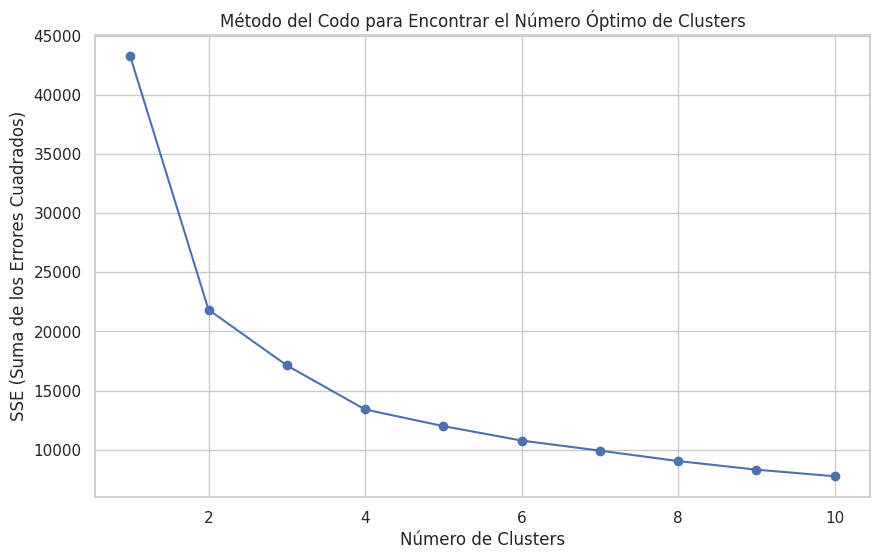

In [77]:
# Encontrar el número óptimo de clusters usando el método del codo
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE (Suma de los Errores Cuadrados)')
plt.title('Método del Codo para Encontrar el Número Óptimo de Clusters')
plt.show()

In [83]:
# El número óptimo de clusters es 4 (basado en el método del codo)
optimal_k = 4

# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Añadir la etiqueta del cluster al dataset original
combined['Cluster'] = clusters

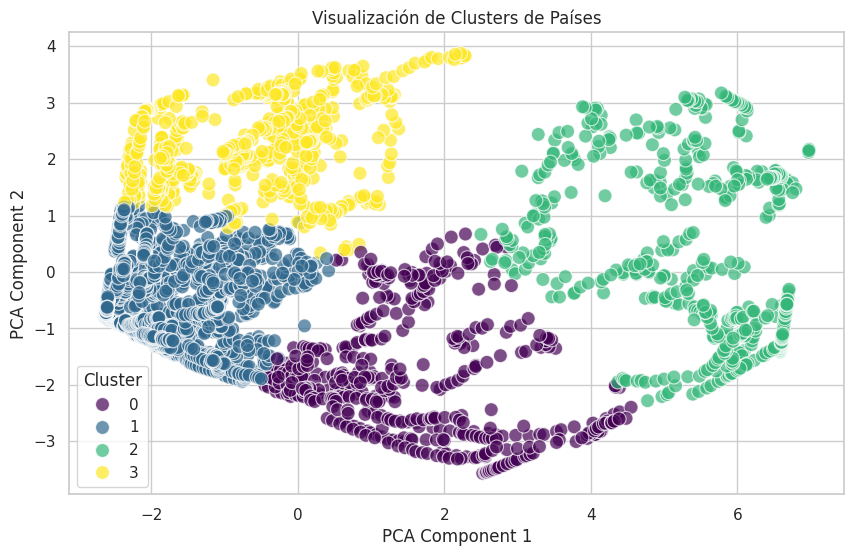

In [92]:
# Filtrar solo las columnas numéricas para el análisis
numeric_columns = combined.select_dtypes(include=['number']).columns

# Visualización de los clusters en un par de dimensiones (e.g., PCA)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters, palette='viridis', s=100, alpha=0.7)
plt.title('Visualización de Clusters de Países')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [94]:
# Agrupar por cluster y calcular la media solo para las columnas numéricas
cluster_summary = combined.groupby('Cluster')[numeric_columns].mean()
cluster_summary

Year  Nitrogen oxide (NOx)  Sulphur dioxide (SO₂) emissions  \
Cluster                                                                       
0        2009.926531         241374.037573                    155184.318186   
1        2009.887546          49335.809042                     39484.273890   
2        2010.370909         572674.979391                    392252.223660   
3        2010.280120         146238.014457                    109212.510333   

         Carbon monoxide (CO) emissions  Organic carbon (OC) emissions  \
Cluster                                                                  
0                          1.594697e+06                   78476.825461   
1                          2.701697e+05                   12979.210695   
2                          2.282085e+06                   76864.401116   
3                          2.973374e+05                    7210.753115   

         Non-methane volatile organic compounds (NMVOC) emissions  \
Cluster                                                             
0                                            543180.149235          
1                                             88828.596039          
2                                            898069.226882          
3                                            166940.863596          

         Black carbon (BC) emissions  Ammonia (NH₃) emissions  \
Cluster                                                         
0                       27919.344136            204962.398003   
1                        4282.713326             41562.296551   
2                       36297.225373            327634.374835   
3                        4031.163717             44338.490721   

         Access to electricity (% of population)  \
Cluster                                            
0                                      63.838337   
1                                      70.134174   
2                                      96.155813   
3                                      99.811496   

         Access to clean fuels for cooking  ...  \
Cluster                                     ...   
0                                41.922787  ...   
1                                51.370835  ...   
2                                84.953364  ...   
3                                94.464652  ...   

         Primary energy consumption per capita (kWh/person)  \
Cluster                                                       
0                                              6424.667065    
1                                             11325.321199    
2                                             32333.788124    
3                                             58079.596522    

         Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
Cluster                                                                
0                                                 5.703916             
1                                                 4.799555             
2                                                 4.938738             
3                                                 4.744699             

         Value_co2_emissions_kt_by_country  gdp_growth  gdp_per_capita  \
Cluster                                                                  
0                             46727.275733    4.682854     2465.601157   
1                             29019.477498    3.604337     5326.032188   
2                            281381.637136    3.150416    15511.054088   
3                             62033.026323    2.545104    27285.482198   

         Density (P/Km2)  Land Area(Km2)   Latitude  Longitude  Cluster  
Cluster                                                                  
0              98.311199   658372.512245  10.106254  22.498990      0.0  
1             110.472287   213873.411713  13.504601   3.102392      1.0  
2             133.289368   845608.912727  24.052253  30.425244      2.0  
3             162.654863   100663.207831  3

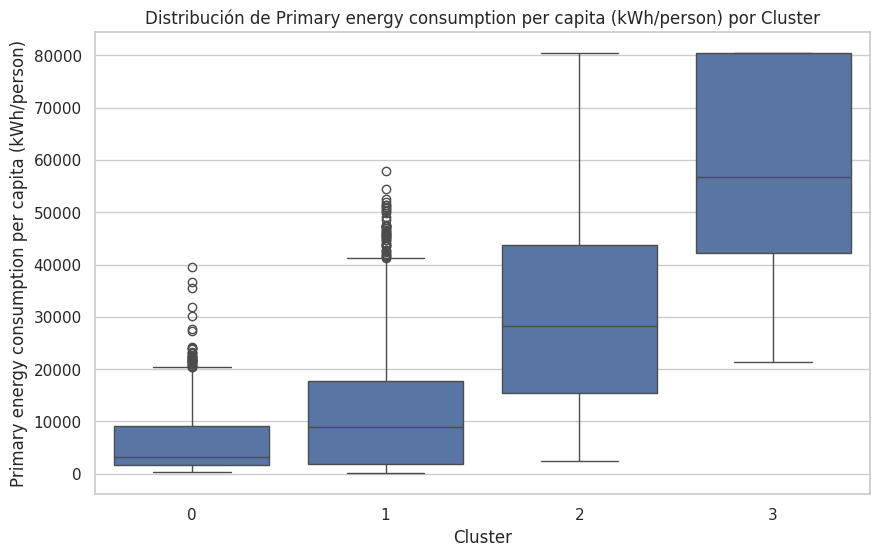

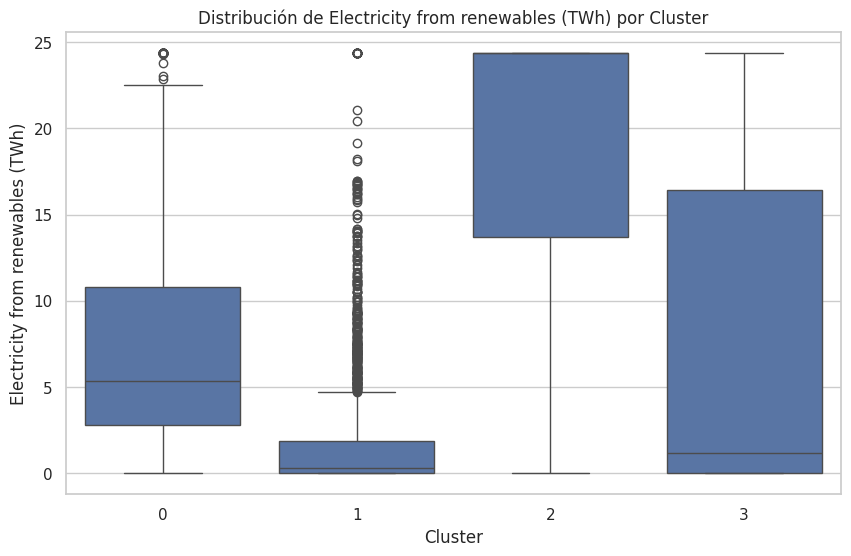

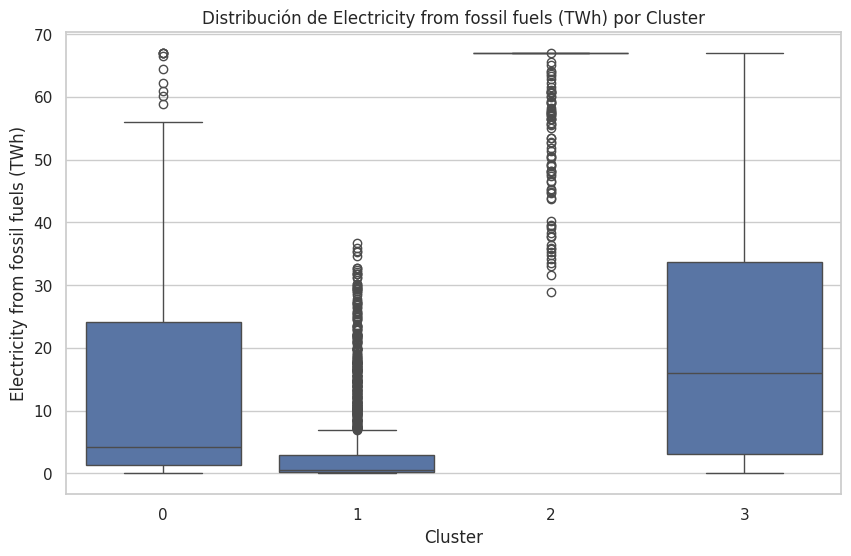

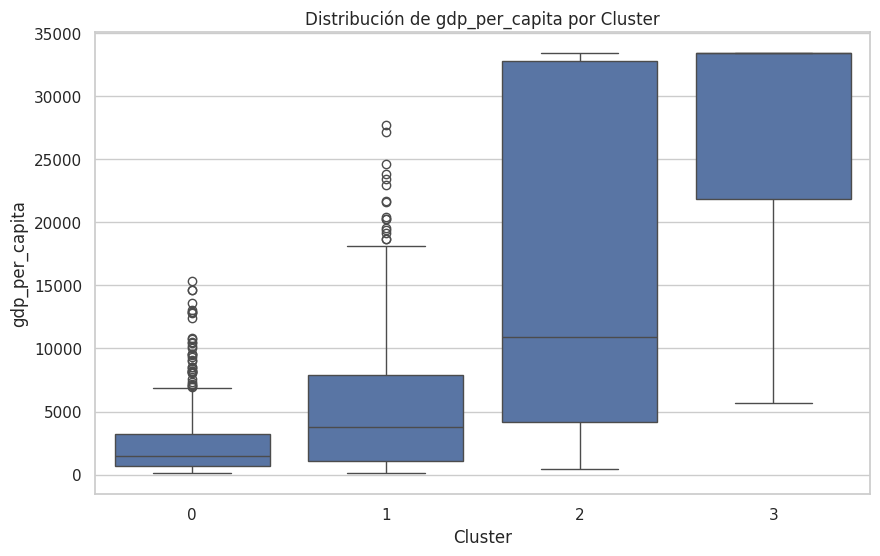

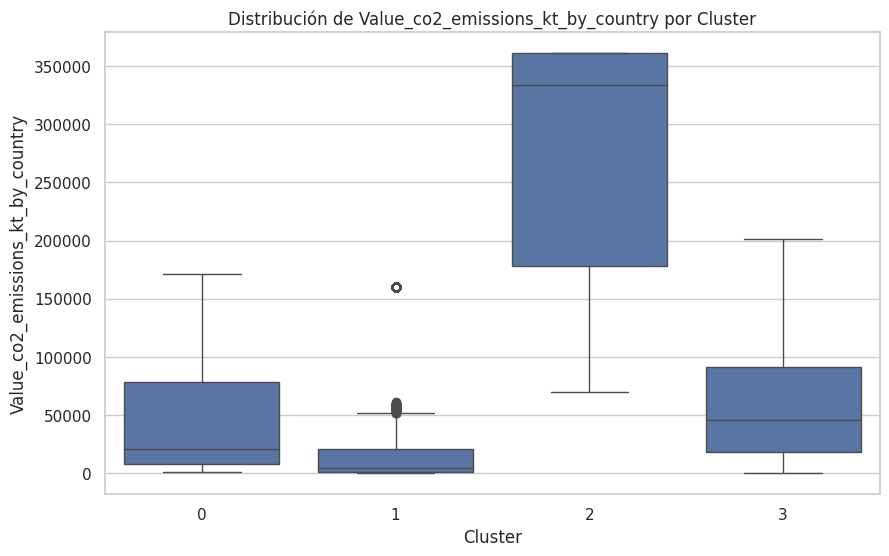

In [95]:
features_to_plot = [
    'Primary energy consumption per capita (kWh/person)',
    'Electricity from renewables (TWh)',
    'Electricity from fossil fuels (TWh)',
    'gdp_per_capita',
    'Value_co2_emissions_kt_by_country'
]

# Crear un DataFrame de características con la etiqueta del cluster
data_with_clusters = combined[features_to_plot + ['Cluster']]

# Graficar las distribuciones de estas características por cluster
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=data_with_clusters)
    plt.title(f'Distribución de {feature} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

Este modelo nos permite realizar una clasificación de países en función de sus similitudes en términos de consumo de energía y emisiones de contaminantes.

Grupo 0: Los países de este grupo presentan un nivel medio de emisiones de monóxido de carbono en comparación con los demás. Se caracterizan por tener los valores más bajos en cuanto a acceso a la electricidad, consumo de energía per cápita, PIB per cápita y densidad poblacional.

Grupo 1: Este grupo agrupa a los países con las emisiones más bajas de monóxido de carbono. Los valores promedio de acceso a la electricidad, consumo de energía per cápita, PIB per cápita y densidad poblacional son superiores a los del grupo 0, pero inferiores a los de los grupos 3 y 4.

Grupo 2: Los países de este grupo presentan las emisiones más altas de monóxido de carbono. Sus valores en las demás variables son inferiores a los del grupo 4, pero superiores a los de los grupos anteriores.

Grupo 3: Este grupo se caracteriza por niveles bajos de emisiones de monóxido de carbono, solo superados por el grupo 1. Sin embargo, presenta los valores más altos en cuanto a acceso a la electricidad, consumo de energía per cápita, PIB per cápita y densidad poblacional.

### Modelo clasificador de países según su progreso en energías renovables o reducción de emisiones

In [137]:
combined.columns

Index(['Entity', 'Year', 'Nitrogen oxide (NOx)',
       'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
       'Organic carbon (OC) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions', 'Continent_x',
       'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density (P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude',
       

In [144]:
features = [
    'Renewable energy share in the total final energy consumption (%)',
    'Value_co2_emissions_kt_by_country',
    'gdp_per_capita',
    'Access to electricity (% of population)',
    'Primary energy consumption per capita (kWh/person)'
]
X = combined[features]

# Crear etiquetas basadas en percentiles
combined['progress_label'] = pd.qcut(combined['Renewable energy share in the total final energy consumption (%)'], q=3, labels=['Rezagados', 'Intermedios', 'Avanzados'])
y = combined['progress_label']

# Preprocesamiento de los datos
X = pd.get_dummies(X)  # Codificar variables categóricas si existen
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definición de los modelos a comparar
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Evaluación de cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Optimización de hiperparámetros para el mejor modelo (opcional)
# Aquí, como ejemplo, se realiza GridSearchCV para el Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo y evaluación
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print(f"Best Parameters: {grid_search.best_params_}")
print("Best Model - Accuracy: ", accuracy_score(y_test, y_pred_best))
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred_best))

Logistic Regression - Accuracy: 0.981994459833795
Classification Report:
              precision    recall  f1-score   support

   Avanzados       1.00      0.97      0.99       239
 Intermedios       0.97      0.97      0.97       225
   Rezagados       0.98      1.00      0.99       258

    accuracy                           0.98       722
   macro avg       0.98      0.98      0.98       722
weighted avg       0.98      0.98      0.98       722

Confusion Matrix:
[[232   7   0]
 [  0 219   6]
 [  0   0 258]]


Decision Tree - Accuracy: 0.9986149584487535
Classification Report:
              precision    recall  f1-score   support

   Avanzados       1.00      1.00      1.00       239
 Intermedios       1.00      1.00      1.00       225
   Rezagados       1.00      1.00      1.00       258

    accuracy                           1.00       722
   macro avg       1.00      1.00      1.00       722
weighted avg       1.00      1.00      1.00       722

Confusion Matrix:
[[239   0   0

Usando decision tree classifier

In [146]:
X = combined[features]

# Crear etiquetas basadas en percentiles
# Ejemplo: Avanzados (top 33%), Intermedios (middle 33%), Rezagados (bottom 33%)
combined['progress_label'] = pd.qcut(combined['Renewable energy share in the total final energy consumption (%)'], q=3, labels=['Rezagados', 'Intermedios', 'Avanzados'])

y = combined['progress_label']

# Preprocesamiento de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definición del modelo y GridSearchCV para optimización
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo y evaluación
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best Parameters: {grid_search.best_params_}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

   Avanzados       1.00      1.00      1.00       239
 Intermedios       1.00      1.00      1.00       225
   Rezagados       1.00      1.00      1.00       258

    accuracy                           1.00       722
   macro avg       1.00      1.00      1.00       722
weighted avg       1.00      1.00      1.00       722

Confusion Matrix:
[[239   0   0]
 [  0 224   1]
 [  0   0 258]]
